In [106]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

In [107]:
test_df =  pd.read_csv("resources/volume1m_smajung_winlose_table_10,4,7.5,3,5.csv", parse_dates=['Date'], index_col=[0], encoding = "euc-kr")

In [108]:
test_df

Date stock_name  today_big_win  today_small_win  today_lose  \
0  2018-05-08     SK하이닉스            0.0              0.0         0.0   
0  2018-05-09       태림포장            0.0              0.0         0.0   
0  2018-05-09        파미셀            1.0              0.0         0.0   
0  2018-05-09     케이피엠테크            1.0              0.0         0.0   
0  2018-05-09     아시아나항공            0.0              1.0         0.0   
..        ...        ...            ...              ...         ...   
0  2020-10-30    KPX생명과학            0.0              0.0         1.0   
0  2020-10-30      TCC스틸            1.0              0.0         0.0   
0  2020-10-30    삼성엔지니어링            1.0              0.0         0.0   
0  2020-10-30       써니전자            1.0              0.0         0.0   
0  2020-10-30      수산중공업            0.0              0.0         0.0   

    tomorrow_big_win  tomorrow_small_win  tomorrow_lose  day2_big_win  \
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
..               ...                 ...            ...           ...   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   

    day2_small_win  day2_lose  real_profit Nasdaq  
0              1.0        0.0     0.033735    U04  
0              0.0        0.0     0.075000    T01  
0              0.0        0.0     0.100000    T01  
0              0.0        0.0     0.100000    T01  
0              0.0        0.0     0.036965    T01  
..             ...        ...          ...    ...  
0              0.0        0.0    -0.050000    U04  
0              0.0        0.0     0.100000    U04  
0              0.0        0.0     0.100000    U04  
0              0.0        0.0     0.100000    U04  
0              0.0        0.0     0.075000    U04  

[1743 rows x 13 columns]

In [110]:
holy_2019 = pd.read_excel('resources/holiday/2019_holi.xls', parse_dates=["일자 및 요일"])
holy_2018 = pd.read_excel('resources/holiday/2018_holi.xls', parse_dates=["일자 및 요일"])
holy_2020 = pd.read_excel('resources/holiday/2020_holi.xls', parse_dates=["일자 및 요일"])
test_holy = pd.concat([holy_2019["일자 및 요일"], holy_2018["일자 및 요일"], holy_2020["일자 및 요일"]])
holy_list = list(test_holy)

sum_money = 10000000
df_date = "뒁바보"
yield_df = pd.DataFrame({"Date" : [], "sum_money" : []})
my_df = pd.DataFrame({"stdate" : [], "endate" :[], "profit" : [], "invest_money" : []})

for i in range(len(test_df)) :
    if test_df.iloc[i,2] + test_df.iloc[i,3] + test_df.iloc[i,4] == 1 :
        pl_day = 0
    elif test_df.iloc[i,5] + test_df.iloc[i,6] + test_df.iloc[i,7] == 1 :
        pl_day = 1
    elif test_df.iloc[i,8] + test_df.iloc[i,9] + test_df.iloc[i,10] == 1 :
        pl_day = 2
    endate = test_df.iloc[i,0]+datetime.timedelta(days = pl_day)
    while endate in holy_list or endate.weekday() > 4:
        endate = endate + datetime.timedelta(days = 1)
        
    temp_df = pd.DataFrame({"stdate" :[test_df.iloc[i,0]], "endate" : endate,
                           "profit" : [test_df.iloc[i,11]], "invest_money" : [0]})
    my_df = my_df.append(temp_df)

yield_df["Date"] = pd.concat([my_df["stdate"],my_df["endate"]]).unique()
yield_df = yield_df.sort_values("Date")
my_df = my_df.reset_index(drop = True)

for num in range(len(yield_df["Date"])) : 
    st_index = my_df[my_df["stdate"] == yield_df.iloc[num,0]].index
    for st_idx in range(len(st_index)) :
        my_df.iloc[st_index[st_idx], 3] = sum_money // 10
    ed_index = my_df[my_df["endate"] == yield_df.iloc[num, 0]].index
    if len(ed_index) == 0 :
        yield_df.iloc[num,1] = yield_df.iloc[num-1,1]
    if num == 0 :
        yield_df.iloc[0,1] = sum_money
        continue
    for ed_idx in range(len(ed_index)):
         sum_money = sum_money + (my_df.iloc[ed_index[ed_idx], 3] * (1+my_df.iloc[ed_index[ed_idx], 2]))*0.9975 - my_df.iloc[ed_index[ed_idx], 3]
    yield_df.iloc[num, 1] = sum_money
print(yield_df)
my_df

          Date     sum_money
0   2018-05-08  1.000000e+07
1   2018-05-09  1.028792e+07
2   2018-05-10  1.054220e+07
3   2018-05-11  1.077803e+07
4   2018-05-15  1.081461e+07
..         ...           ...
518 2020-10-27  1.916394e+09
519 2020-10-28  1.972364e+09
520 2020-10-29  2.015056e+09
521 2020-10-30  2.054156e+09
538 2020-11-02  2.068727e+09

[539 rows x 2 columns]


stdate     endate    profit  invest_money
0    2018-05-08 2018-05-10  0.033735     1000000.0
1    2018-05-09 2018-05-10  0.075000     1000000.0
2    2018-05-09 2018-05-09  0.100000     1000000.0
3    2018-05-09 2018-05-09  0.100000     1000000.0
4    2018-05-09 2018-05-09  0.036965     1000000.0
...         ...        ...       ...           ...
1738 2020-10-30 2020-10-30 -0.050000   201505568.0
1739 2020-10-30 2020-10-30  0.100000   201505568.0
1740 2020-10-30 2020-10-30  0.100000   201505568.0
1741 2020-10-30 2020-10-30  0.100000   201505568.0
1742 2020-10-30 2020-11-02  0.075000   201505568.0

[1743 rows x 4 columns]

In [16]:
yield_df.to_csv("resources/yield_df.csv")

In [13]:
yield_df

Date     sum_money
0   2018-05-08           NaN
1   2018-05-09  1.028792e+07
2   2018-05-10  1.054220e+07
3   2018-05-11  1.077803e+07
4   2018-05-15  1.081461e+07
..         ...           ...
518 2020-10-27  1.916394e+09
519 2020-10-28  1.972364e+09
520 2020-10-29  2.015056e+09
521 2020-10-30  2.054156e+09
538 2020-11-02  2.068727e+09

[539 rows x 2 columns]

In [54]:
yield_df[370:430]

TypeError: 'NoneType' object is not subscriptable

          Date     sum_money
0   2018-05-08  1.000000e+07
1   2018-05-09  1.028792e+07
2   2018-05-10  1.054220e+07
3   2018-05-11  1.077803e+07
4   2018-05-15  1.081461e+07
..         ...           ...
518 2020-10-27  1.916394e+09
519 2020-10-28  1.972364e+09
520 2020-10-29  2.015056e+09
521 2020-10-30  2.054156e+09
538 2020-11-02  2.068727e+09

[539 rows x 2 columns]


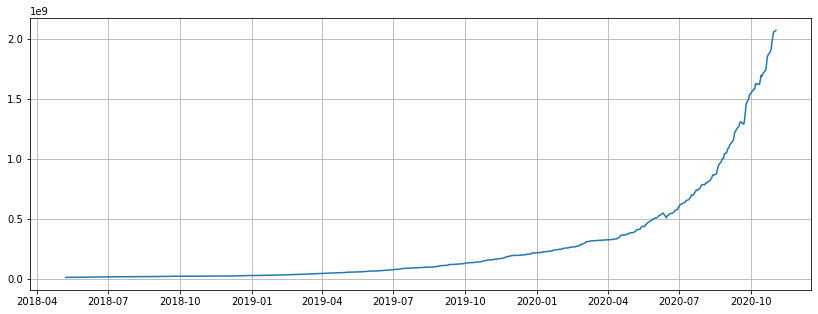

In [111]:
plt_test_df = yield_df.copy()#[370:410]
plt
print(plt_test_df)
plt.plot(plt_test_df["Date"], plt_test_df["sum_money"])	# line 그래프를 그립니다
plt.show()	# 그래프를 화면에 보여줍니다


In [112]:
yield_df.drop(yield_df.tail(1).index,inplace=True) # drop last n rows
yield_df

Date     sum_money
0   2018-05-08  1.000000e+07
1   2018-05-09  1.028792e+07
2   2018-05-10  1.054220e+07
3   2018-05-11  1.077803e+07
4   2018-05-15  1.081461e+07
..         ...           ...
517 2020-10-26  1.892930e+09
518 2020-10-27  1.916394e+09
519 2020-10-28  1.972364e+09
520 2020-10-29  2.015056e+09
521 2020-10-30  2.054156e+09

[538 rows x 2 columns]

          Date   sum_money
0   2018-05-08    1.000000
1   2018-05-09    1.028792
2   2018-05-10    1.054220
3   2018-05-11    1.077803
4   2018-05-15    1.081461
..         ...         ...
517 2020-10-26  189.293030
518 2020-10-27  191.639439
519 2020-10-28  197.236415
520 2020-10-29  201.505569
521 2020-10-30  205.415552

[538 rows x 2 columns]


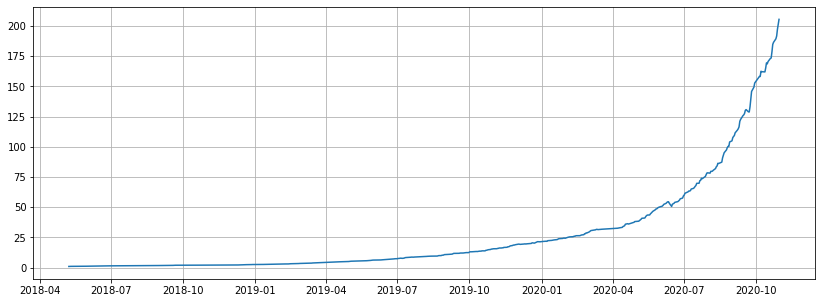

In [103]:
plt_test_df = yield_df#[370:410]
plt_test_df["sum_money"] = plt_test_df["sum_money"] / plt_test_df.iloc[0,1]
print(plt_test_df)
plt.plot(plt_test_df["Date"], plt_test_df["sum_money"])	# line 그래프를 그립니다
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams['axes.grid'] = True
plt.show()	# 그래프를 화면에 보여줍니다

In [75]:
type(yield_df["Date"][0].year)

int

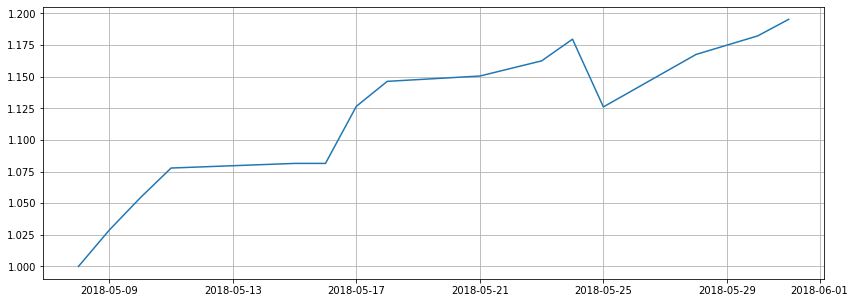

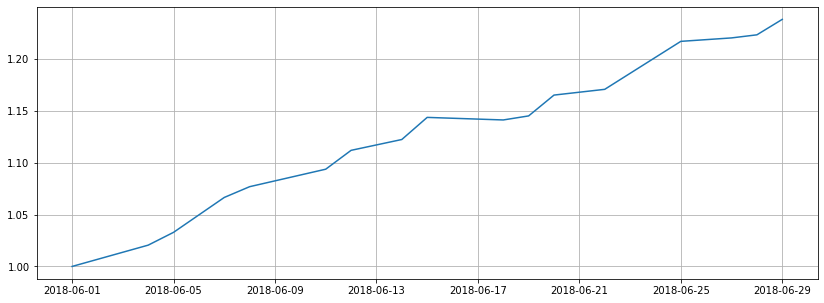

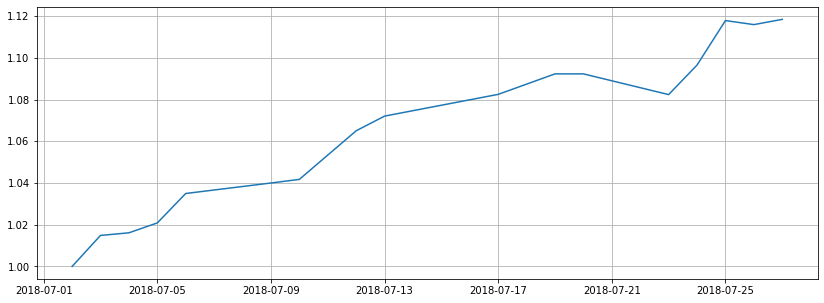

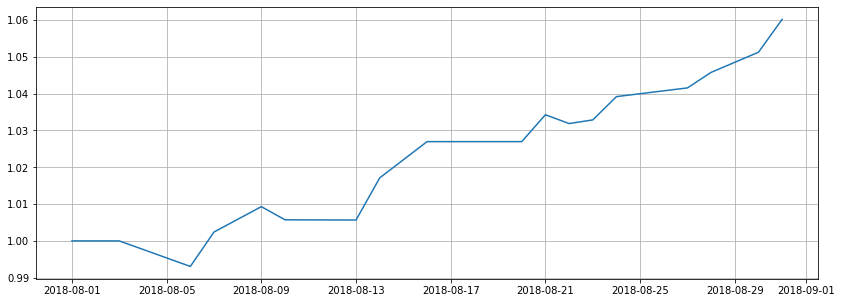

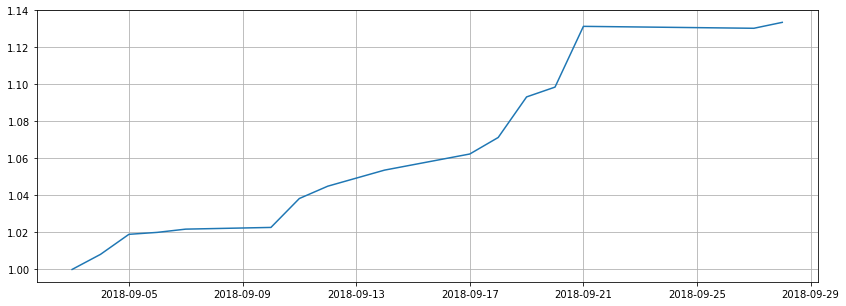

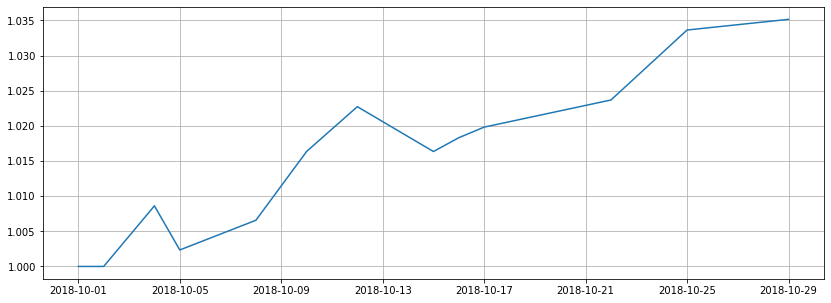

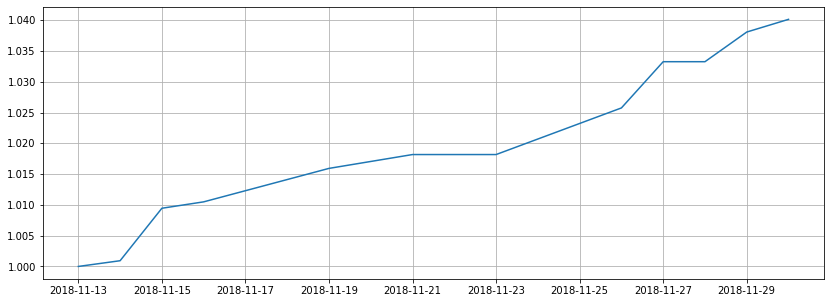

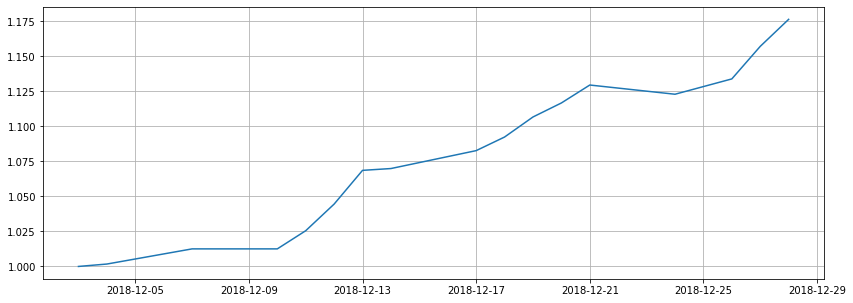

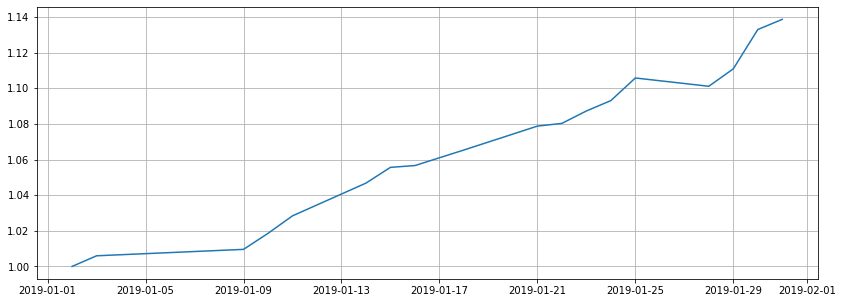

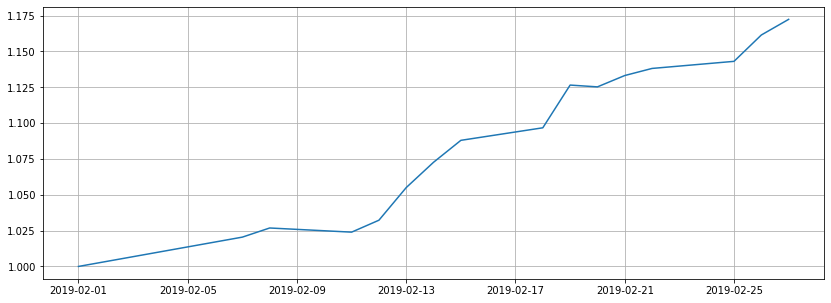

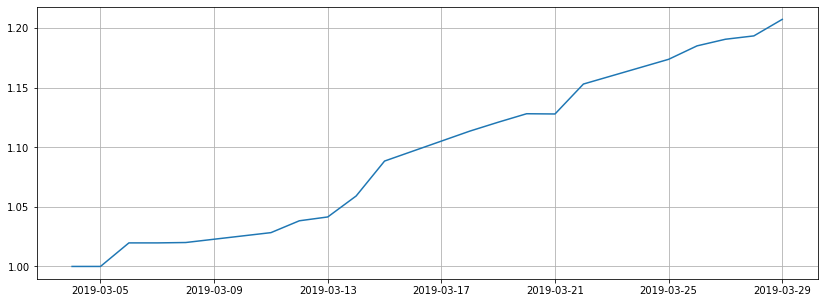

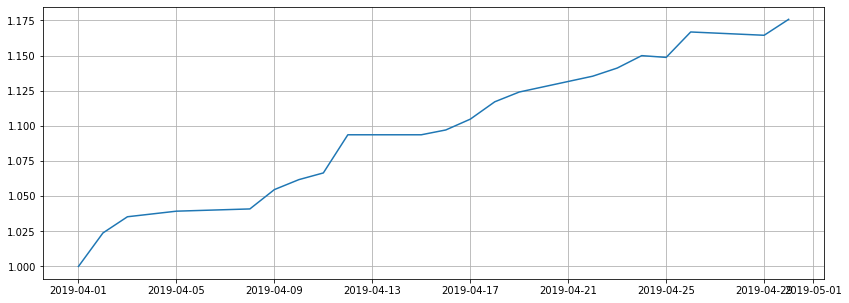

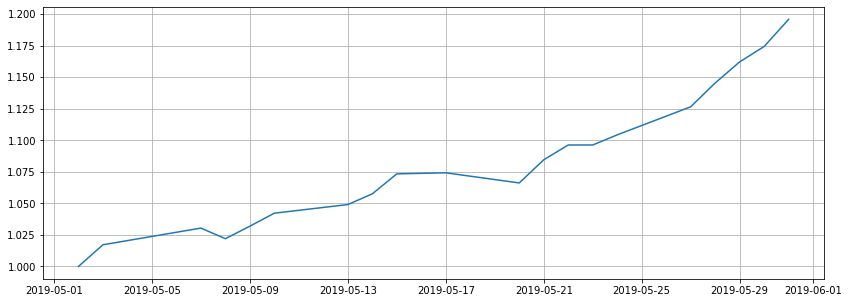

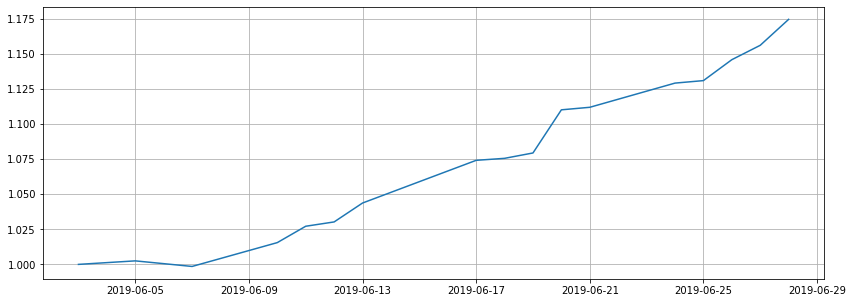

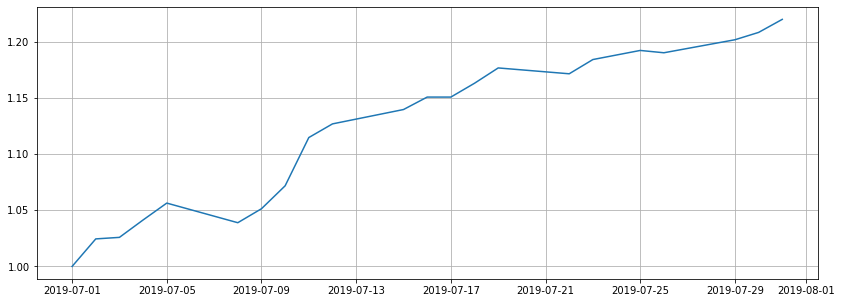

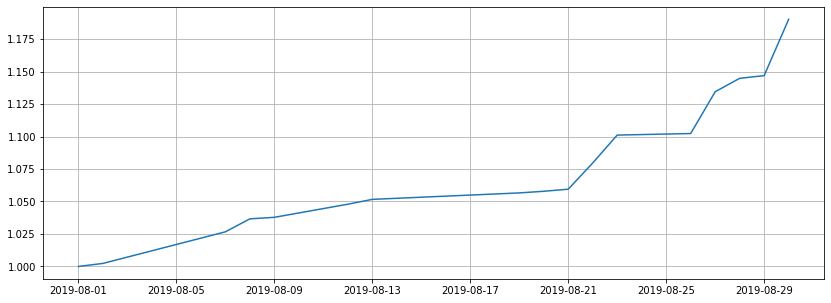

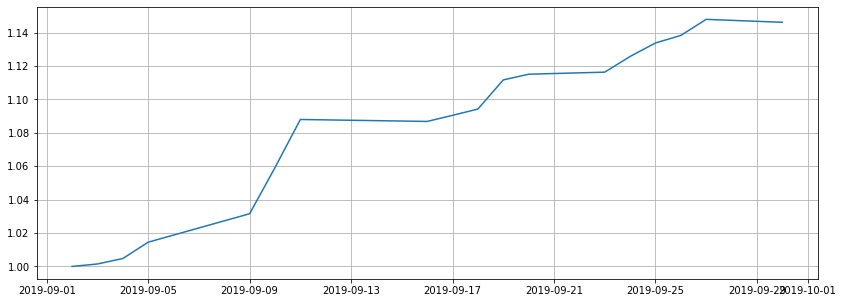

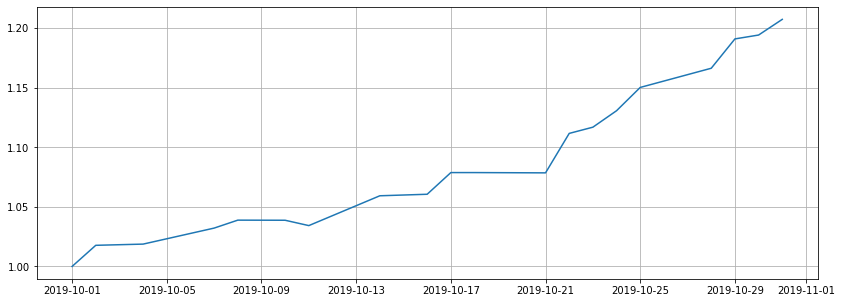

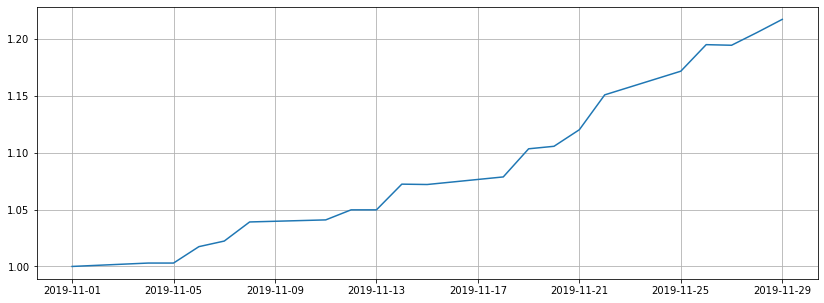

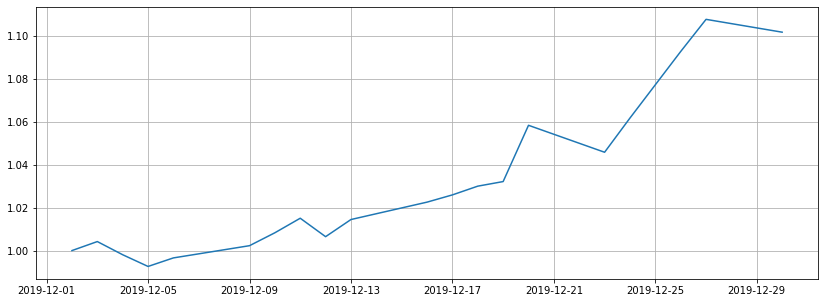

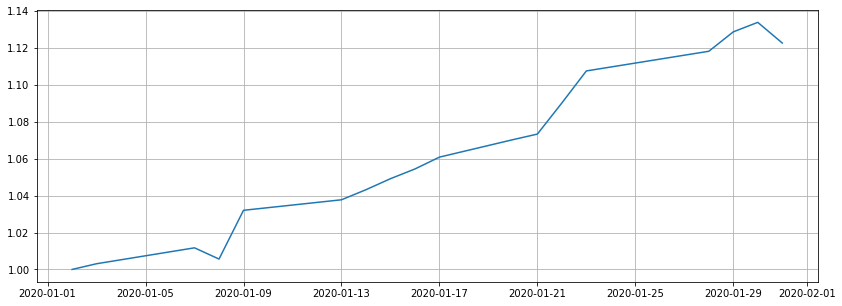

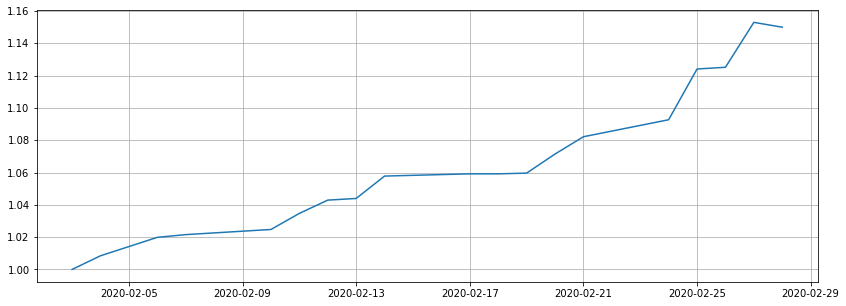

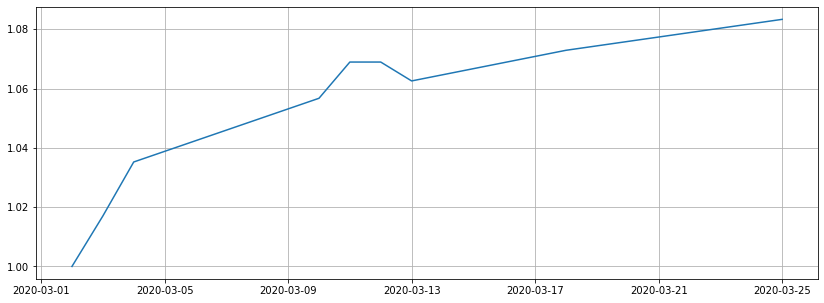

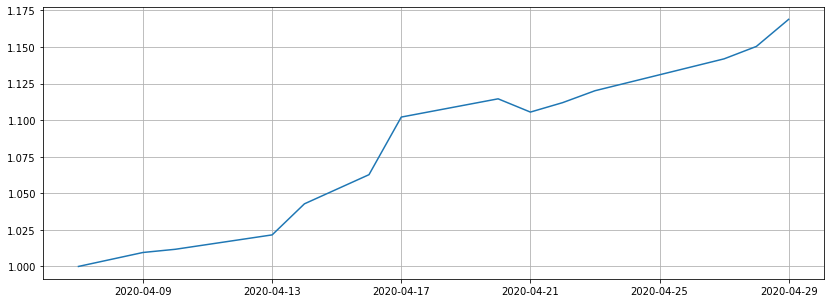

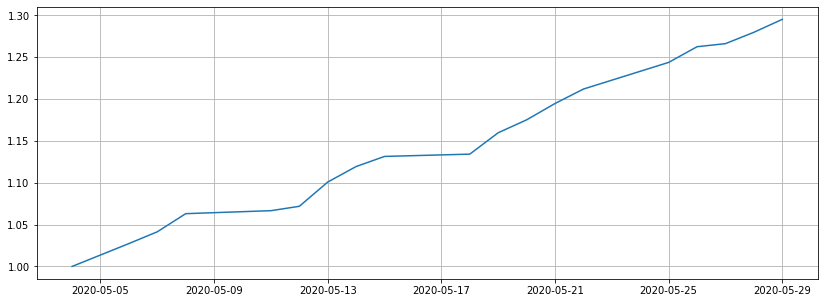

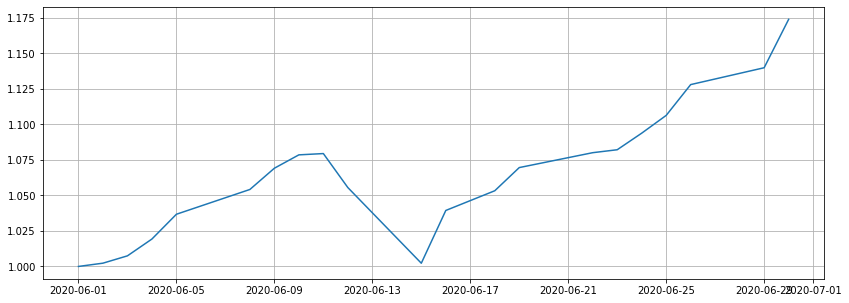

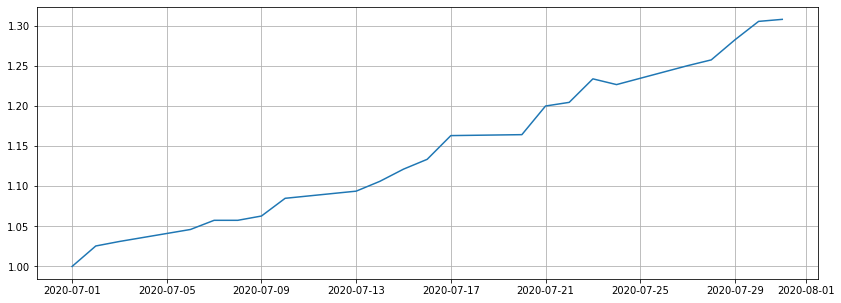

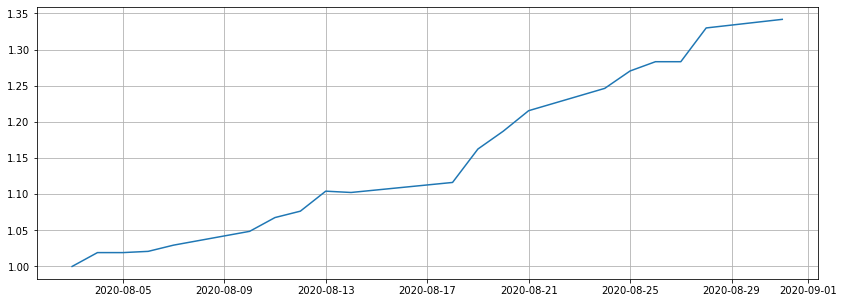

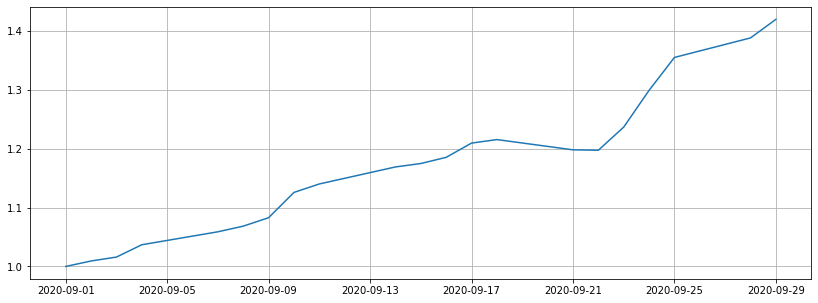

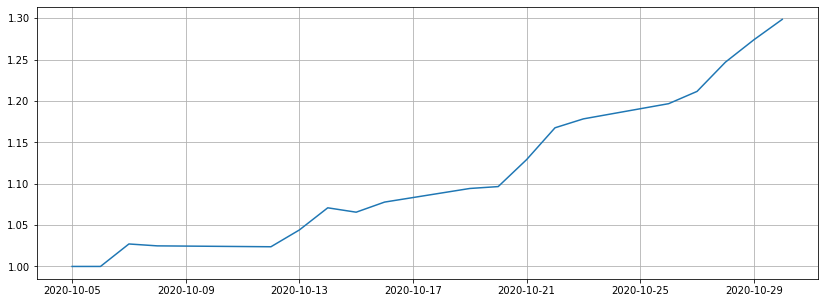

In [114]:
for year_num in range(2018,2021) :
    for month_num in range(1,13) :
        month_yield_df = pd.DataFrame({"Date" : [], "sum_money" : []})
        for df_num in range(len(yield_df)):
            if yield_df.iloc[df_num,0].year == year_num and yield_df.iloc[df_num,0].month == month_num:
                temp_df = yield_df.iloc[df_num]
                month_yield_df = month_yield_df.append(temp_df)
        if len(month_yield_df) != 0:
            month_yield_df["sum_money"] = month_yield_df["sum_money"] / month_yield_df.iloc[0,1]
            plt.rcParams["figure.figsize"] = (14,5)
            plt.rcParams['axes.grid'] = True
            plt.plot(month_yield_df["Date"], month_yield_df["sum_money"])	# line 그래프를 그립니다
            plt.show()	# 그래프를 화면에 보여줍니다
            

In [115]:
test = yield_df.copy()
test["sum_money"] = test["sum_money"]/test.iloc[0,1]
test

Date   sum_money
0   2018-05-08    1.000000
1   2018-05-09    1.028792
2   2018-05-10    1.054220
3   2018-05-11    1.077803
4   2018-05-15    1.081461
..         ...         ...
517 2020-10-26  189.293030
518 2020-10-27  191.639439
519 2020-10-28  197.236415
520 2020-10-29  201.505569
521 2020-10-30  205.415552

[538 rows x 2 columns]

In [116]:
from pykrx import stock

In [154]:
for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1028 코스피 200
1034 코스피 100
1035 코스피 50
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1244 코스피200제외 코스피지수
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1022 은행
1024 증권
1025 보험
1026 서비스업
1027 제조업
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%


In [192]:
kospi_df = stock.get_index_ohlcv_by_date("20180505", "20201031", "1001")
kospi_df = kospi_df.reset_index(drop = False)
kospi_df = kospi_df.iloc[:,[0,4]]
kospi_df.columns = ['Date', 'KOSPI']
kospi_df

Date    KOSPI
0   2018-05-08  2449.81
1   2018-05-09  2443.98
2   2018-05-10  2464.16
3   2018-05-11  2477.71
4   2018-05-14  2476.11
..         ...      ...
606 2020-10-26  2343.91
607 2020-10-27  2330.84
608 2020-10-28  2345.26
609 2020-10-29  2326.67
610 2020-10-30  2267.15

[611 rows x 2 columns]

In [193]:
kospi_yield_df = pd.merge(kospi_df, yield_df, left_on='Date', right_on='Date', how='left')
kospi_yield_df

Date    KOSPI     sum_money
0   2018-05-08  2449.81  1.000000e+07
1   2018-05-09  2443.98  1.028792e+07
2   2018-05-10  2464.16  1.054220e+07
3   2018-05-11  2477.71  1.077803e+07
4   2018-05-14  2476.11           NaN
..         ...      ...           ...
606 2020-10-26  2343.91  1.892930e+09
607 2020-10-27  2330.84  1.916394e+09
608 2020-10-28  2345.26  1.972364e+09
609 2020-10-29  2326.67  2.015056e+09
610 2020-10-30  2267.15  2.054156e+09

[611 rows x 3 columns]

In [195]:
kospi_yield_df = kospi_yield_df.fillna(method='ffill')
kospi_yield_df

Date    KOSPI     sum_money
0   2018-05-08  2449.81  1.000000e+07
1   2018-05-09  2443.98  1.028792e+07
2   2018-05-10  2464.16  1.054220e+07
3   2018-05-11  2477.71  1.077803e+07
4   2018-05-14  2476.11  1.077803e+07
..         ...      ...           ...
606 2020-10-26  2343.91  1.892930e+09
607 2020-10-27  2330.84  1.916394e+09
608 2020-10-28  2345.26  1.972364e+09
609 2020-10-29  2326.67  2.015056e+09
610 2020-10-30  2267.15  2.054156e+09

[611 rows x 3 columns]

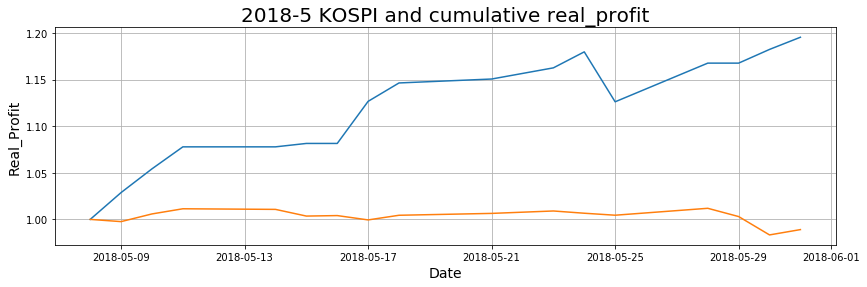

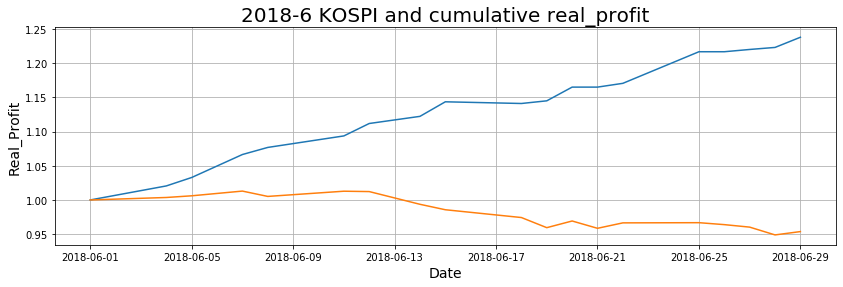

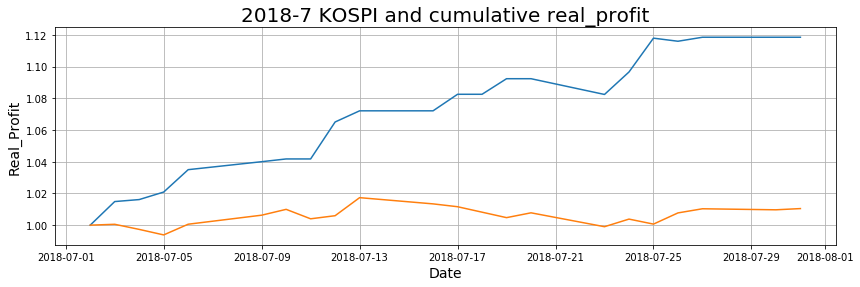

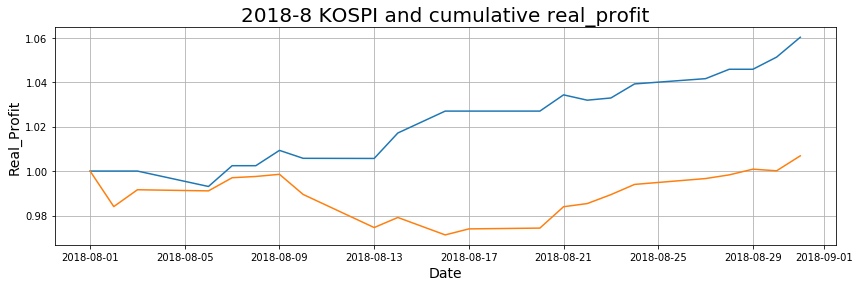

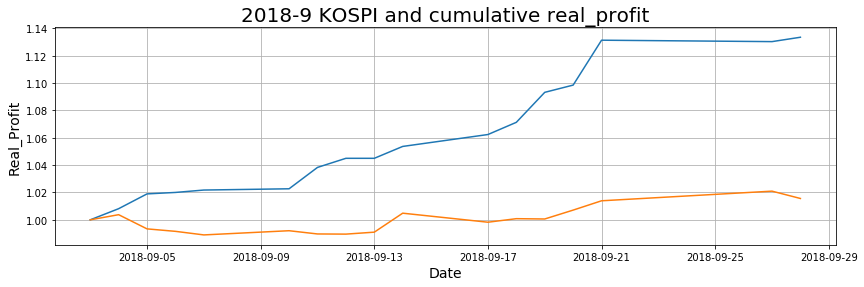

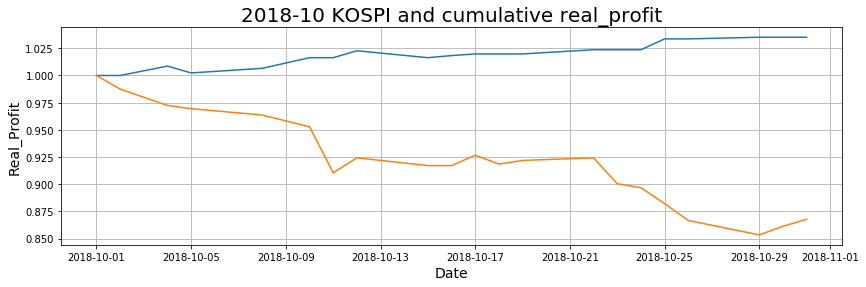

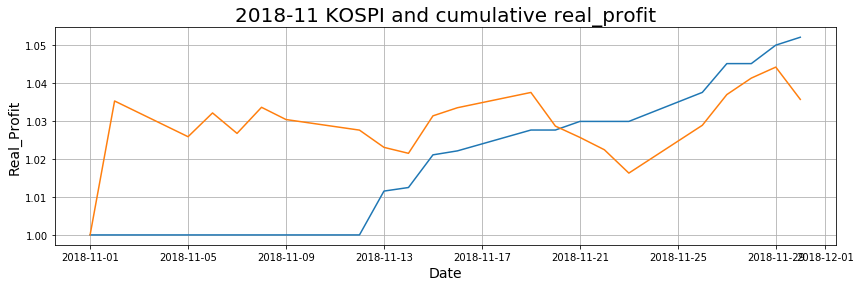

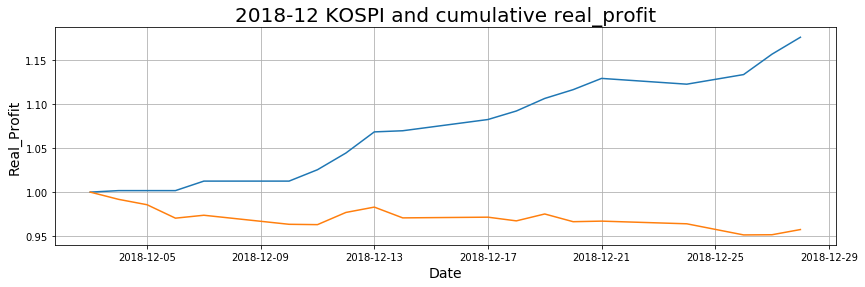

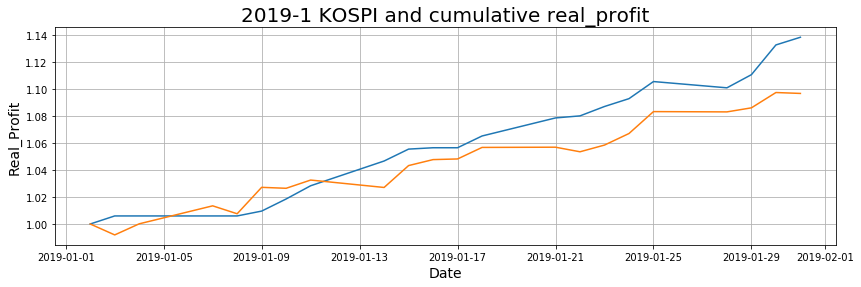

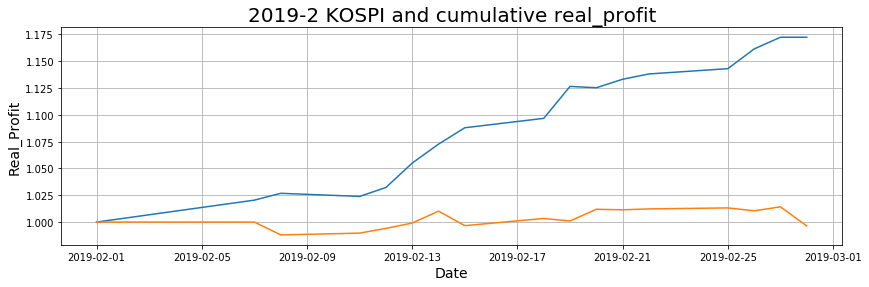

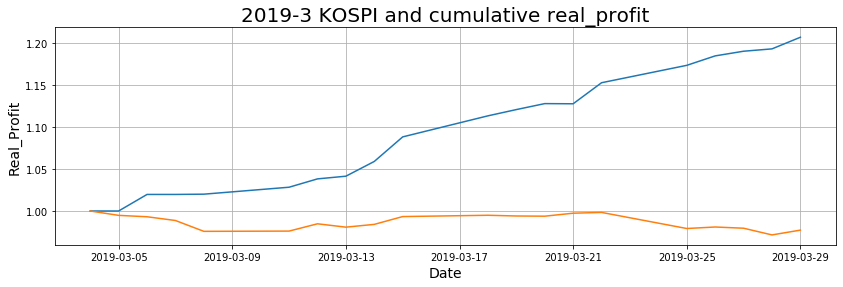

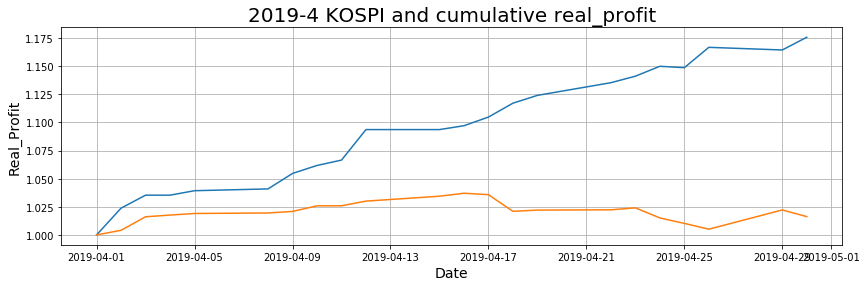

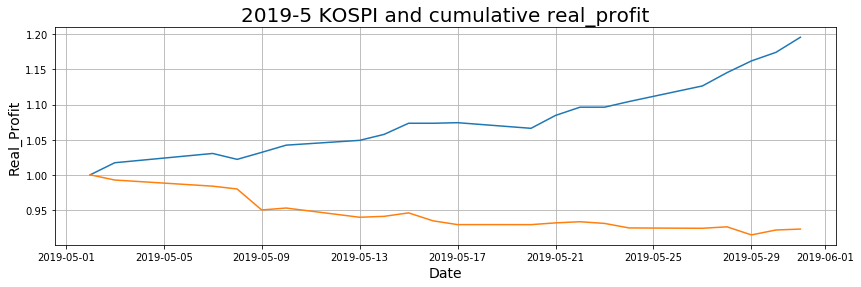

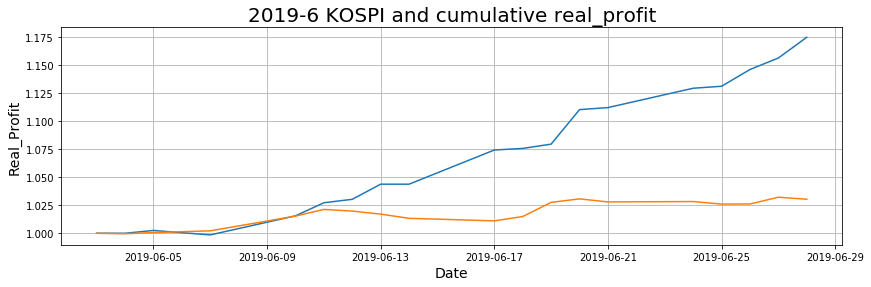

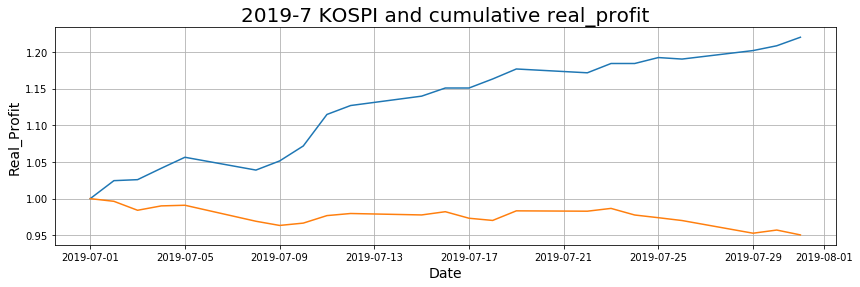

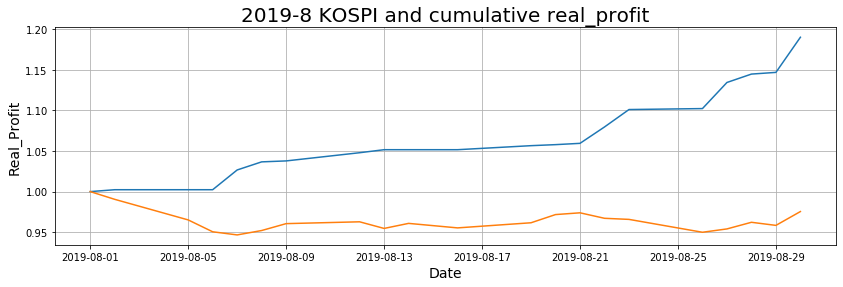

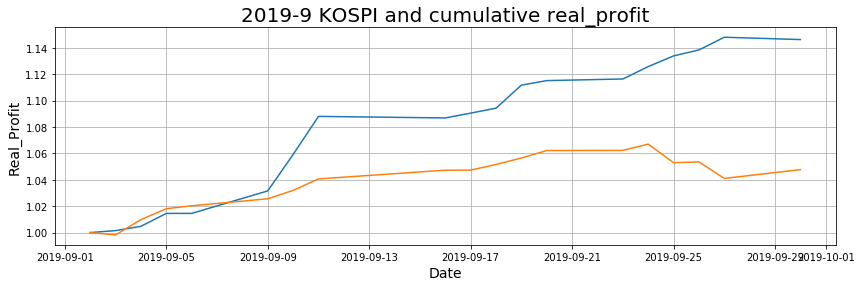

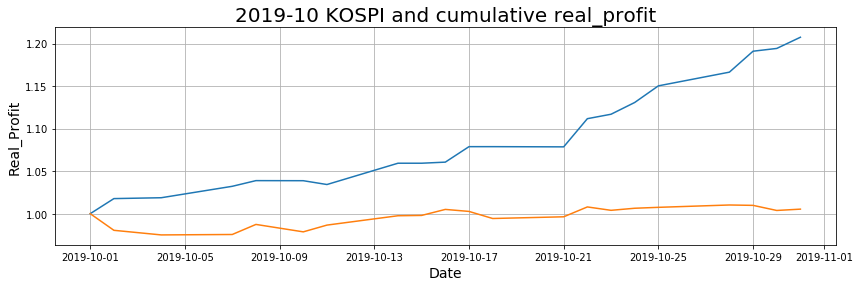

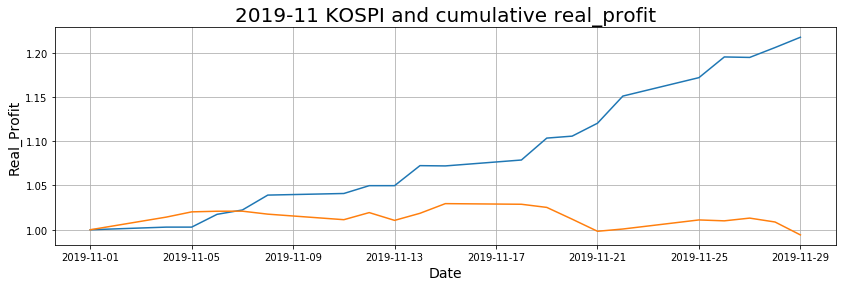

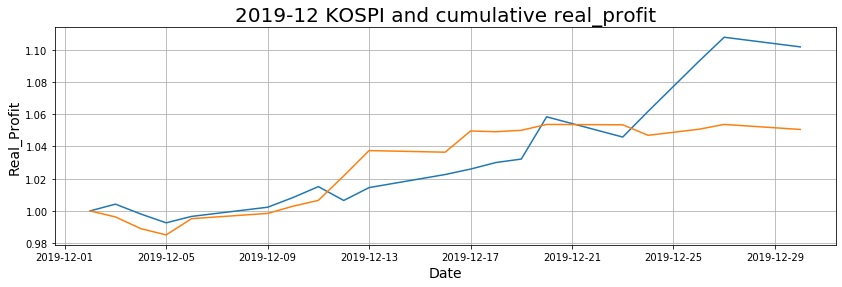

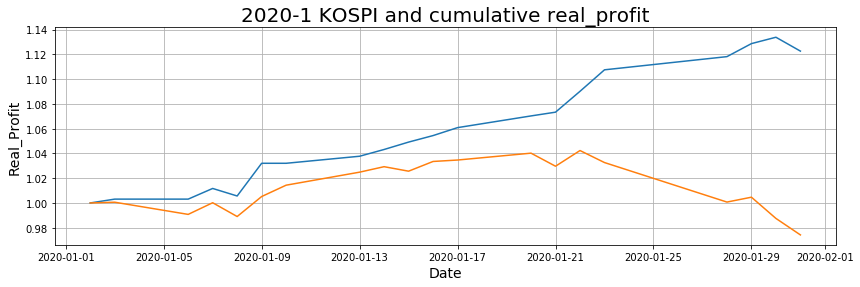

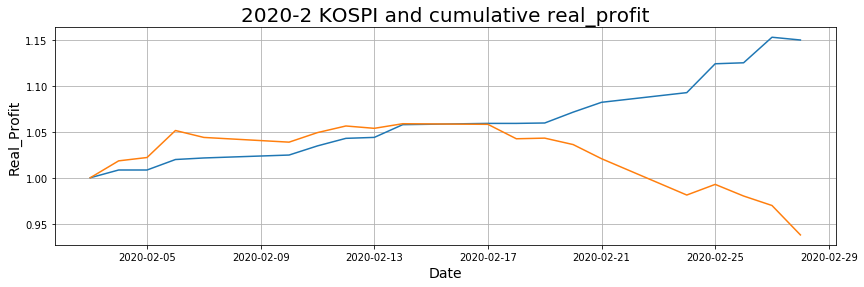

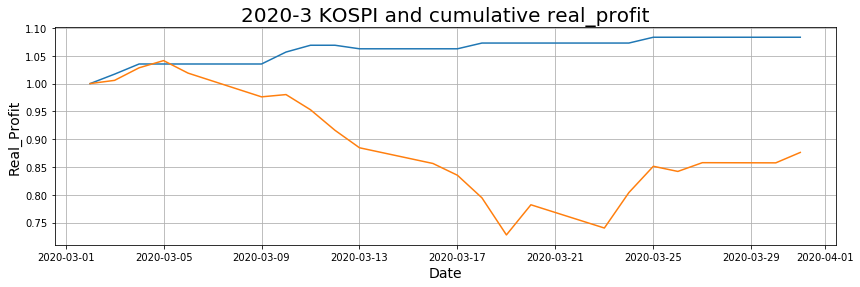

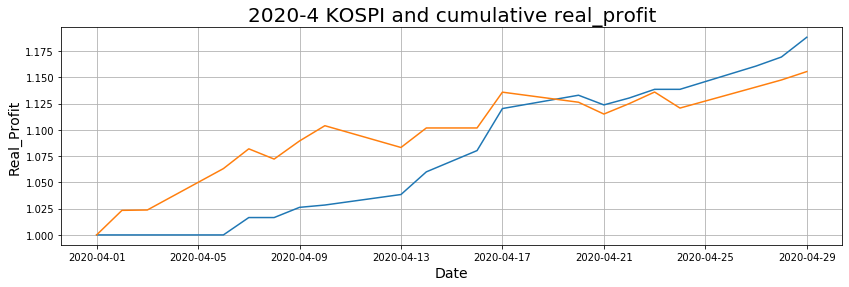

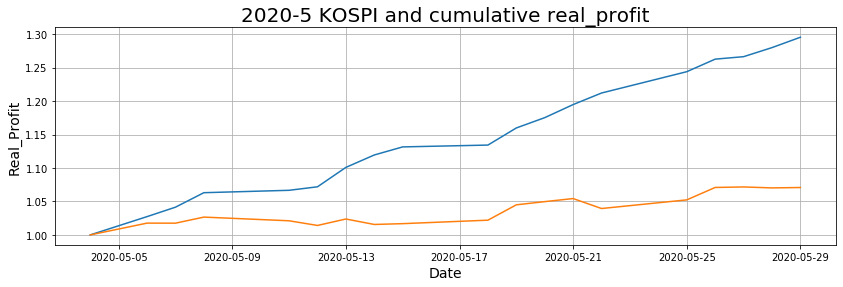

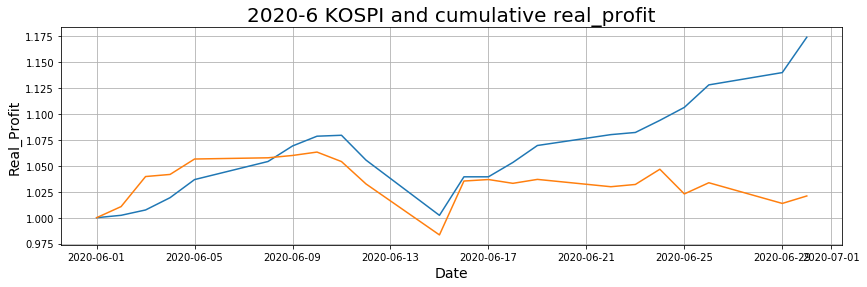

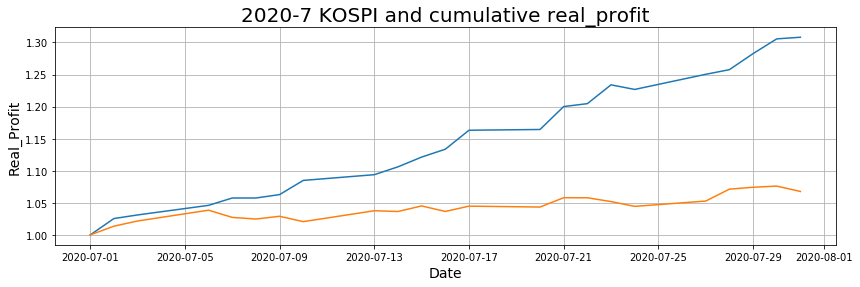

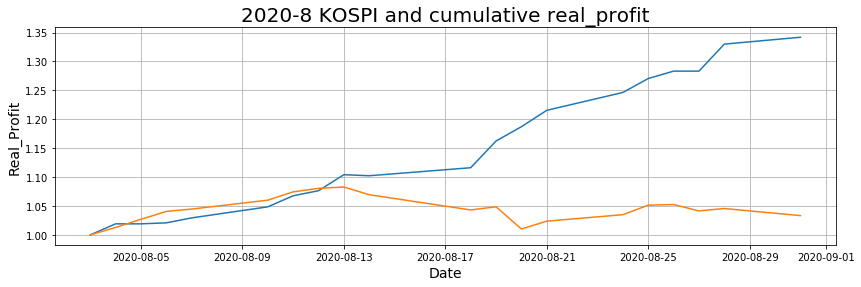

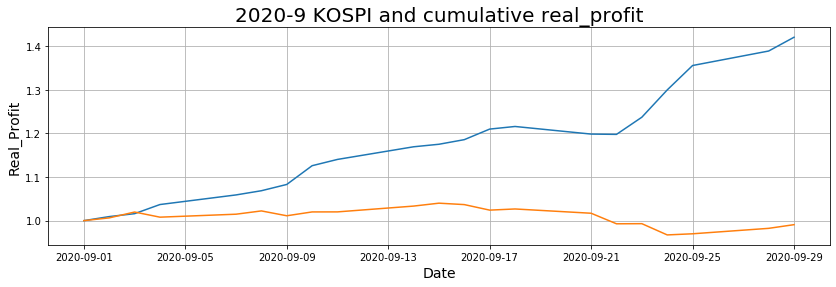

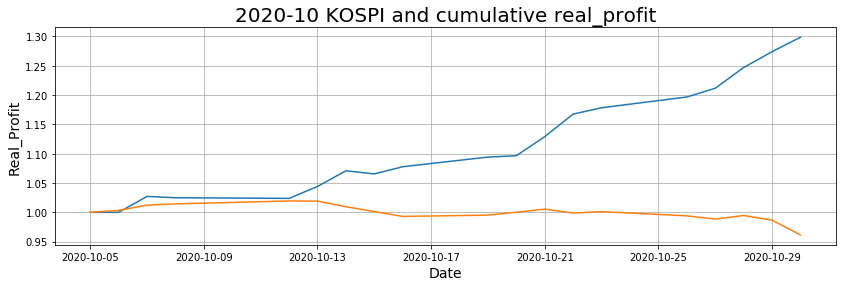

In [219]:
for year_num in range(2018,2021) :
    for month_num in range(1,13) :
        month_df = pd.DataFrame({"Date" : [], "KOSPI" : [], "sum_money" : []})
        for df_num in range(len(kospi_yield_df)):
            if kospi_yield_df.iloc[df_num,0].year == year_num and kospi_yield_df.iloc[df_num,0].month == month_num:
                temp_df = kospi_yield_df.iloc[df_num]
                month_df = month_df.append(temp_df)
        if len(month_df) != 0:
            month_df["KOSPI"] = month_df["KOSPI"] / month_df.iloc[0,1]
            month_df["sum_money"] = month_df["sum_money"] / month_df.iloc[0,2]
            plt.rcParams["figure.figsize"] = (14,4)
            plt.rcParams['axes.grid'] = True
            plt.plot(month_df["Date"], month_df["sum_money"])	# line 그래프를 그립니다
            plt.plot(month_df["Date"], month_df["KOSPI"])	# line 그래프를 그립니다
            plt.title('{}-{} KOSPI and cumulative real_profit'.format(year_num, month_num), fontsize=20)
            plt.xlabel('Date', fontsize=14)
            plt.ylabel('Real_Profit', fontsize=14)
            plt.show()	# 그래프를 화면에 보여줍니다

In [198]:
test_df

Date stock_name  today_big_win  today_small_win  today_lose  \
0  2018-05-08     SK하이닉스            0.0              0.0         0.0   
0  2018-05-09       태림포장            0.0              0.0         0.0   
0  2018-05-09        파미셀            1.0              0.0         0.0   
0  2018-05-09     케이피엠테크            1.0              0.0         0.0   
0  2018-05-09     아시아나항공            0.0              1.0         0.0   
..        ...        ...            ...              ...         ...   
0  2020-10-30    KPX생명과학            0.0              0.0         1.0   
0  2020-10-30      TCC스틸            1.0              0.0         0.0   
0  2020-10-30    삼성엔지니어링            1.0              0.0         0.0   
0  2020-10-30       써니전자            1.0              0.0         0.0   
0  2020-10-30      수산중공업            0.0              0.0         0.0   

    tomorrow_big_win  tomorrow_small_win  tomorrow_lose  day2_big_win  \
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
..               ...                 ...            ...           ...   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   

    day2_small_win  day2_lose  real_profit Nasdaq  
0              1.0        0.0     0.033735    U04  
0              0.0        0.0     0.075000    T01  
0              0.0        0.0     0.100000    T01  
0              0.0        0.0     0.100000    T01  
0              0.0        0.0     0.036965    T01  
..             ...        ...          ...    ...  
0              0.0        0.0    -0.050000    U04  
0              0.0        0.0     0.100000    U04  
0              0.0        0.0     0.100000    U04  
0              0.0        0.0     0.100000    U04  
0              0.0        0.0     0.075000    U04  

[1743 rows x 13 columns]

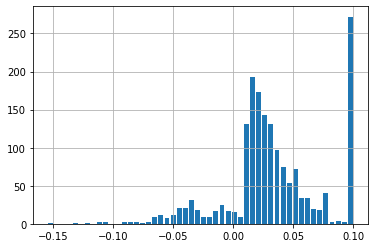

In [215]:
plt.hist(test_df["real_profit"], rwidth = 0.8, bins = 50)
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

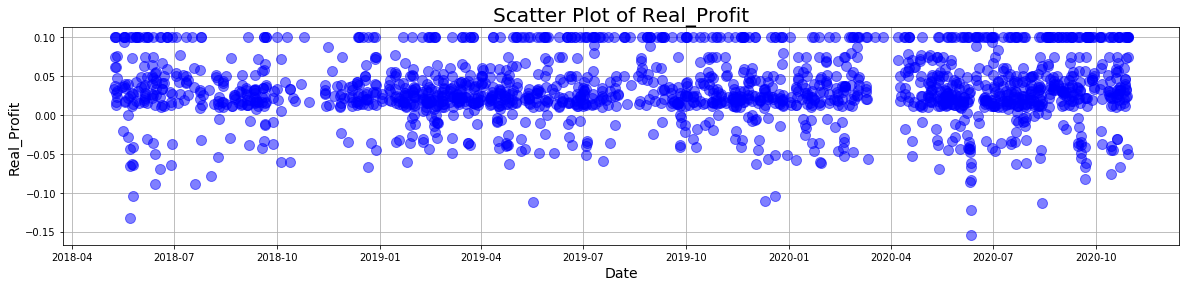

In [207]:
plt.plot('Date',  # x
         'real_profit',  # y
         data=test_df, 
         linestyle='none', 
         marker='o', 
         markersize=10,
         color='blue', 
         alpha=0.5)
plt.title('Scatter Plot of Real_Profit', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Real_Profit', fontsize=14)
plt.show()

In [228]:
stock_list = pd.read_csv("resources//stockcode.csv", index_col=[0], dtype = {"종목코드" : str})
stock_list

종목코드         회사명                      업종
0     000020        동화약품                 의약품 제조업
1     000040       KR모터스          그외 기타 운송장비 제조업
2     000050          경방                  종합 소매업
3     000060       메리츠화재                     보험업
4     000070       삼양홀딩스                  기타 금융업
...      ...         ...                     ...
2234  950160      코오롱티슈진   기초 의약물질 및 생물학적 제제 제조업
2235  950170         JTC                  종합 소매업
2236  950180         SNK          소프트웨어 개발 및 공급업
2237  950190         미투젠          소프트웨어 개발 및 공급업
2238  950200  소마젠(Reg.S)  그외 기타 전문, 과학 및 기술 서비스업

[2239 rows x 3 columns]

In [289]:
test_df

Date stock_name  today_big_win  today_small_win  today_lose  \
0  2018-05-08     SK하이닉스            0.0              0.0         0.0   
0  2018-05-09       태림포장            0.0              0.0         0.0   
0  2018-05-09        파미셀            1.0              0.0         0.0   
0  2018-05-09     케이피엠테크            1.0              0.0         0.0   
0  2018-05-09     아시아나항공            0.0              1.0         0.0   
..        ...        ...            ...              ...         ...   
0  2020-10-30    KPX생명과학            0.0              0.0         1.0   
0  2020-10-30      TCC스틸            1.0              0.0         0.0   
0  2020-10-30    삼성엔지니어링            1.0              0.0         0.0   
0  2020-10-30       써니전자            1.0              0.0         0.0   
0  2020-10-30      수산중공업            0.0              0.0         0.0   

    tomorrow_big_win  tomorrow_small_win  tomorrow_lose  day2_big_win  \
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
..               ...                 ...            ...           ...   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   

    day2_small_win  day2_lose  real_profit Nasdaq                    sector  \
0              1.0        0.0     0.033735    U04                   반도체 제조업   
0              0.0        0.0     0.075000    T01     골판지, 종이 상자 및 종이용기 제조업   
0              0.0        0.0     0.100000    T01     기초 의약물질 및 생물학적 제제 제조업   
0              0.0        0.0     0.100000    T01               기타 화학제품 제조업   
0              0.0        0.0     0.036965    T01                 항공 여객 운송업   
..             ...        ...          ...    ...                       ...   
0              0.0        0.0    -0.050000    U04     기초 의약물질 및 생물학적 제제 제조업   
0              0.0        0.0     0.100000    U04                 1차 철강 제조업   
0              0.0        0.0     0.100000    U04  건축기술, 엔지니어링 및 관련 기술 서비스업   
0              0.0        0.0     0.100000    U04                   반도체 제조업   
0              0.0        0.0     0.075000    U04             특수 목적용 기계 제조업   

    week  
0      1  
0      1  
0      1  
0      1  
0      1  
..   ...  
0    126  
0    126  
0    126  
0    126  
0    126  

[1743 rows x 15 columns]

In [ ]:
corona_df = test_df[test_df["Date"]]

In [326]:
corona_df = test_df.copy()
for i in range(len(test_df)) :
    if test_df.iloc[i,0].year == 2020 and test_df.iloc[i,0].month in [2,3] :
        corona_df = corona_df.append(test_df.iloc[i,:])


In [334]:
corona_df = corona_df.iloc[1767:1817]

In [295]:
corona_df

Date stock_name  today_big_win  today_small_win  today_lose  \
0  2020-02-03        SDN            0.0              1.0         0.0   
0  2020-02-03       신일전자            0.0              1.0         0.0   
0  2020-02-03        케이프            0.0              1.0         0.0   
0  2020-02-03     코스모신소재            0.0              1.0         0.0   
0  2020-02-03      국영지앤엠            0.0              1.0         0.0   
..        ...        ...            ...              ...         ...   
0  2020-03-11       알서포트            1.0              0.0         0.0   
0  2020-03-11         다날            0.0              1.0         0.0   
0  2020-03-12      씨아이에스            0.0              0.0         0.0   
0  2020-03-18        케이프            1.0              0.0         0.0   
0  2020-03-25     엑세스바이오            1.0              0.0         0.0   

    tomorrow_big_win  tomorrow_small_win  tomorrow_lose  day2_big_win  \
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
..               ...                 ...            ...           ...   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            1.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   

    day2_small_win  day2_lose  real_profit Nasdaq                 sector  week  
0              0.0        0.0     0.069307    D04       기계장비 및 관련 물품 도매업    90  
0              0.0        0.0     0.068681    D04       기계장비 및 관련 물품 도매업    90  
0              0.0        0.0     0.041667    D04            선박 및 보트 건조업    90  
0              0.0        0.0     0.043269    D04            기타 화학제품 제조업    90  
0              0.0        0.0     0.074890    D04          유리 및 유리제품 제조업    90  
..             ...        ...          ...    ...                    ...   ...  
0              0.0        0.0     0.100000    U04         소프트웨어 개발 및 공급업    95  
0              0.0        0.0     0.020958    U04         소프트웨어 개발 및 공급업    95  
0              0.0        0.0    -0.057221    D04          특수 목적용 기계 제조업    95  
0              0.0        0.0     0.100000    U04            선박 및 보트 건조업    96  
0              0.0        0.0     0.100000    U04  의료용품 및 기타 의약 관련제품 제조업    96  

[76 rows x 15 columns]

In [241]:
week_day = 7
week_num = 0
for i in range(len(test_df)) :
    if test_df.iloc[i, 0].weekday() < week_day :
        week_num += 1
    week_day = test_df.iloc[i, 0].weekday()
    test_df.iloc[i,14] = week_num
    test_df.iloc[i,13] = stock_list[stock_list["회사명"] == test_df.iloc[i,1]].업종.values[0]
test_df

Date stock_name  today_big_win  today_small_win  today_lose  \
0  2018-05-08     SK하이닉스            0.0              0.0         0.0   
0  2018-05-09       태림포장            0.0              0.0         0.0   
0  2018-05-09        파미셀            1.0              0.0         0.0   
0  2018-05-09     케이피엠테크            1.0              0.0         0.0   
0  2018-05-09     아시아나항공            0.0              1.0         0.0   
..        ...        ...            ...              ...         ...   
0  2020-10-30    KPX생명과학            0.0              0.0         1.0   
0  2020-10-30      TCC스틸            1.0              0.0         0.0   
0  2020-10-30    삼성엔지니어링            1.0              0.0         0.0   
0  2020-10-30       써니전자            1.0              0.0         0.0   
0  2020-10-30      수산중공업            0.0              0.0         0.0   

    tomorrow_big_win  tomorrow_small_win  tomorrow_lose  day2_big_win  \
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
..               ...                 ...            ...           ...   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                1.0                 0.0            0.0           0.0   

    day2_small_win  day2_lose  real_profit Nasdaq                    sector  \
0              1.0        0.0     0.033735    U04                   반도체 제조업   
0              0.0        0.0     0.075000    T01     골판지, 종이 상자 및 종이용기 제조업   
0              0.0        0.0     0.100000    T01     기초 의약물질 및 생물학적 제제 제조업   
0              0.0        0.0     0.100000    T01               기타 화학제품 제조업   
0              0.0        0.0     0.036965    T01                 항공 여객 운송업   
..             ...        ...          ...    ...                       ...   
0              0.0        0.0    -0.050000    U04     기초 의약물질 및 생물학적 제제 제조업   
0              0.0        0.0     0.100000    U04                 1차 철강 제조업   
0              0.0        0.0     0.100000    U04  건축기술, 엔지니어링 및 관련 기술 서비스업   
0              0.0        0.0     0.100000    U04                   반도체 제조업   
0              0.0        0.0     0.075000    U04             특수 목적용 기계 제조업   

    week  
0      1  
0      1  
0      1  
0      1  
0      1  
..   ...  
0    126  
0    126  
0    126  
0    126  
0    126  

[1743 rows x 15 columns]

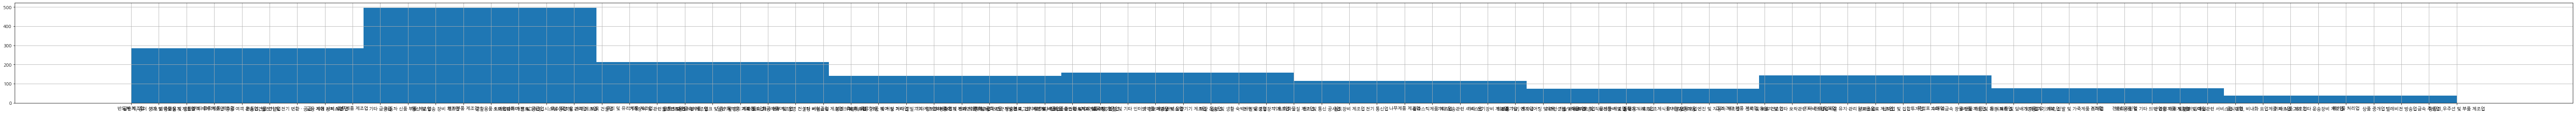

In [247]:
plt.hist(test_df["sector"])
plt.rcParams["figure.figsize"] = (400,4)
plt.rc('font', family='NanumGothic')
plt.show()

In [253]:
sector_list = list(test_df["sector"].unique())
print(len(sector_list))
sector_list #= sector_list.set_index(drop = True)

85


['반도체 제조업',
 '골판지, 종이 상자 및 종이용기 제조업',
 '기초 의약물질 및 생물학적 제제 제조업',
 '기타 화학제품 제조업',
 '항공 여객 운송업',
 '건물 건설업',
 '전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업',
 '금융 지원 서비스업',
 '고무제품 제조업',
 '기타 금융업',
 '자동차 신품 부품 제조업',
 '통신 및 방송 장비 제조업',
 '전자부품 제조업',
 '생활용품 도매업',
 '소프트웨어 개발 및 공급업',
 '컴퓨터 프로그래밍, 시스템 통합 및 관리업',
 '특수 목적용 기계 제조업',
 '토목 건설업',
 '유리 및 유리제품 제조업',
 '기계장비 및 관련 물품 도매업',
 '절연선 및 케이블 제조업',
 '구조용 금속제품, 탱크 및 증기발생기 제조업',
 '일반 목적용 기계 제조업',
 '기타 금속 가공제품 제조업',
 '회사 본부 및 경영 컨설팅 서비스업',
 '1차 비철금속 제조업',
 '봉제의복 제조업',
 '도축, 육류 가공 및 저장 처리업',
 '측정, 시험, 항해, 제어 및 기타 정밀기기 제조업; 광학기기 제외',
 '기타 정보 서비스업',
 '기타 종이 및 판지 제품 제조업',
 '자연과학 및 공학 연구개발업',
 '영화, 비디오물, 방송프로그램 제작 및 배급업',
 '서적, 잡지 및 기타 인쇄물 출판업',
 '시멘트, 석회, 플라스터 및 그 제품 제조업',
 '제재 및 목재 가공업',
 '자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업',
 '의약품 제조업',
 '영상 및 음향기기 제조업',
 '해상 운송업',
 '일반 및 생활 숙박시설 운영업',
 '전구 및 조명장치 제조업',
 '기초 화학물질 제조업',
 '전기 및 통신 공사업',
 '철도장비 제조업',
 '전기 통신업',
 '나무제품 제조업',
 '플라스틱제품 제조업',
 '기타 운송관련 서비스업',
 '기타 전기장비 제조업',
 '의료용 기기 제조업',
 '건축기술, 엔지니어링 및 관련 기술 서비스업',
 '해체

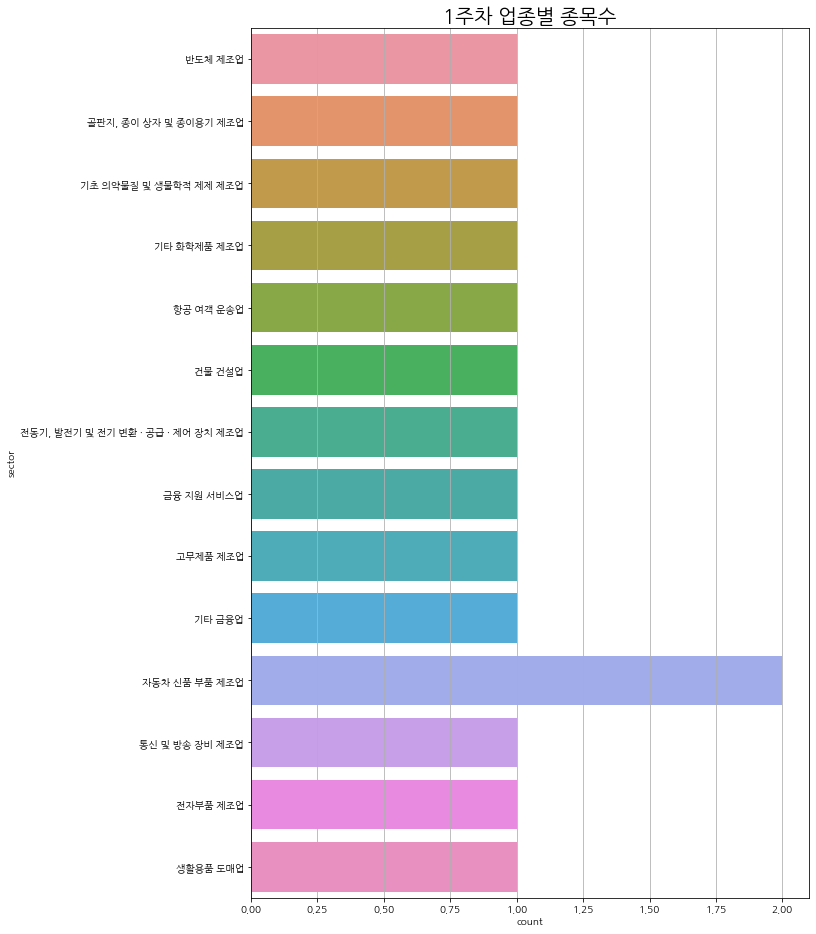

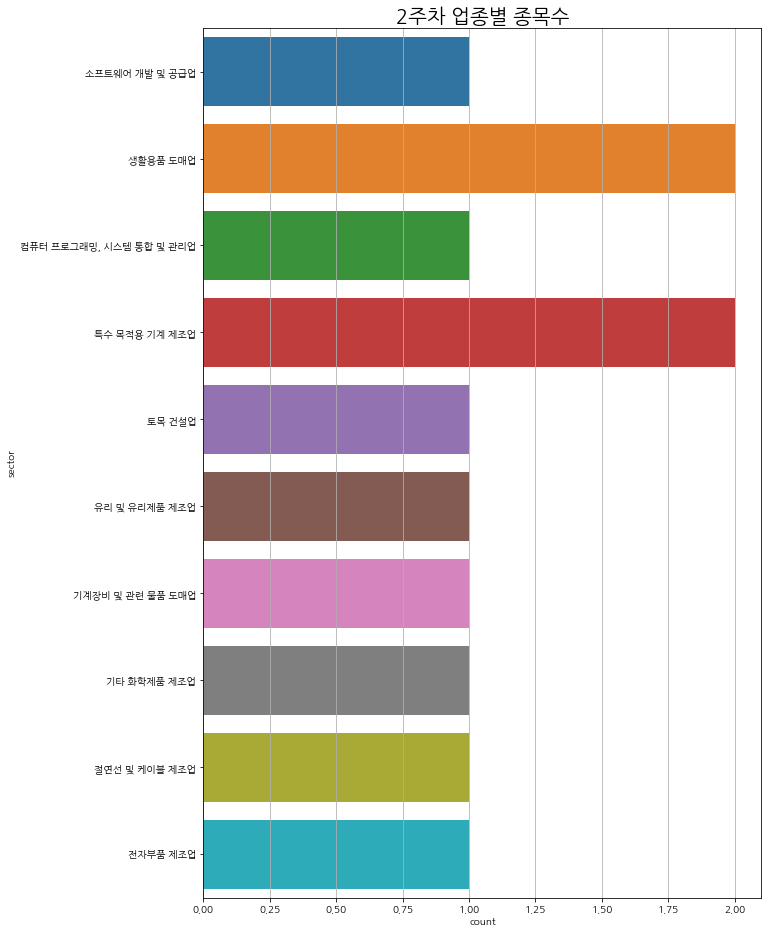

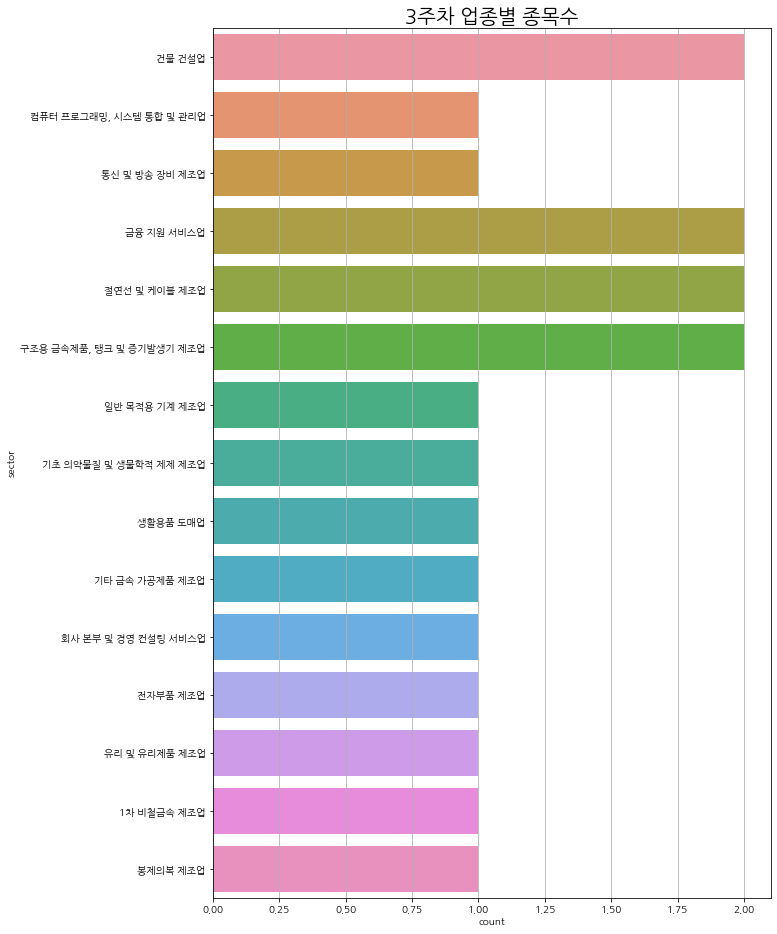

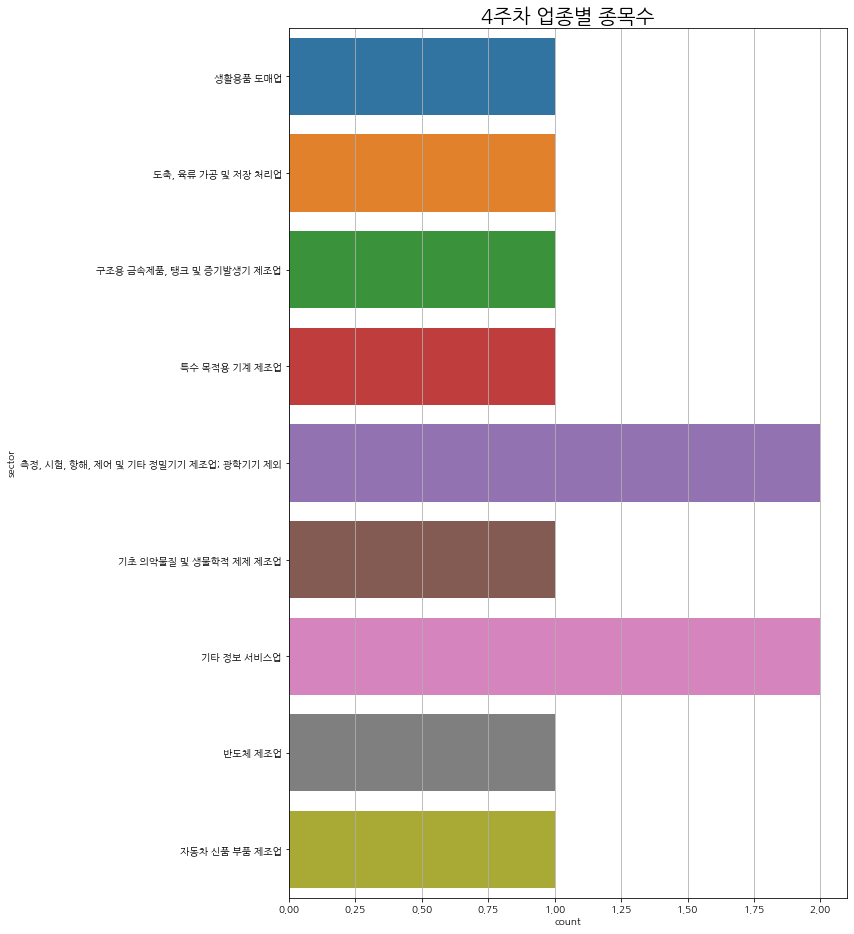

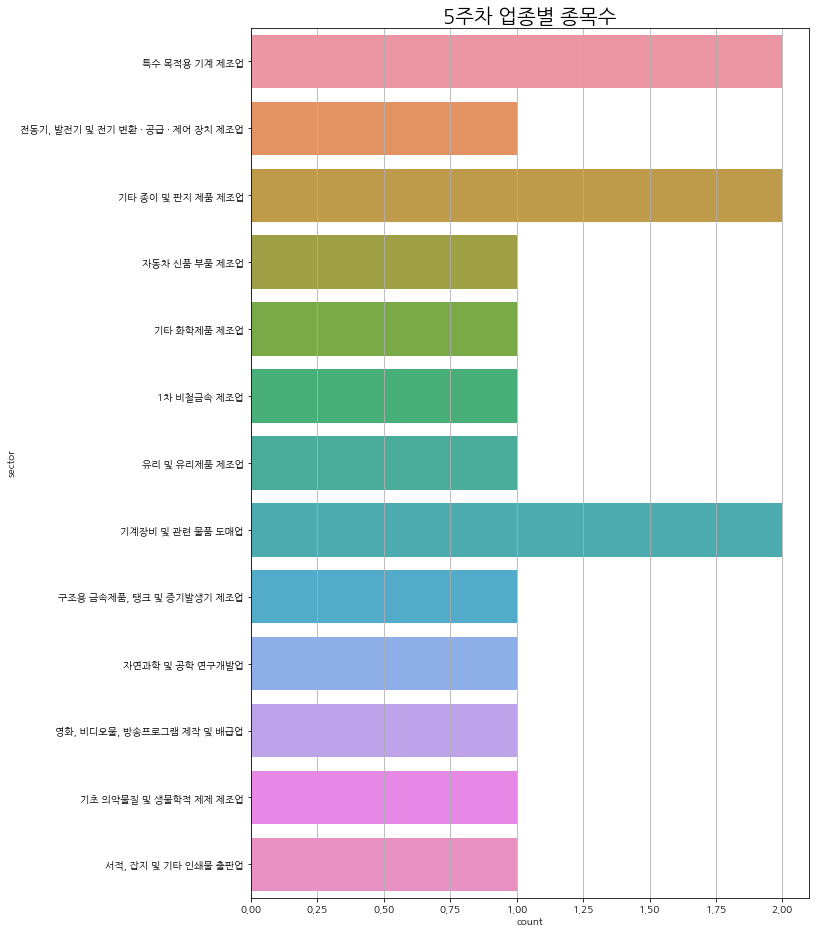

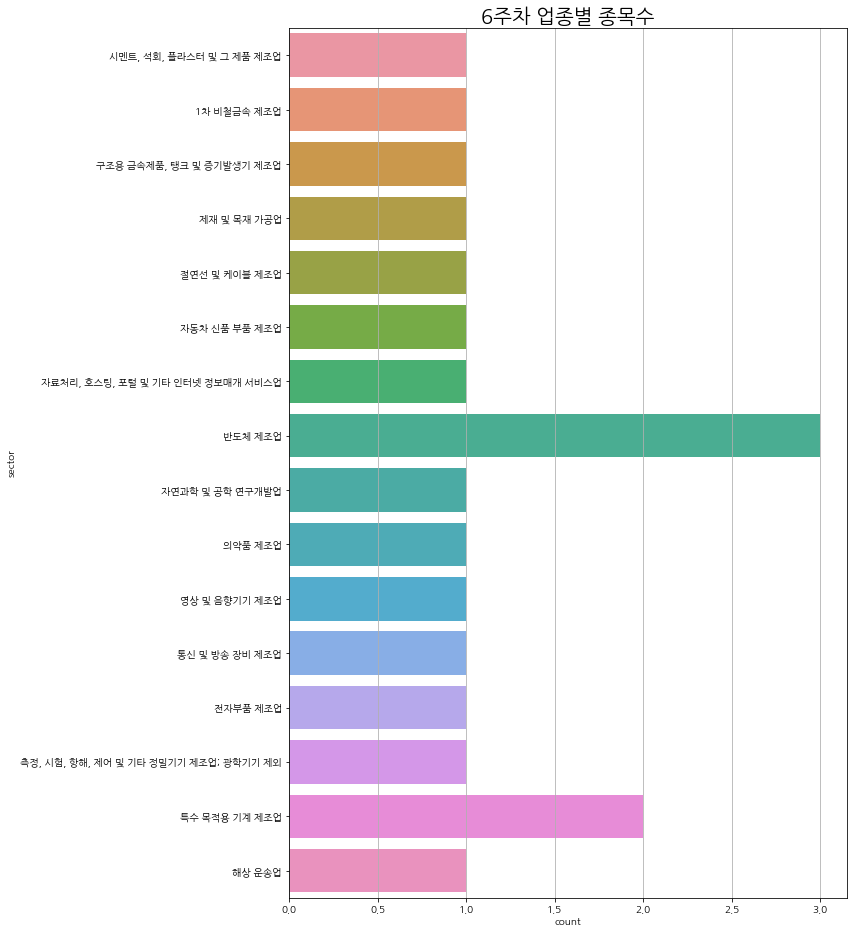

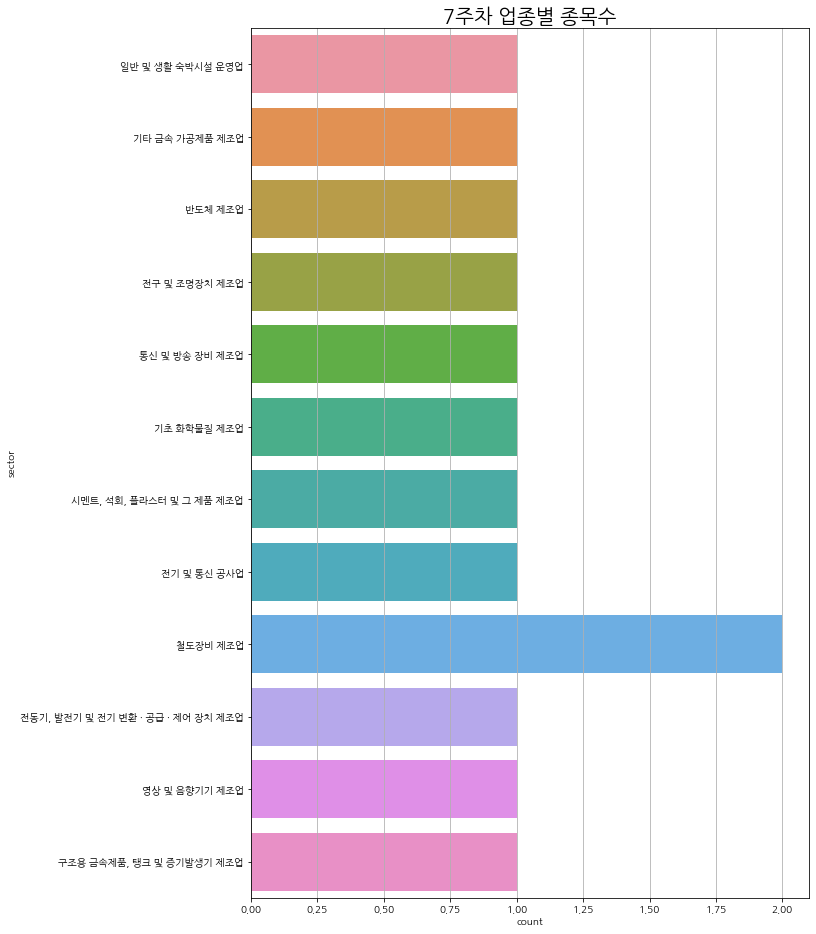

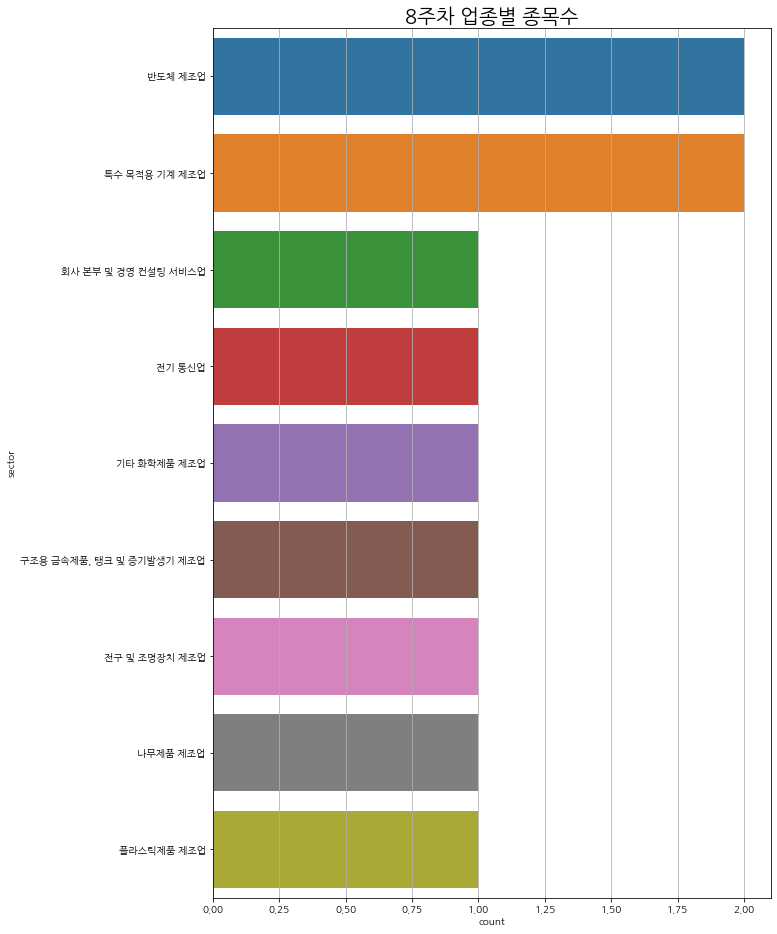

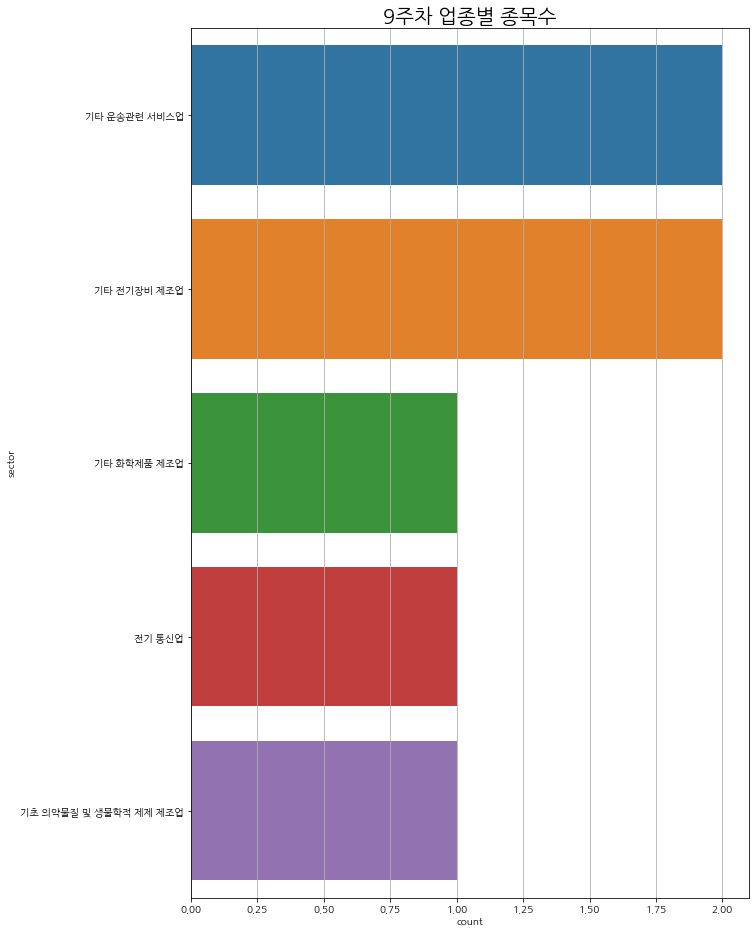

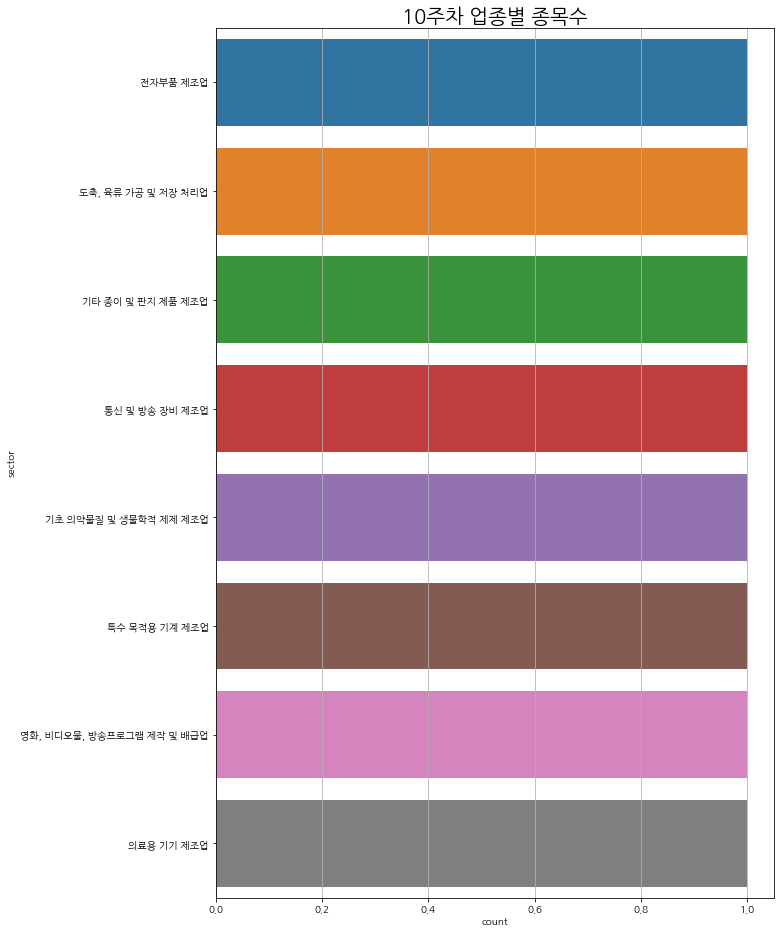

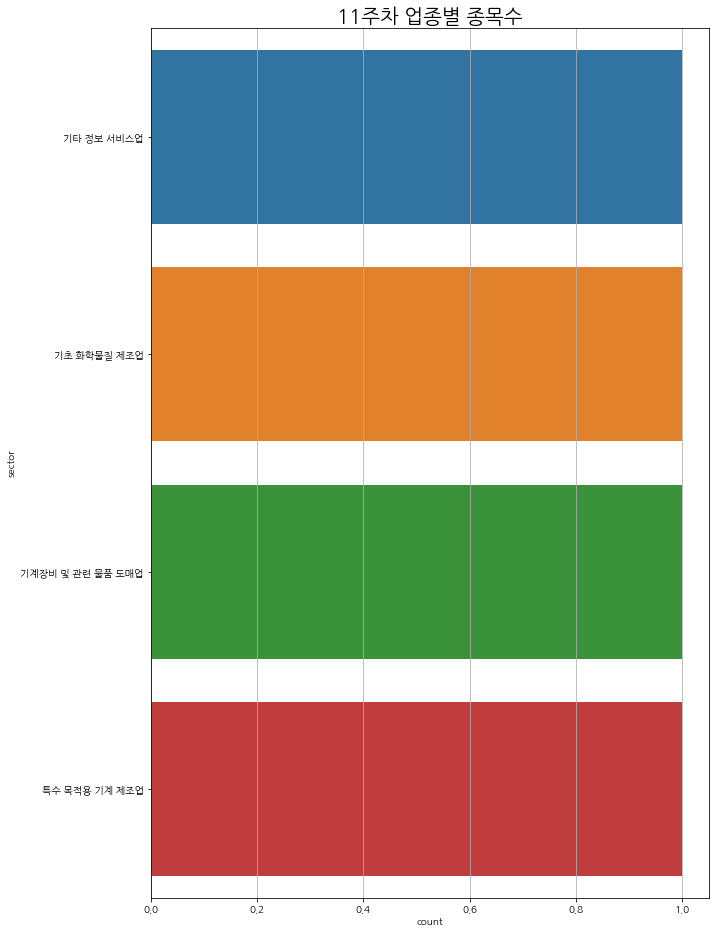

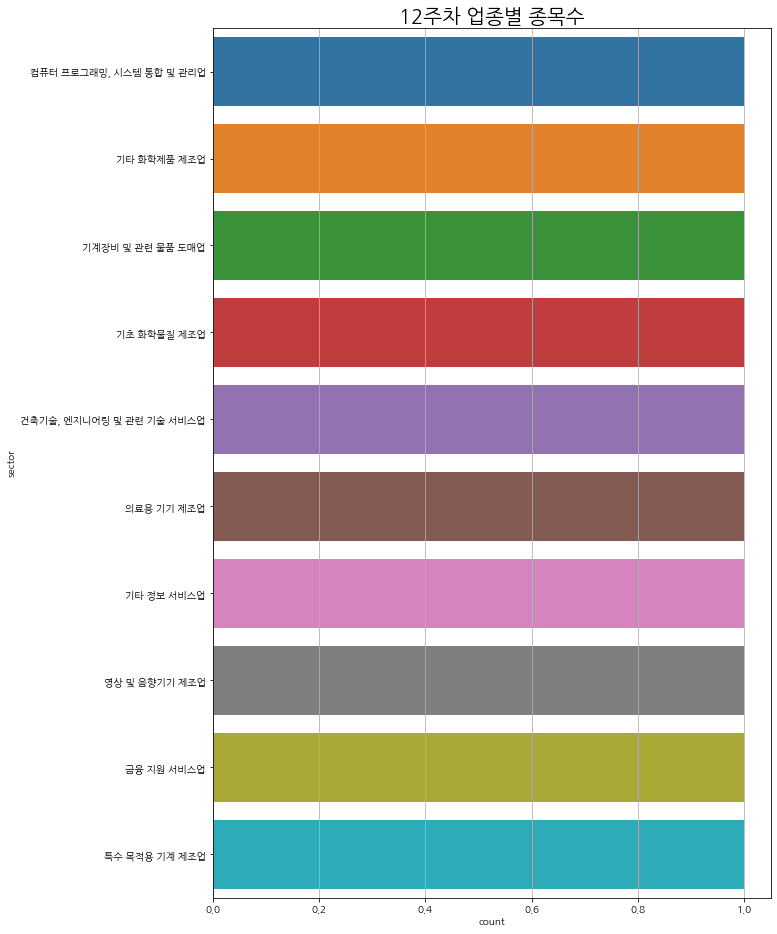

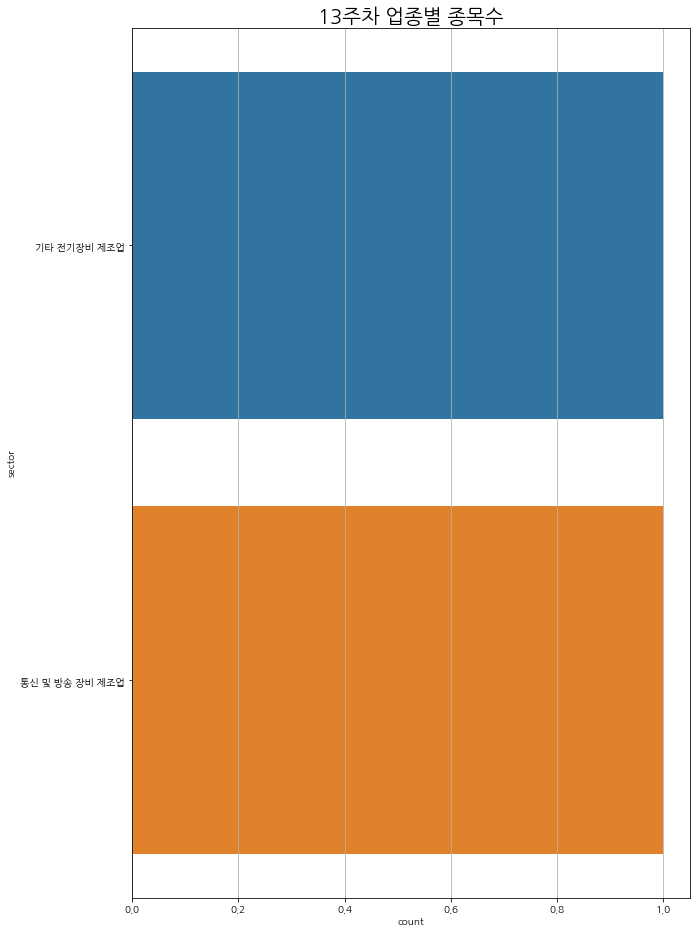

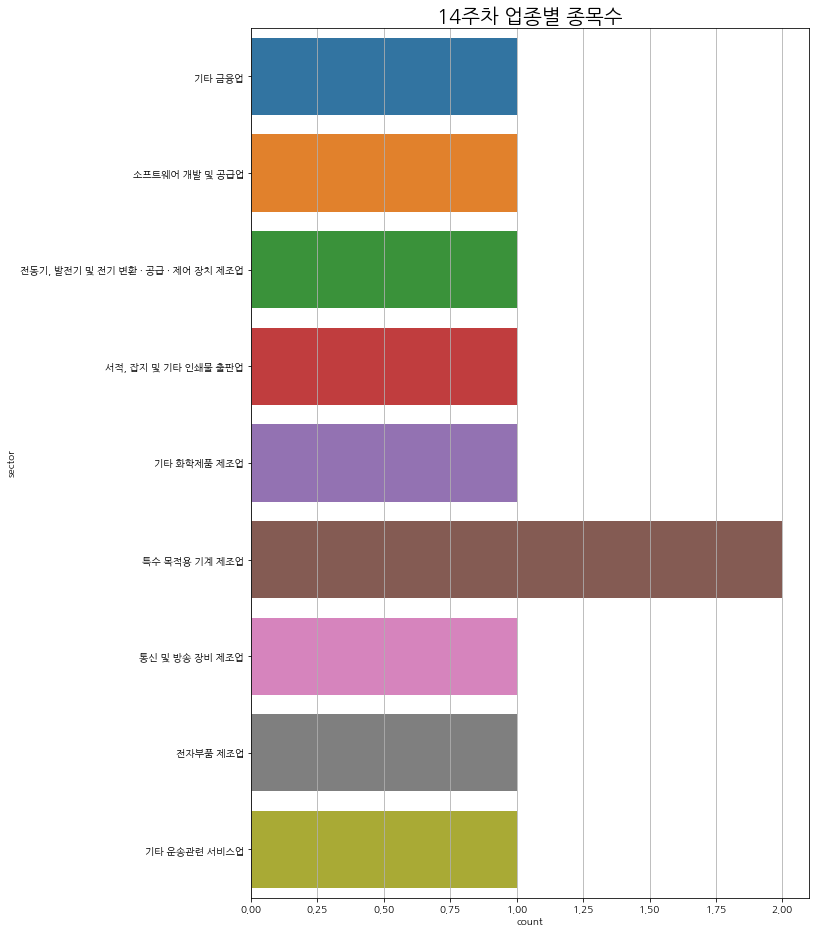

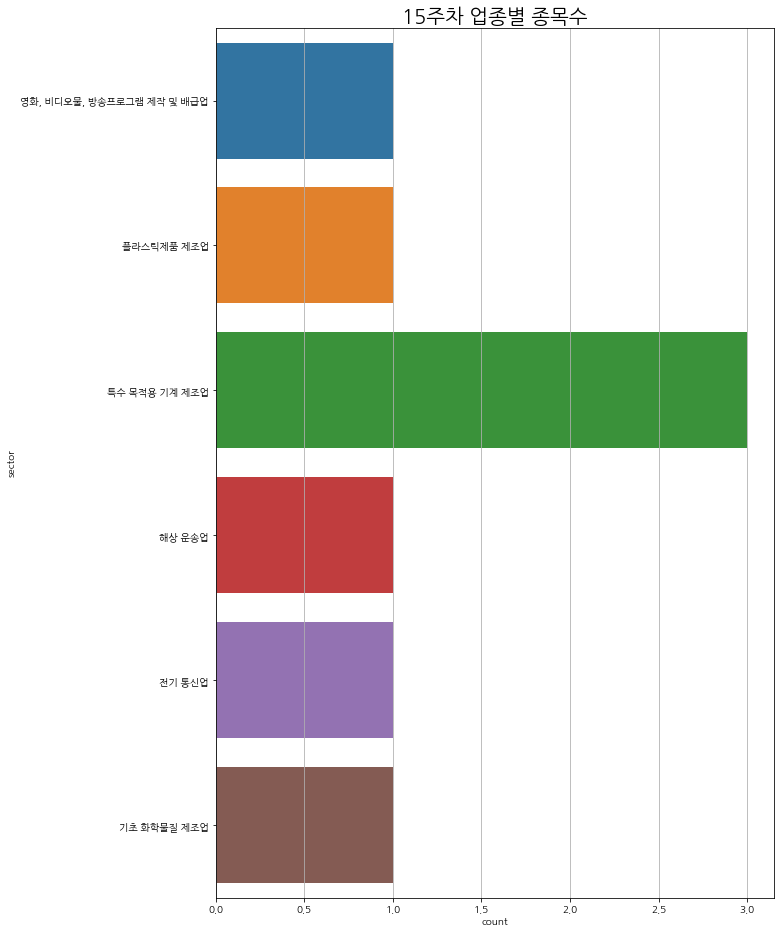

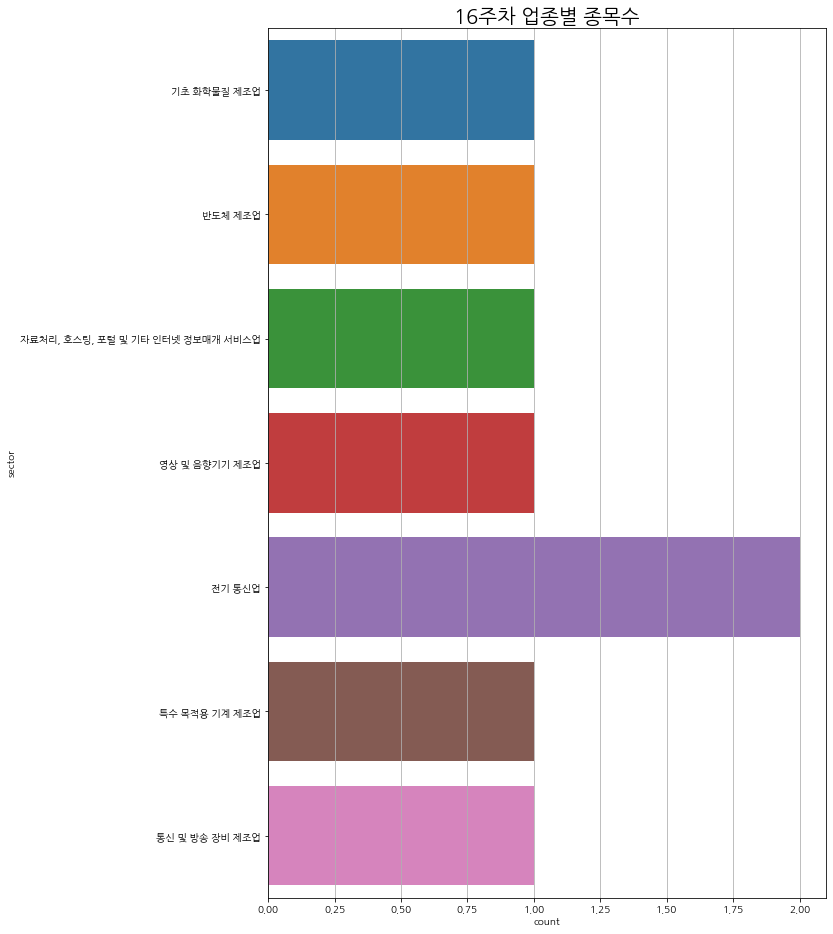

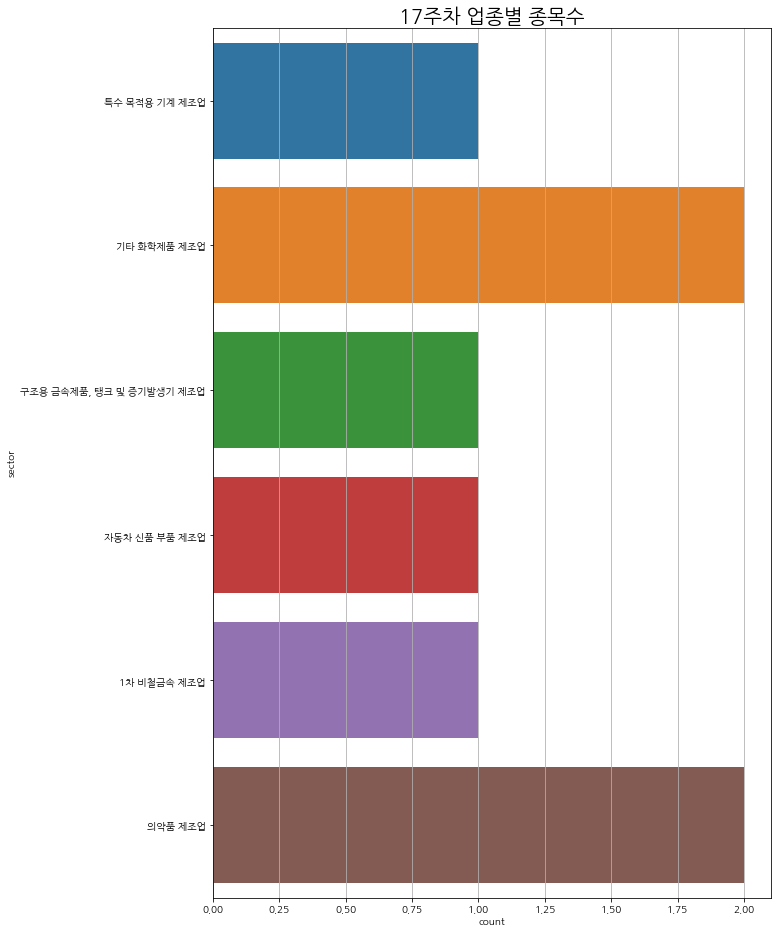

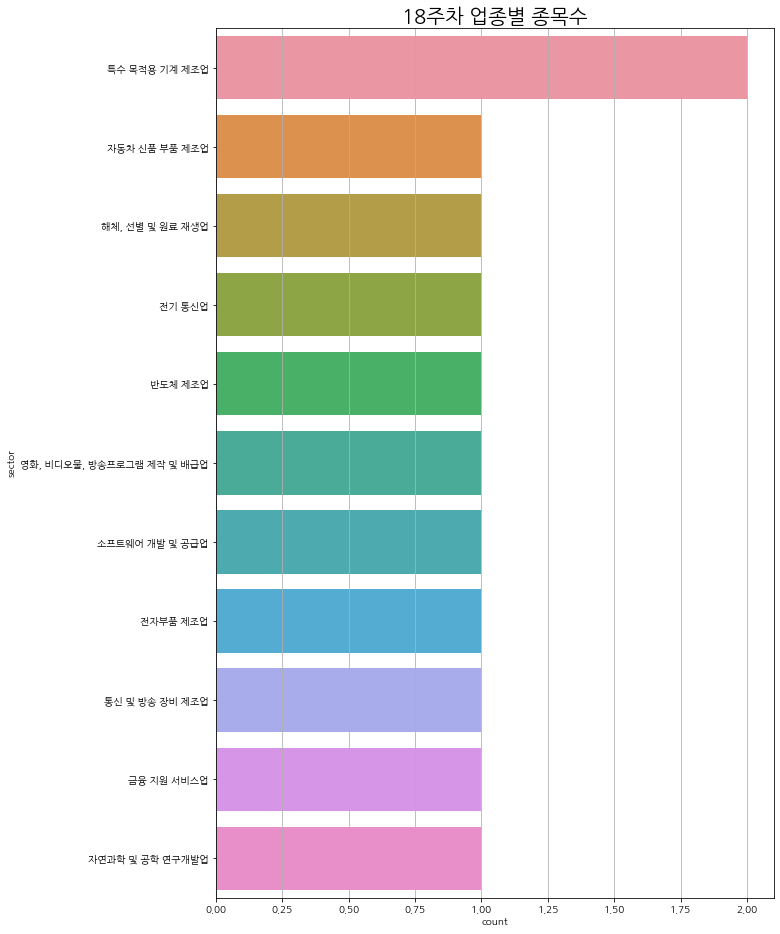

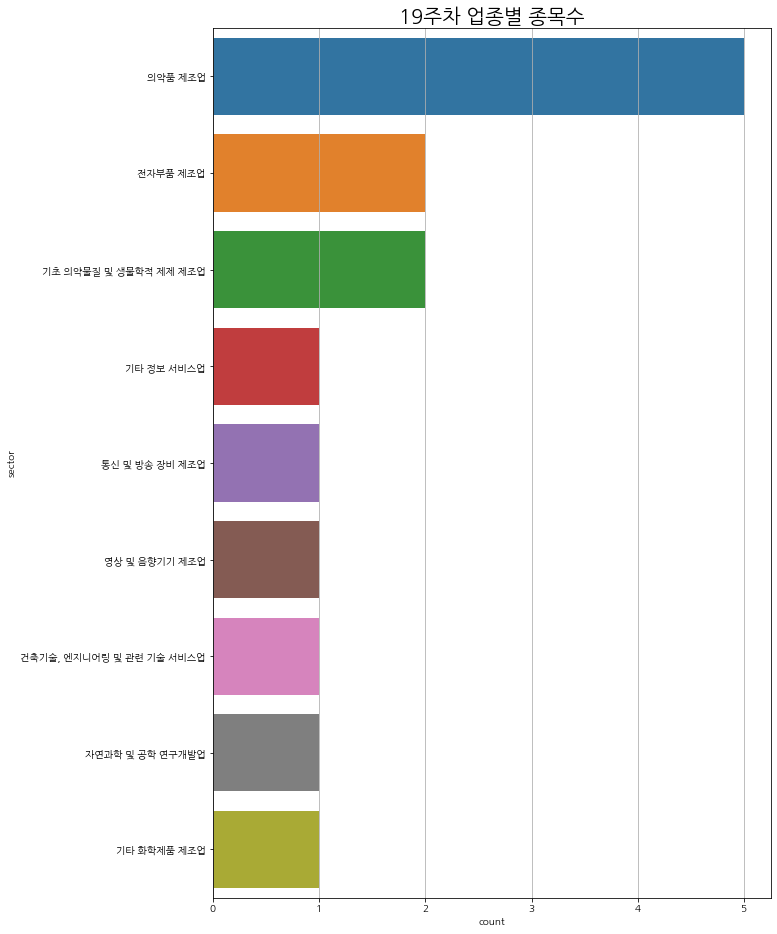

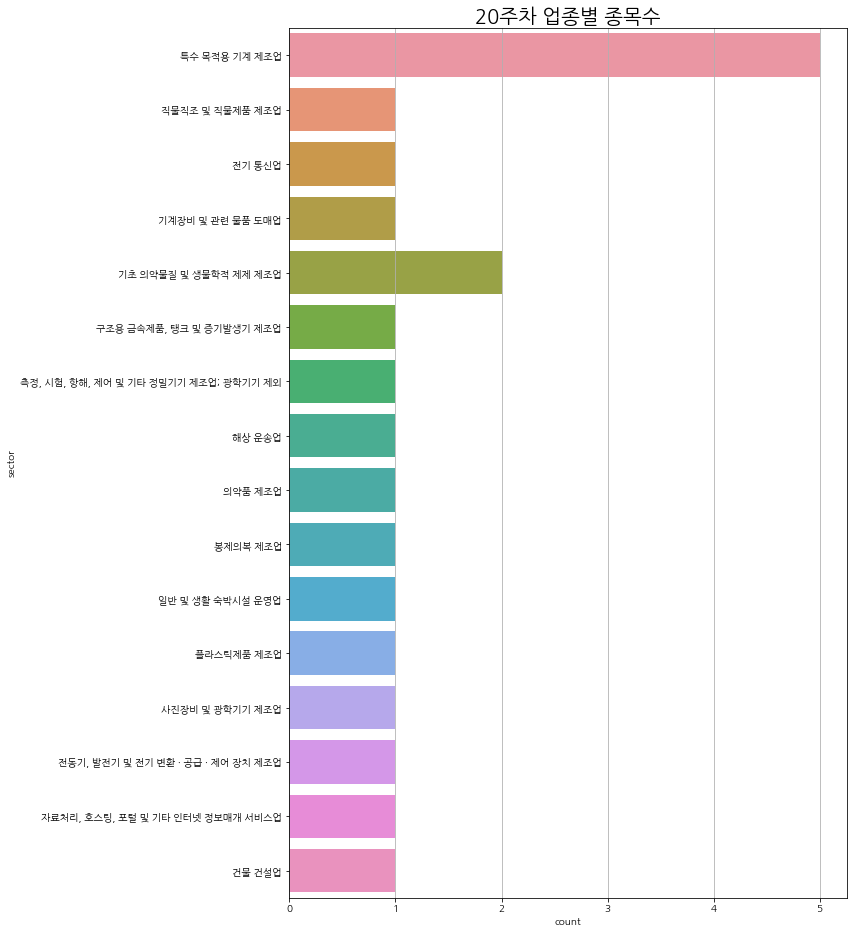

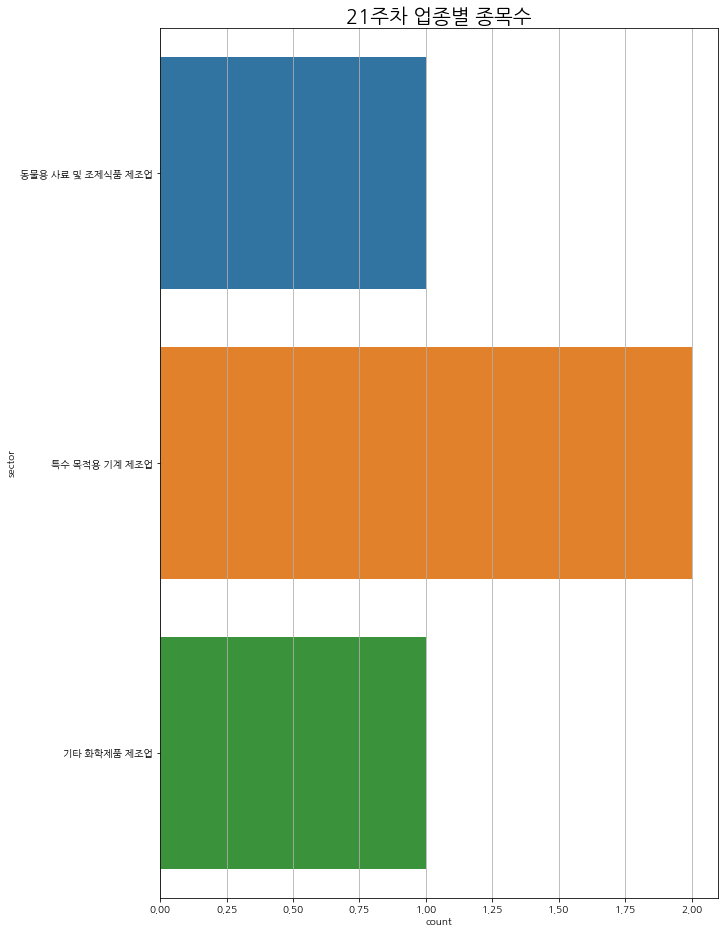

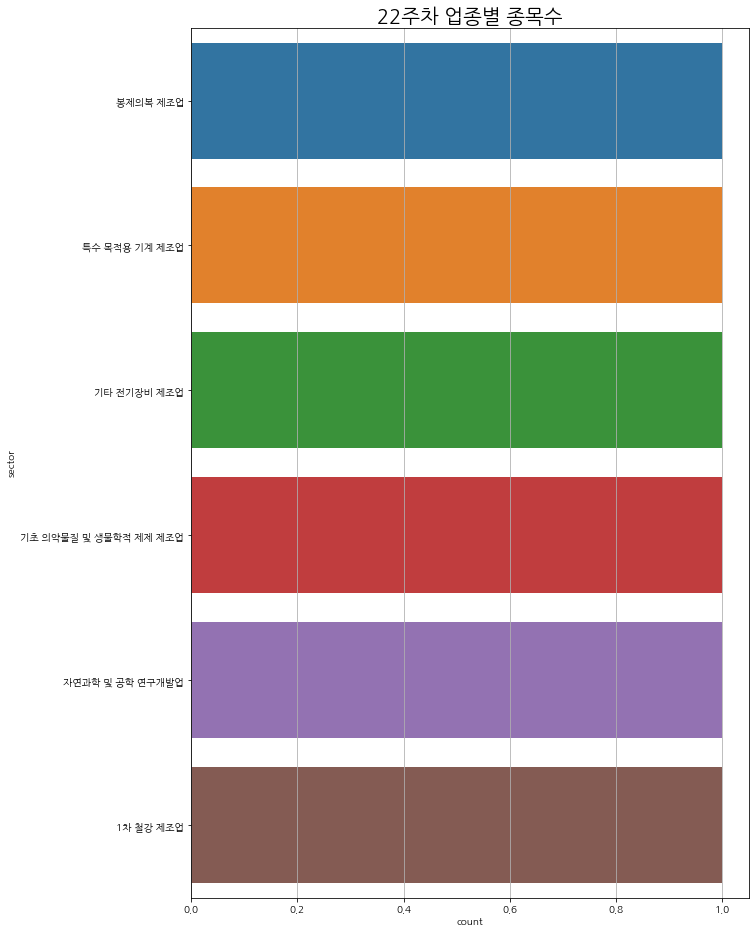

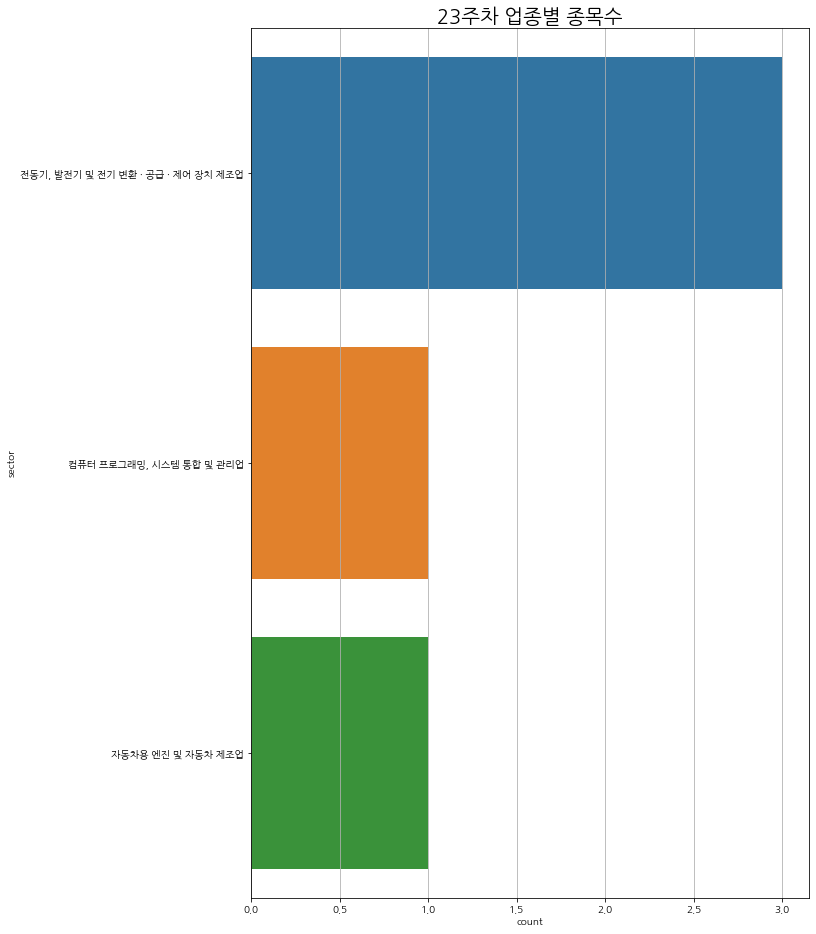

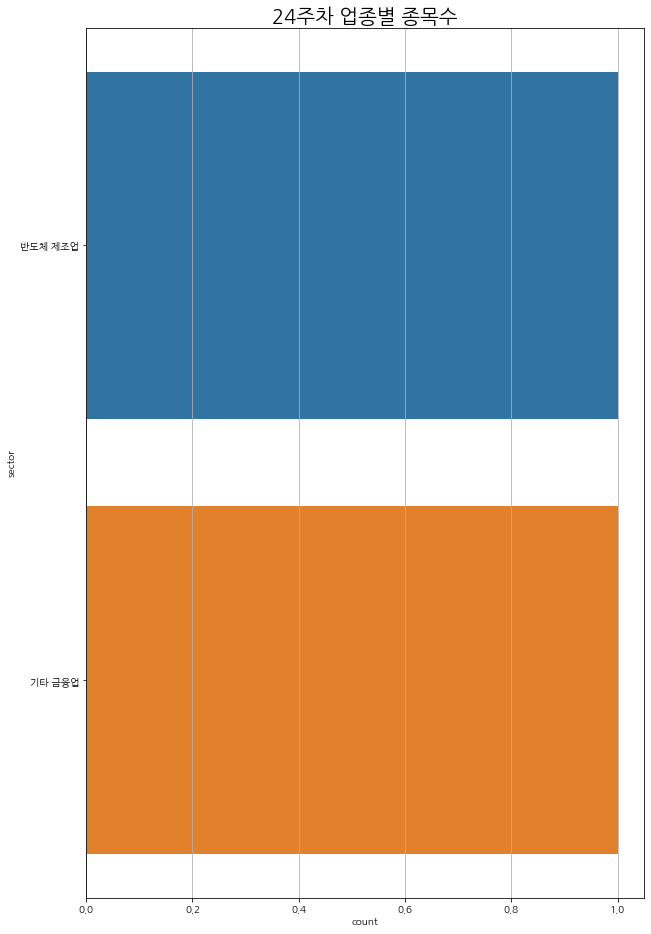

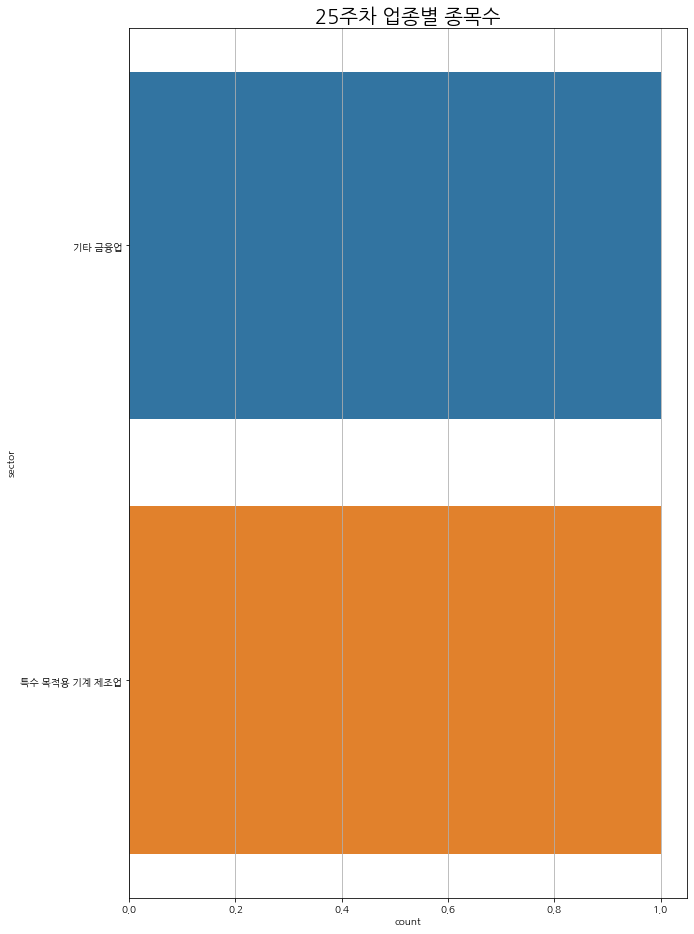

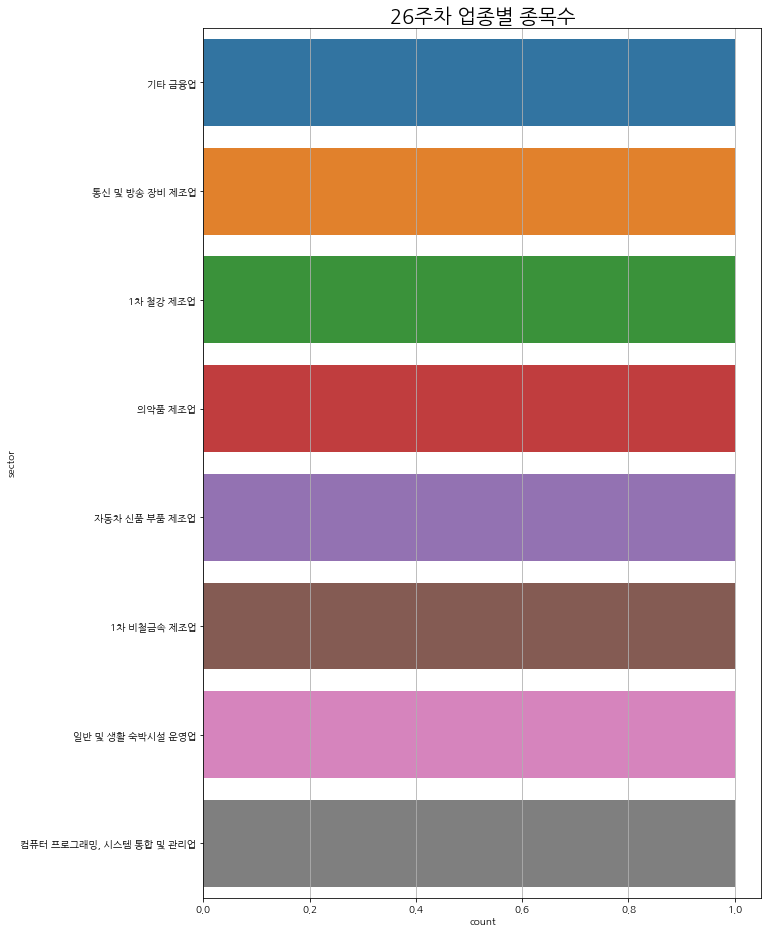

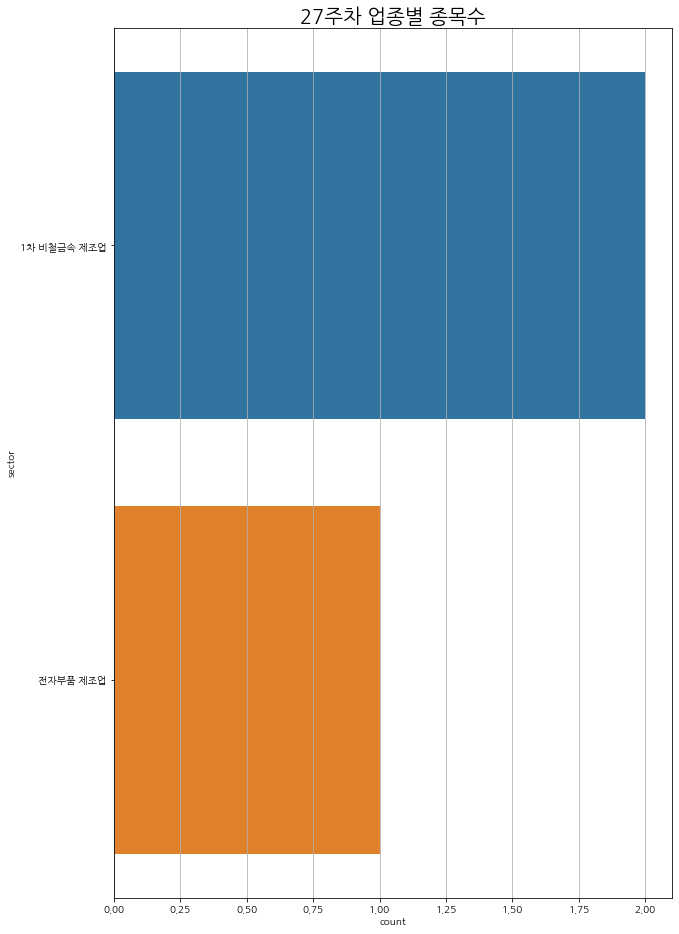

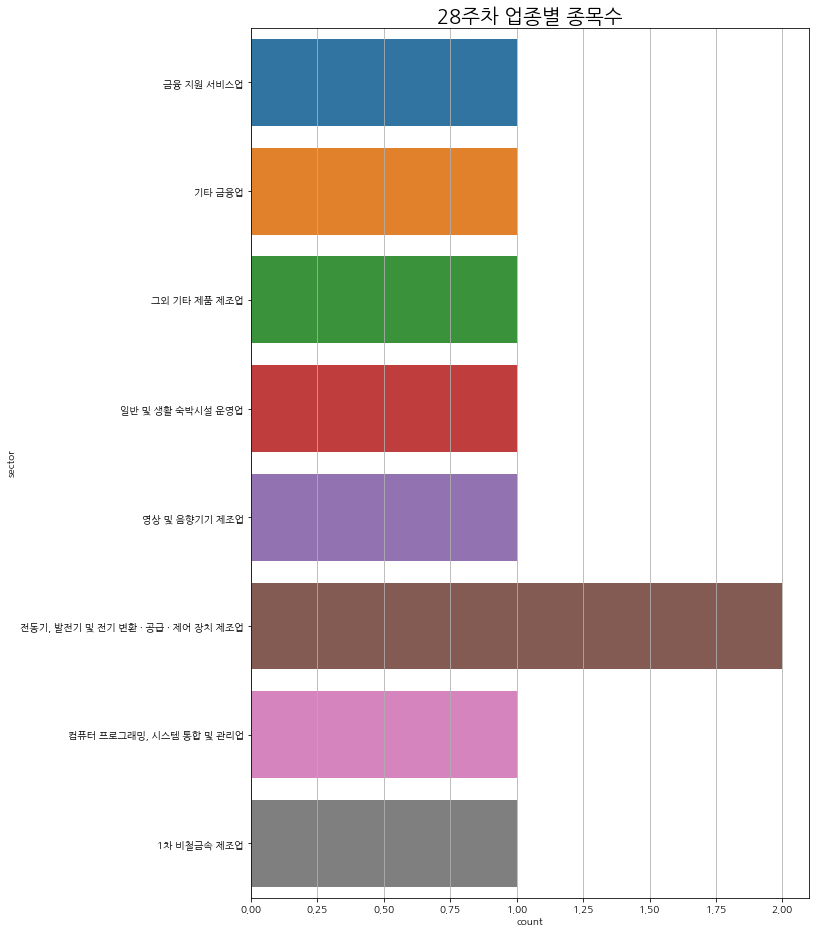

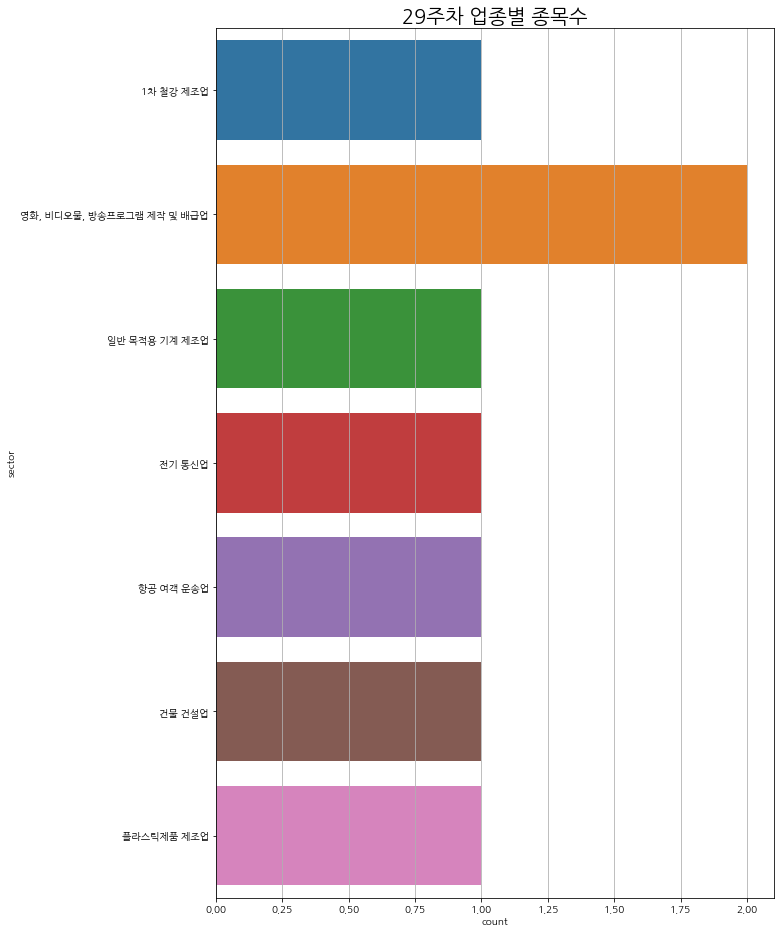

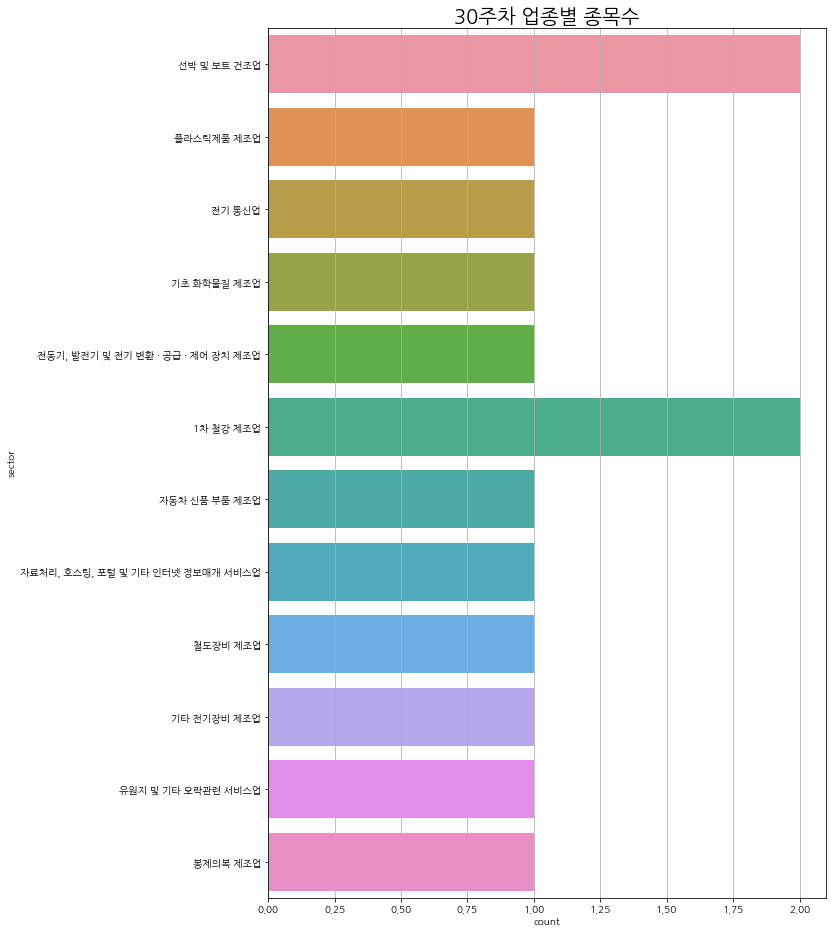

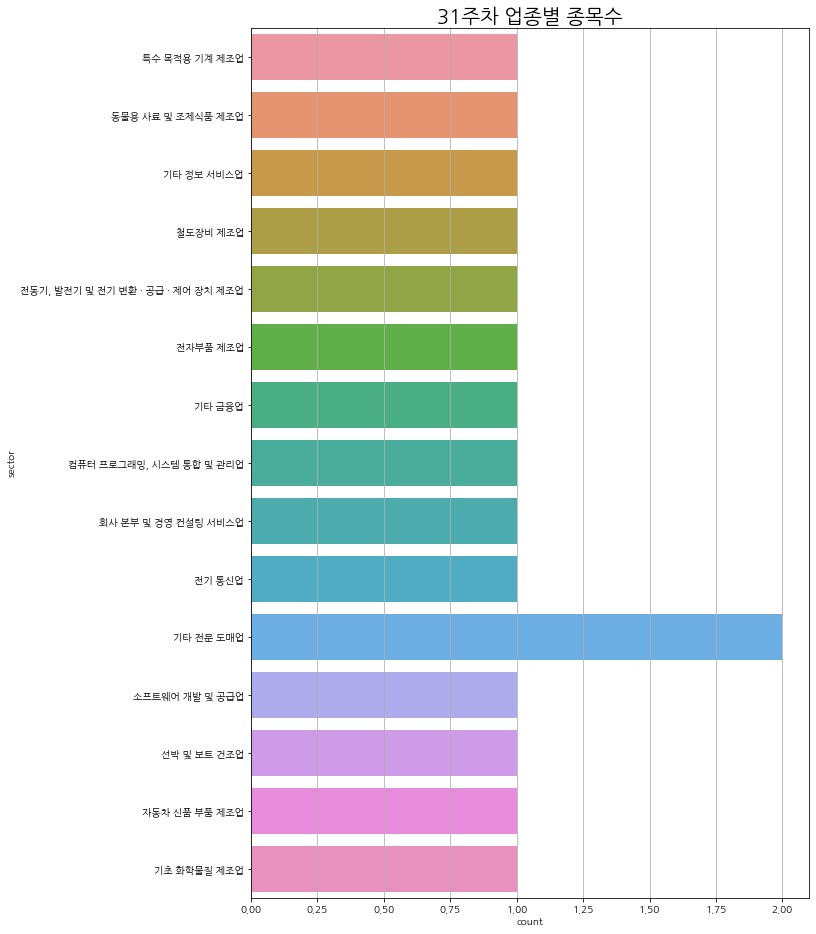

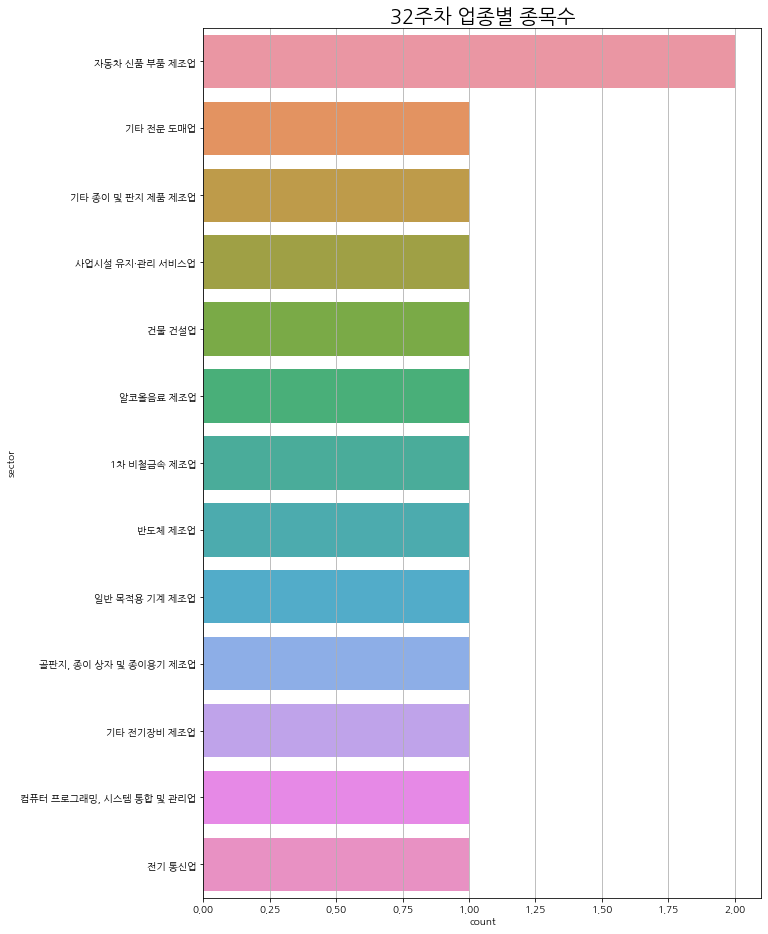

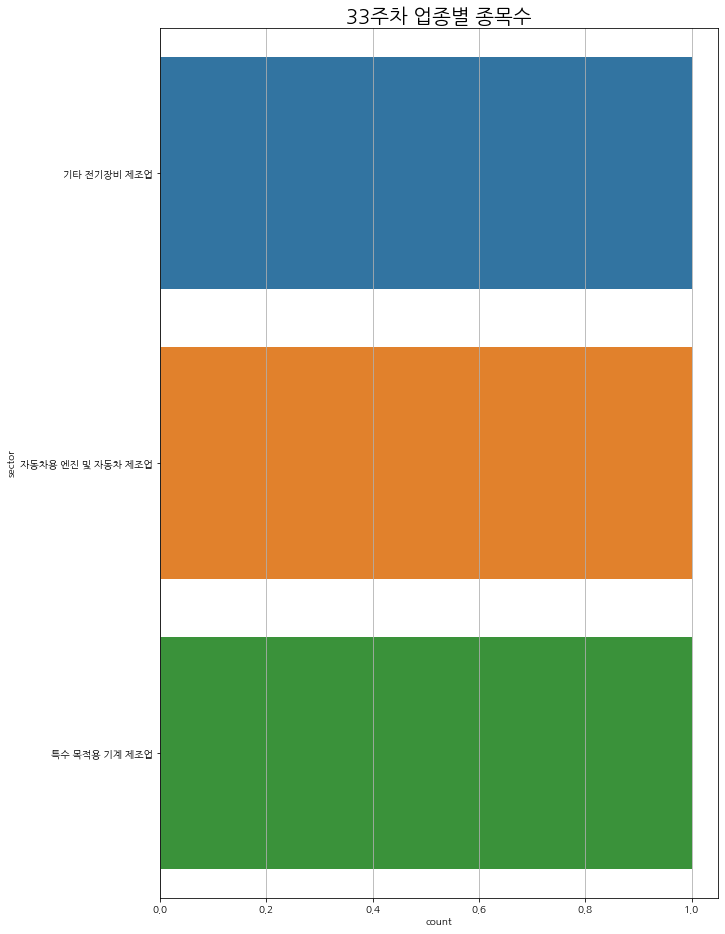

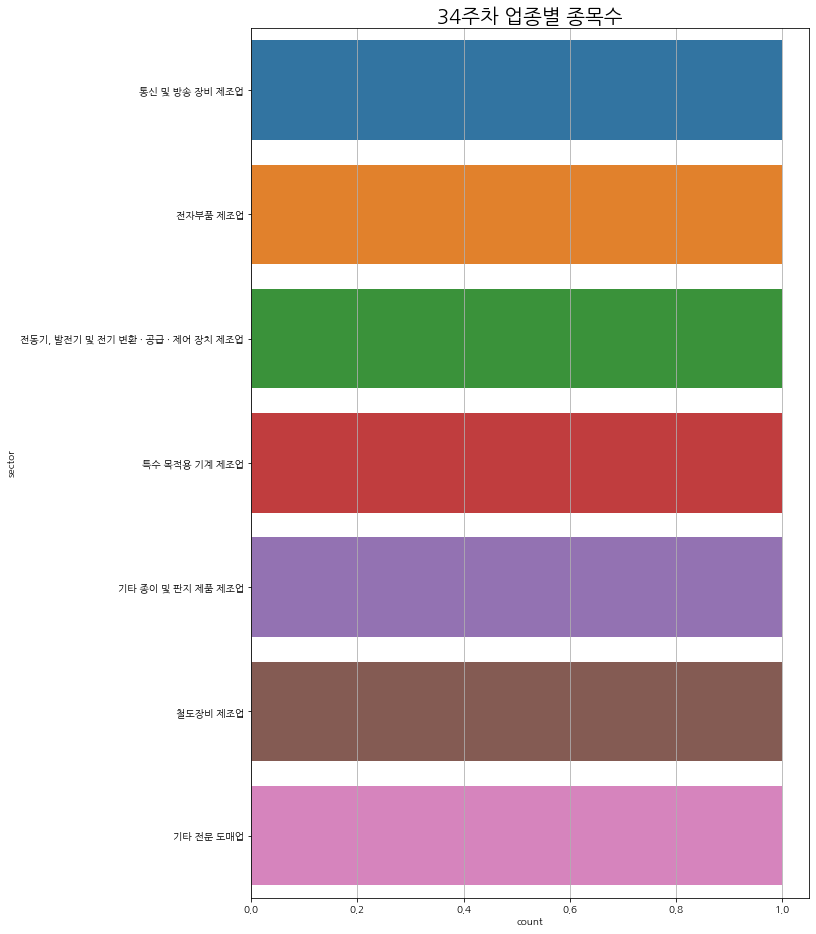

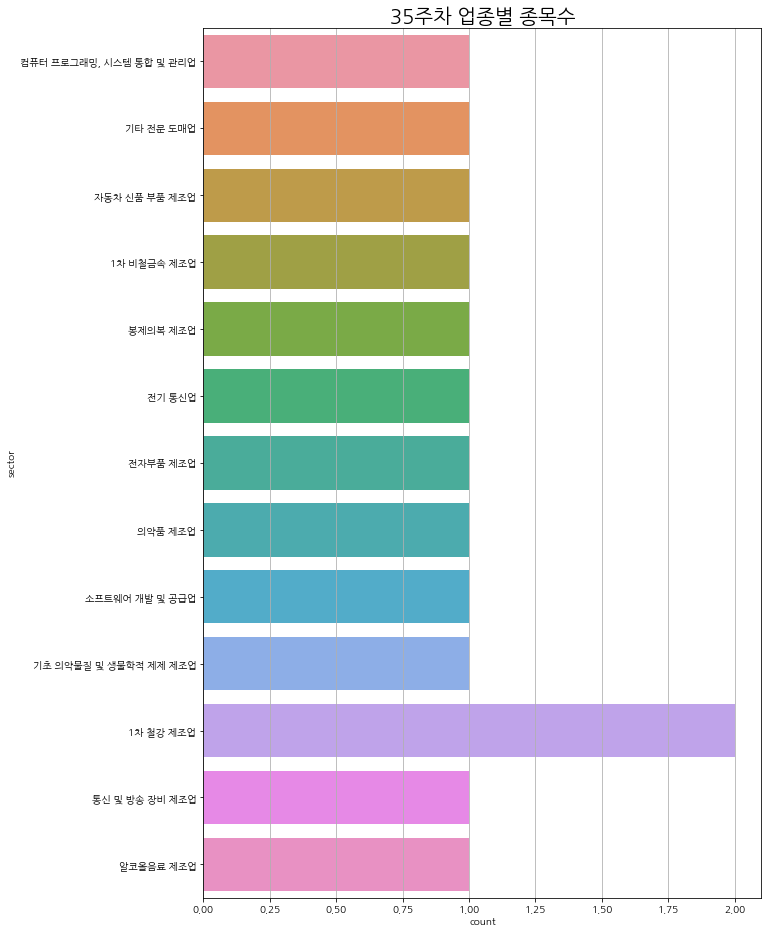

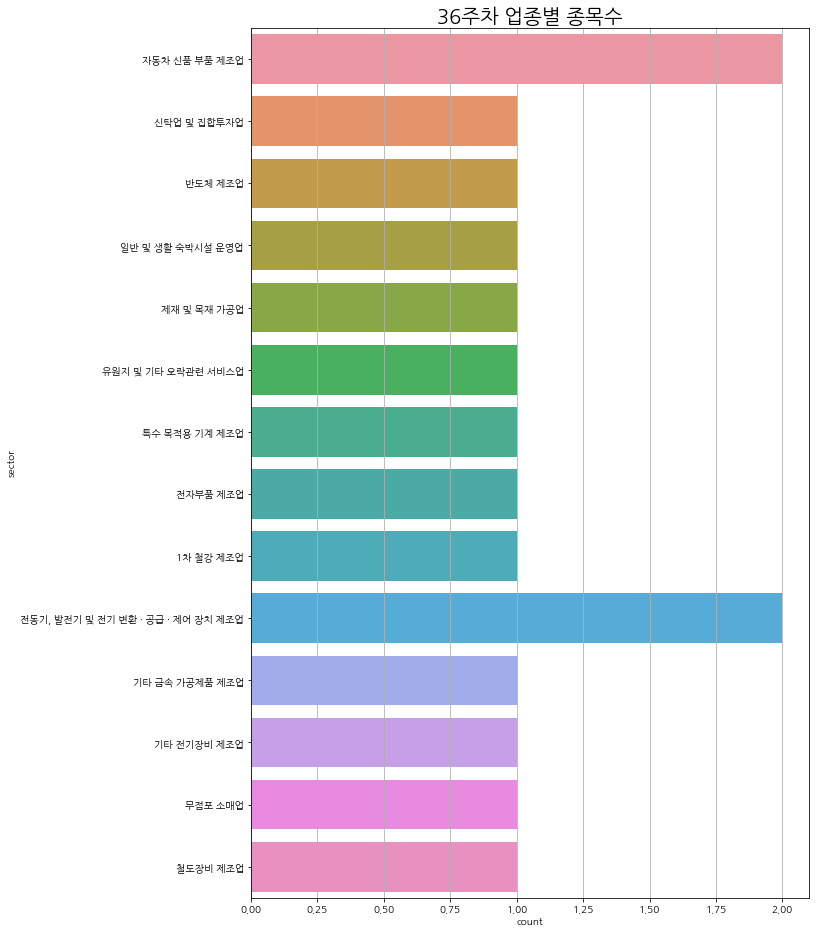

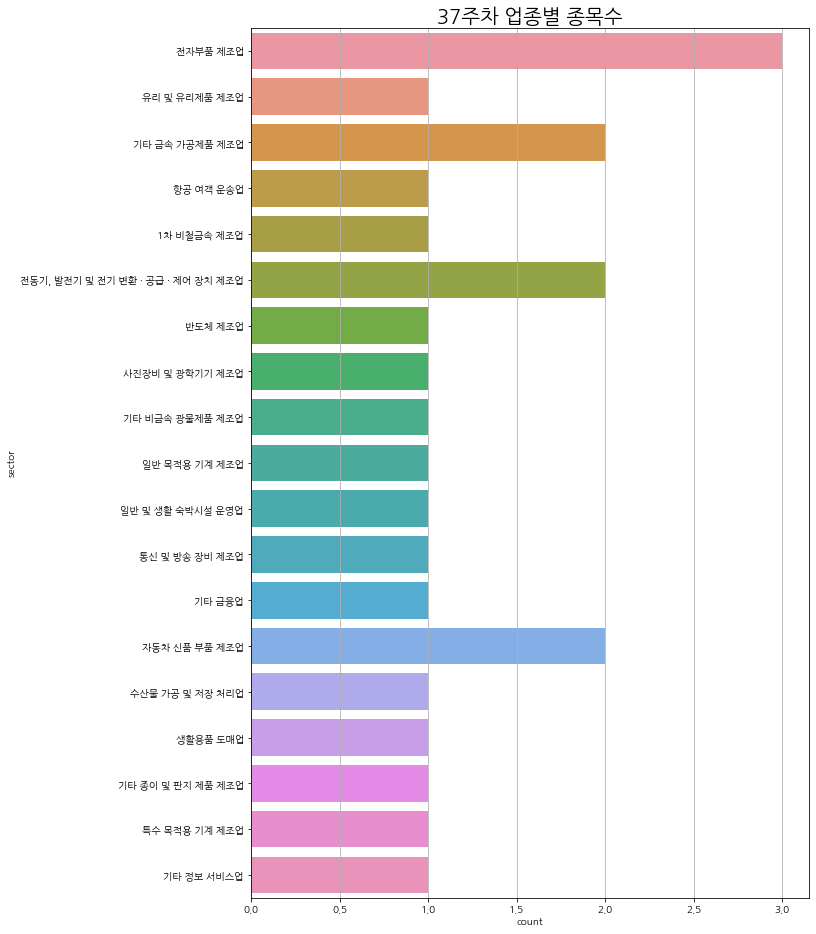

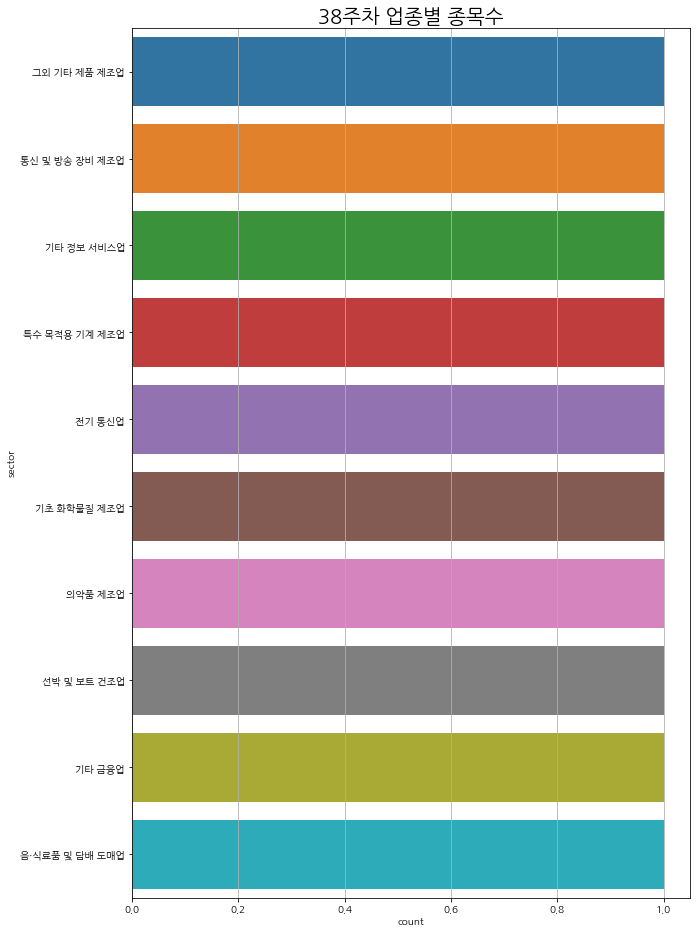

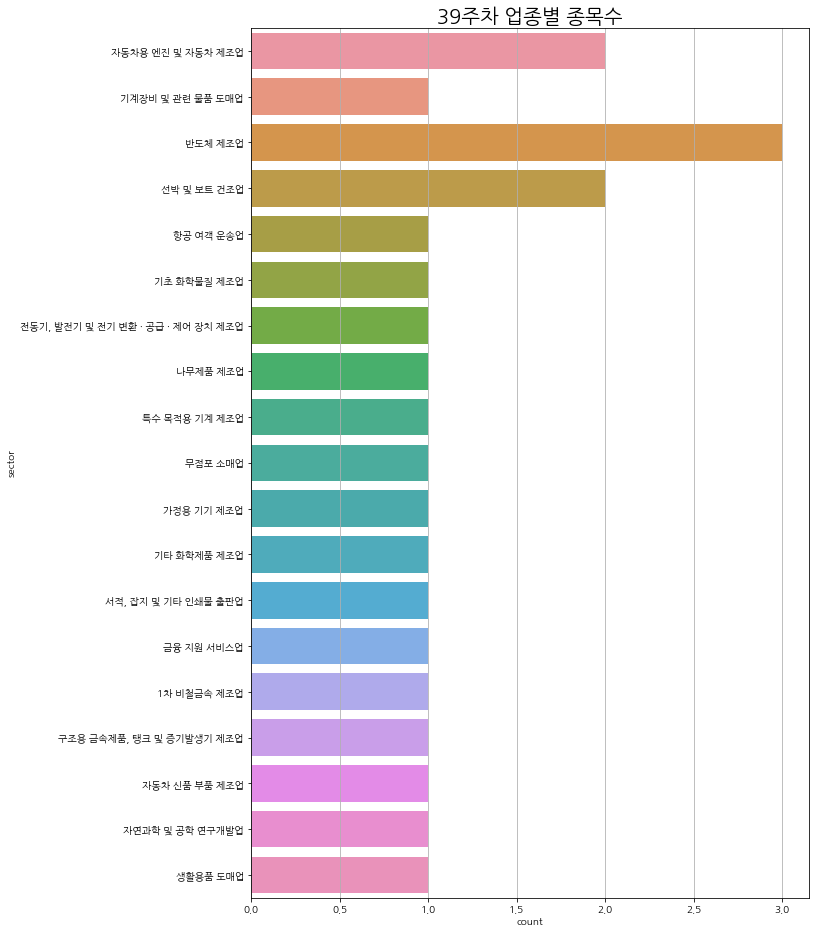

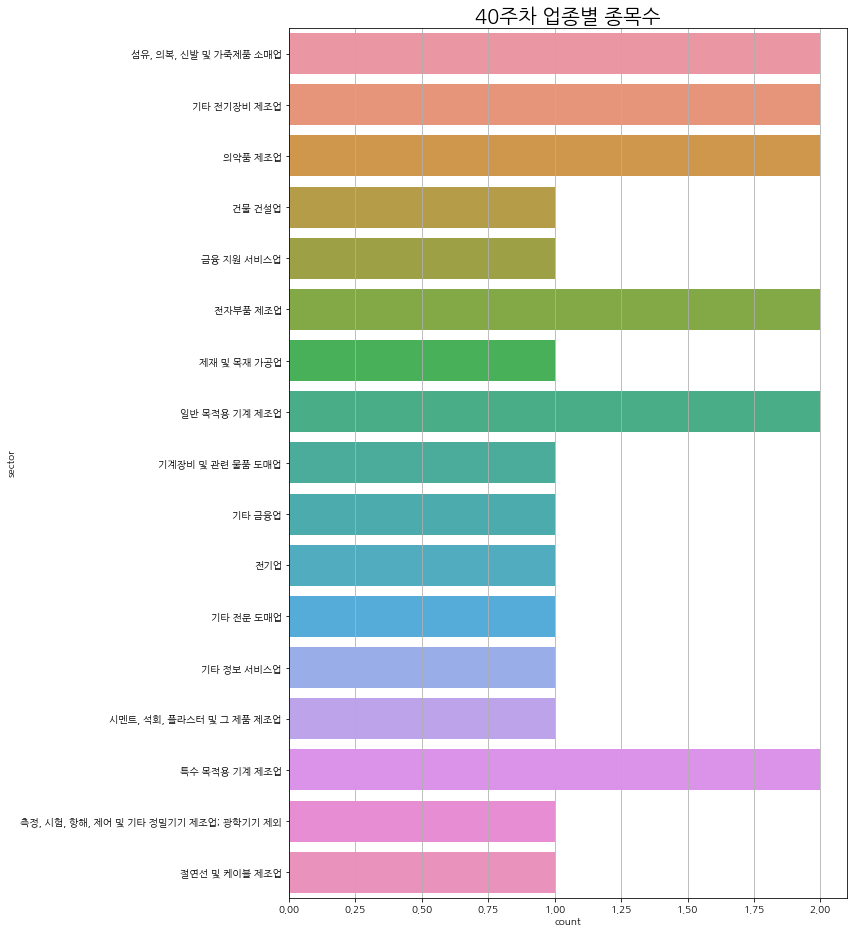

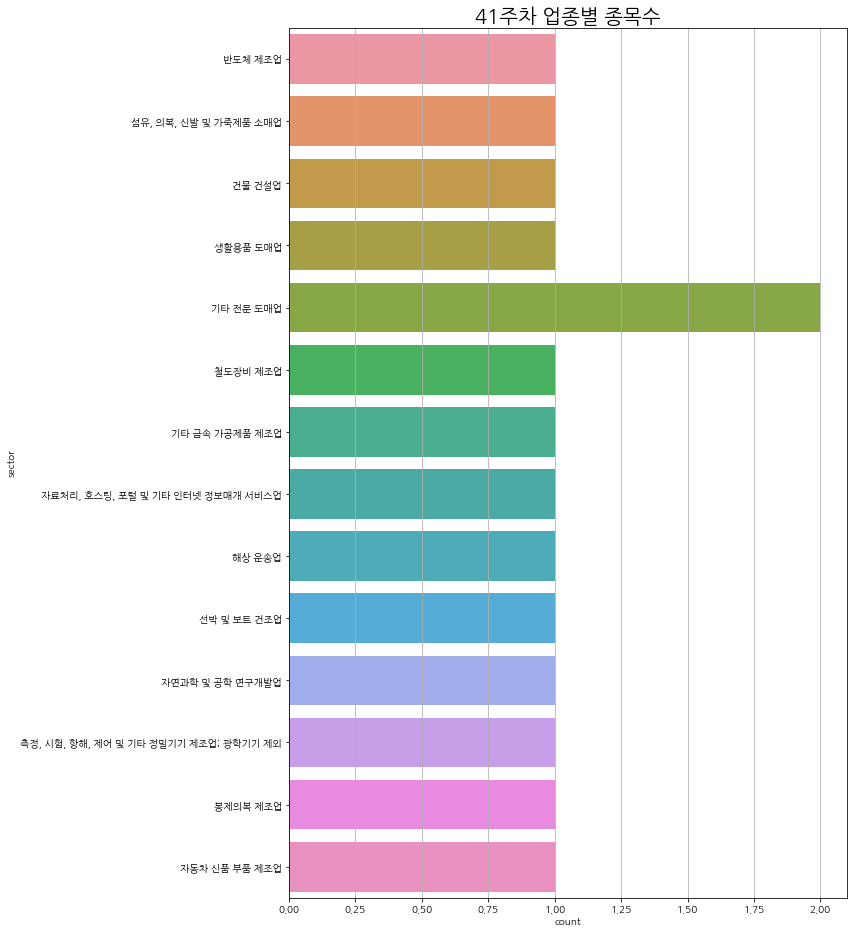

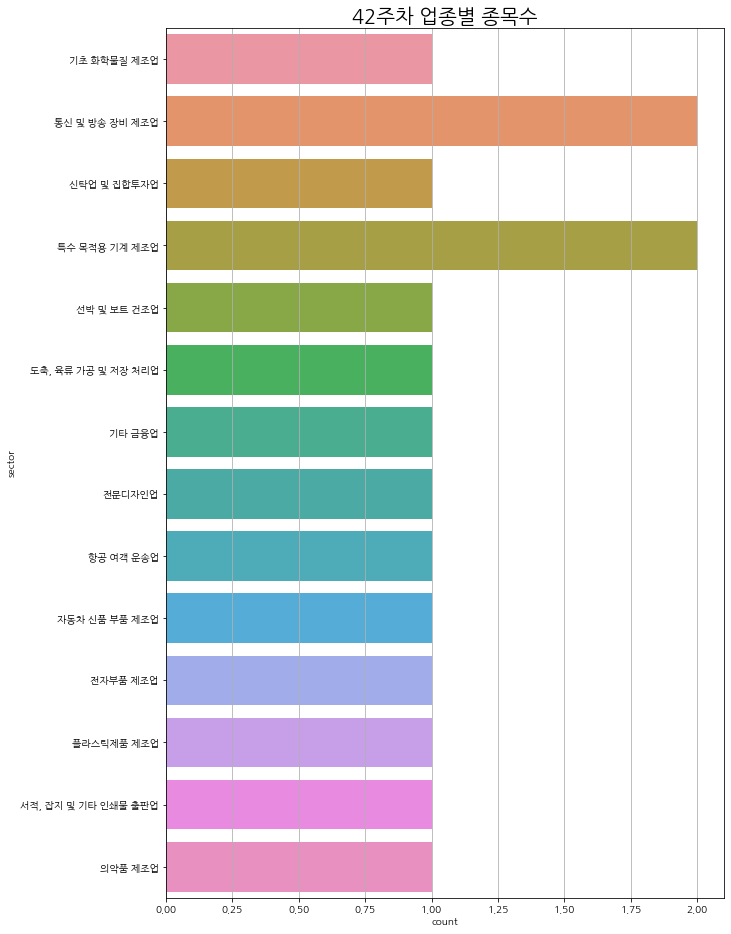

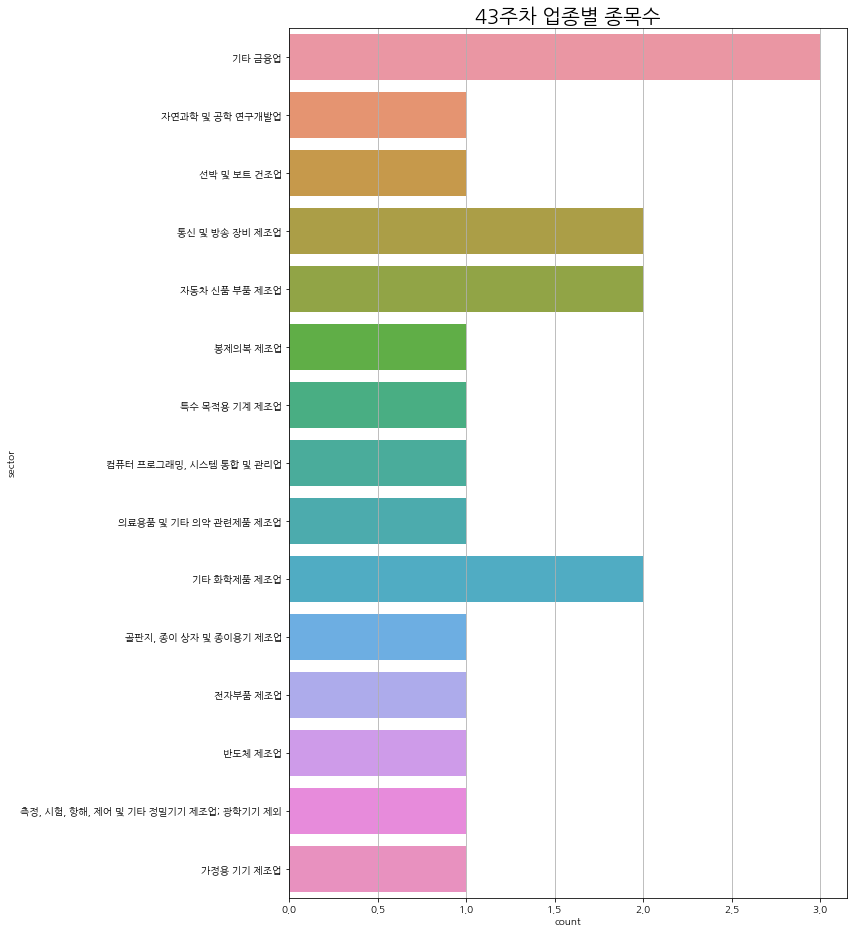

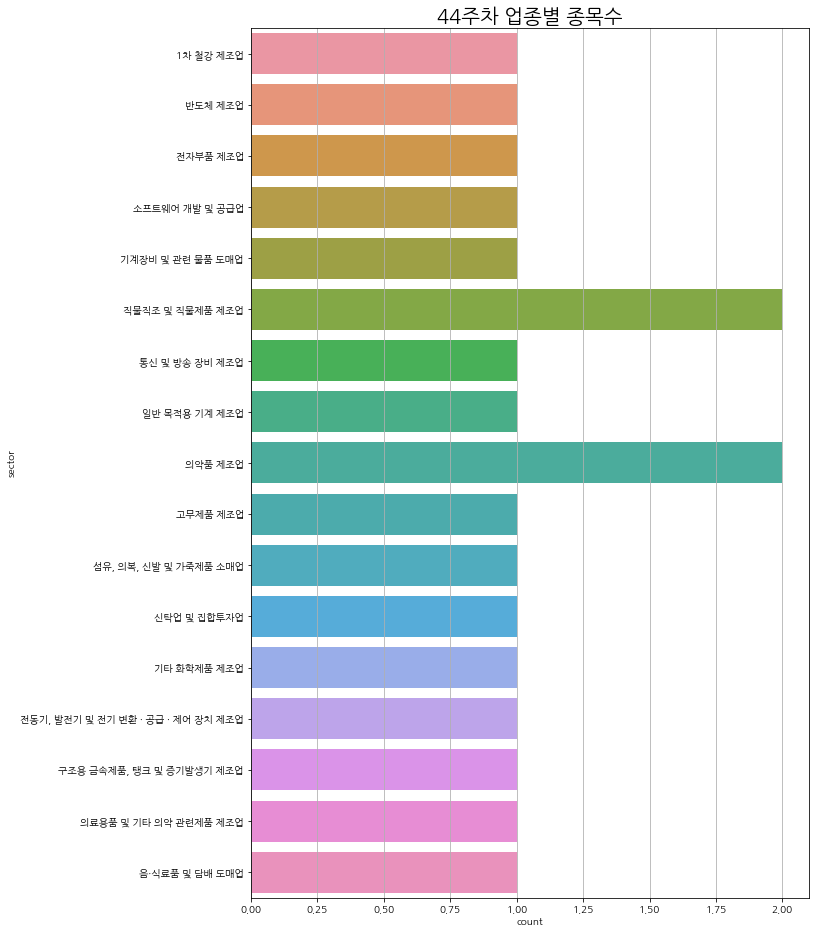

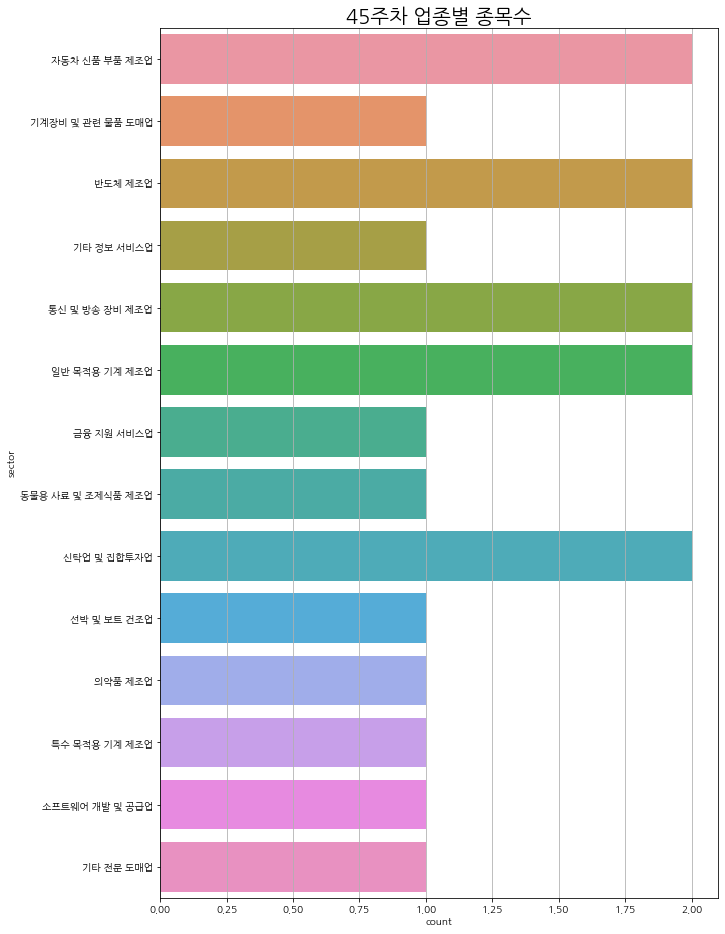

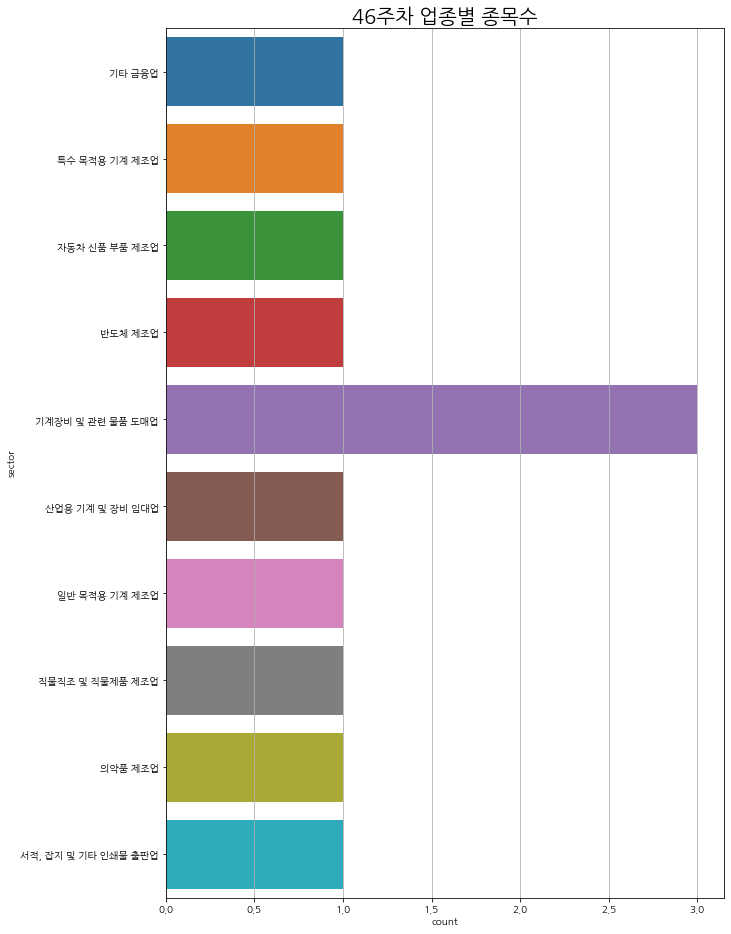

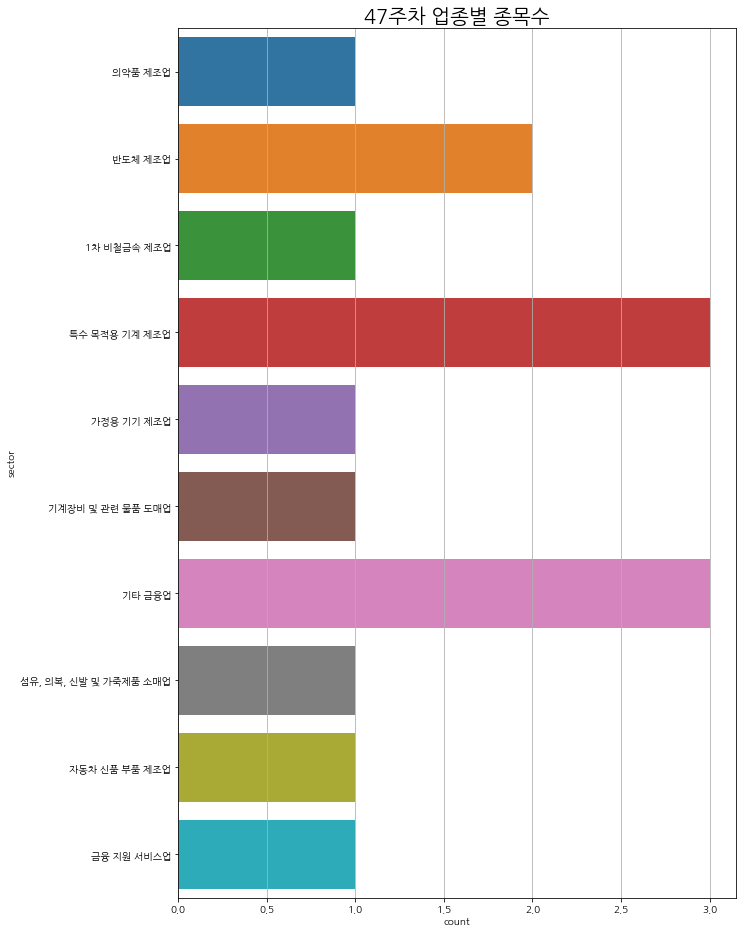

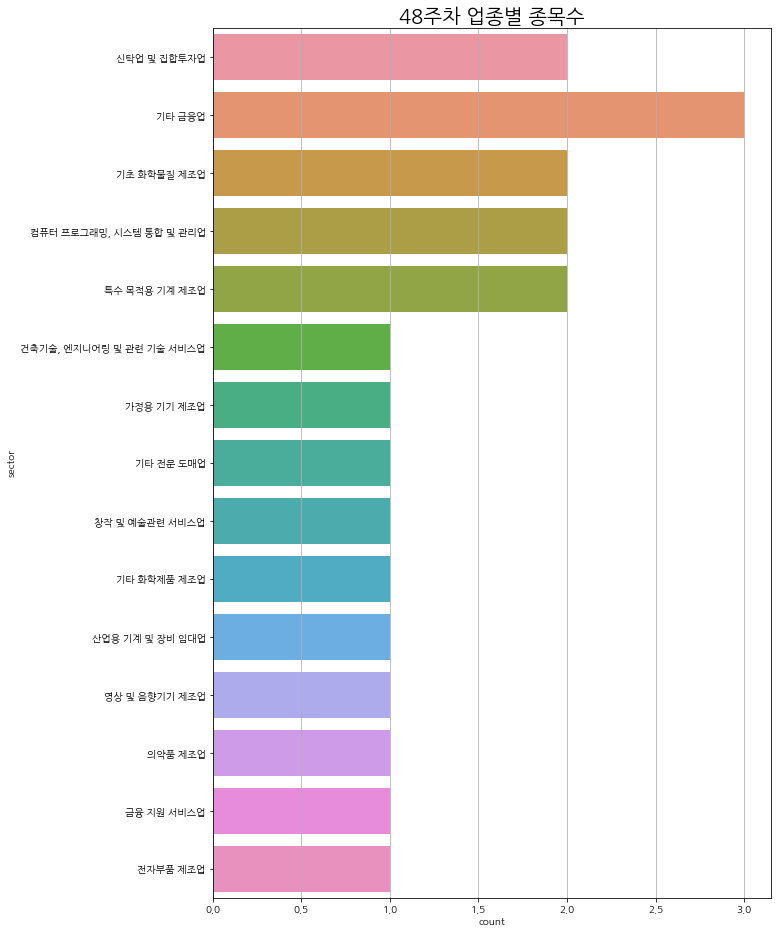

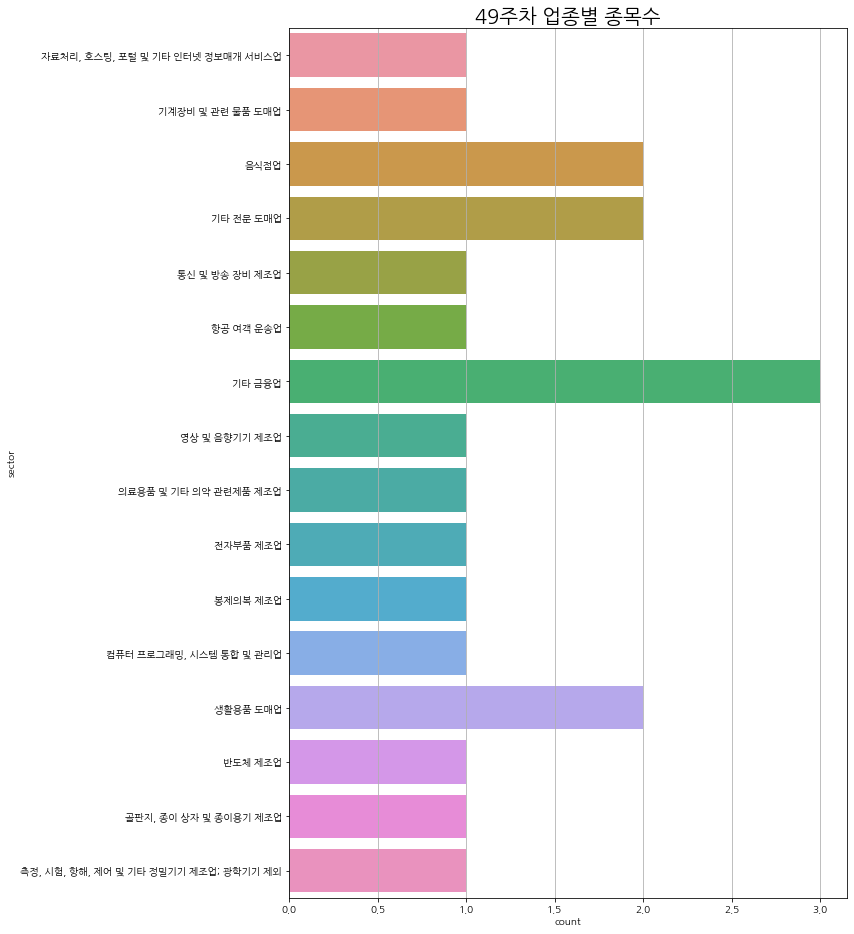

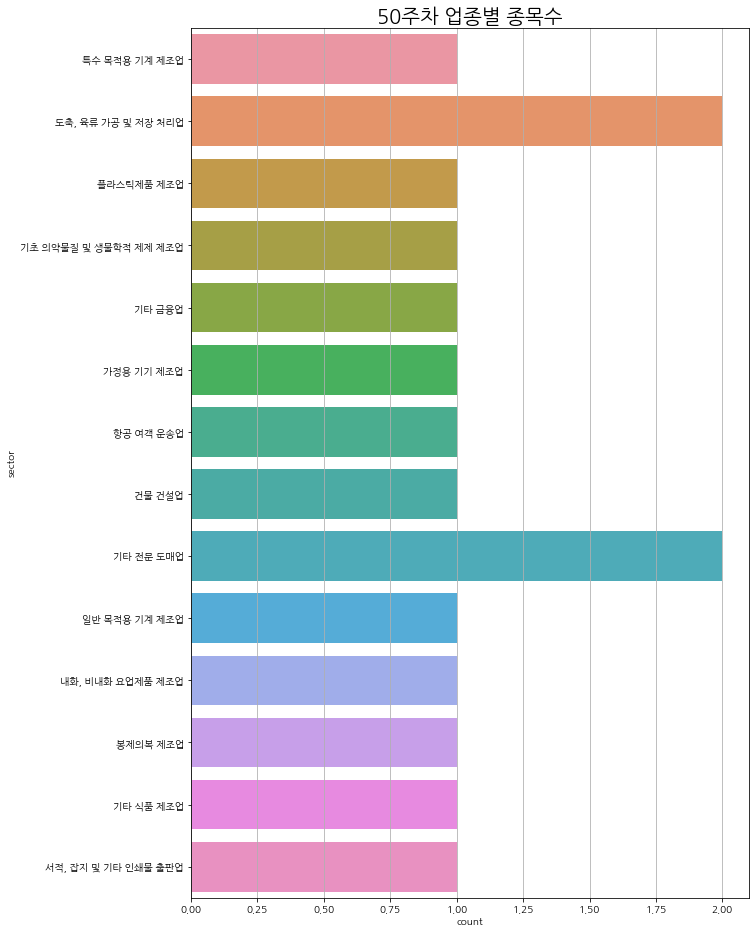

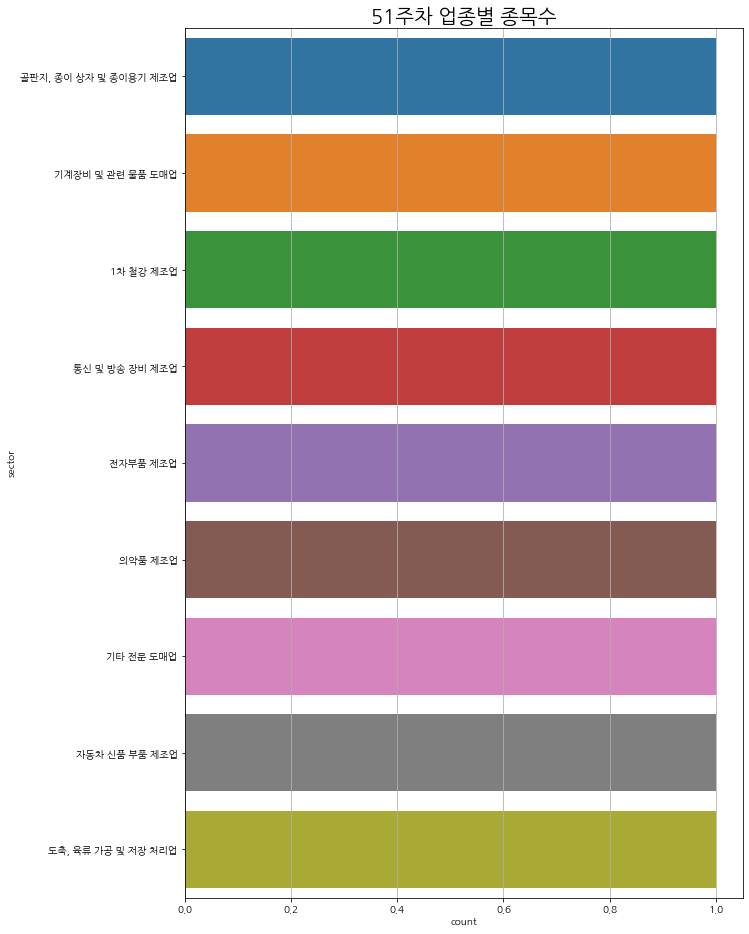

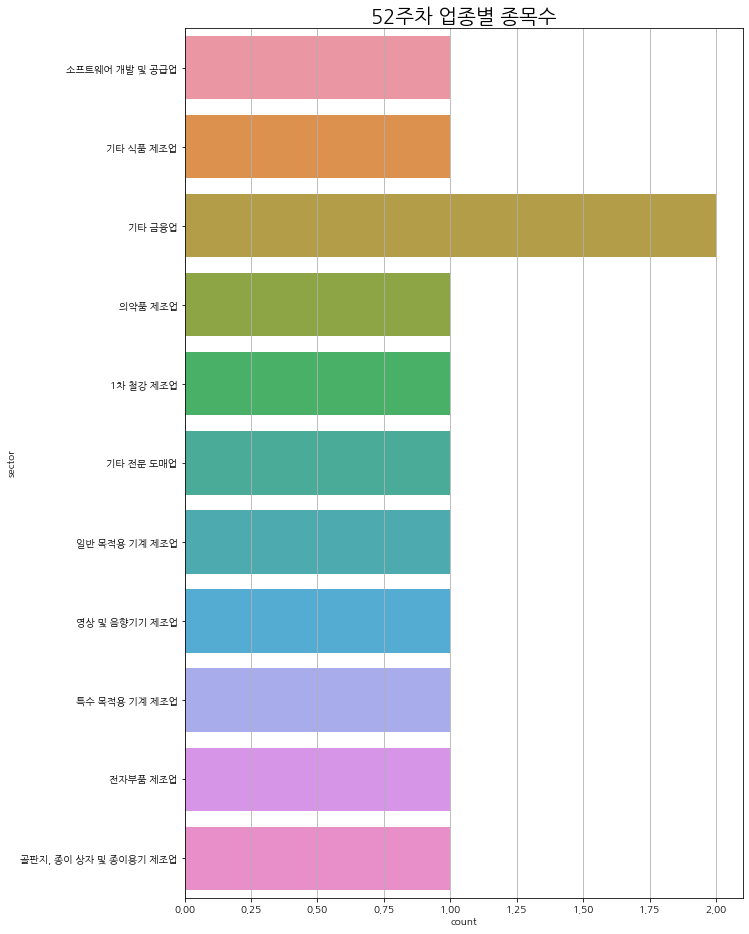

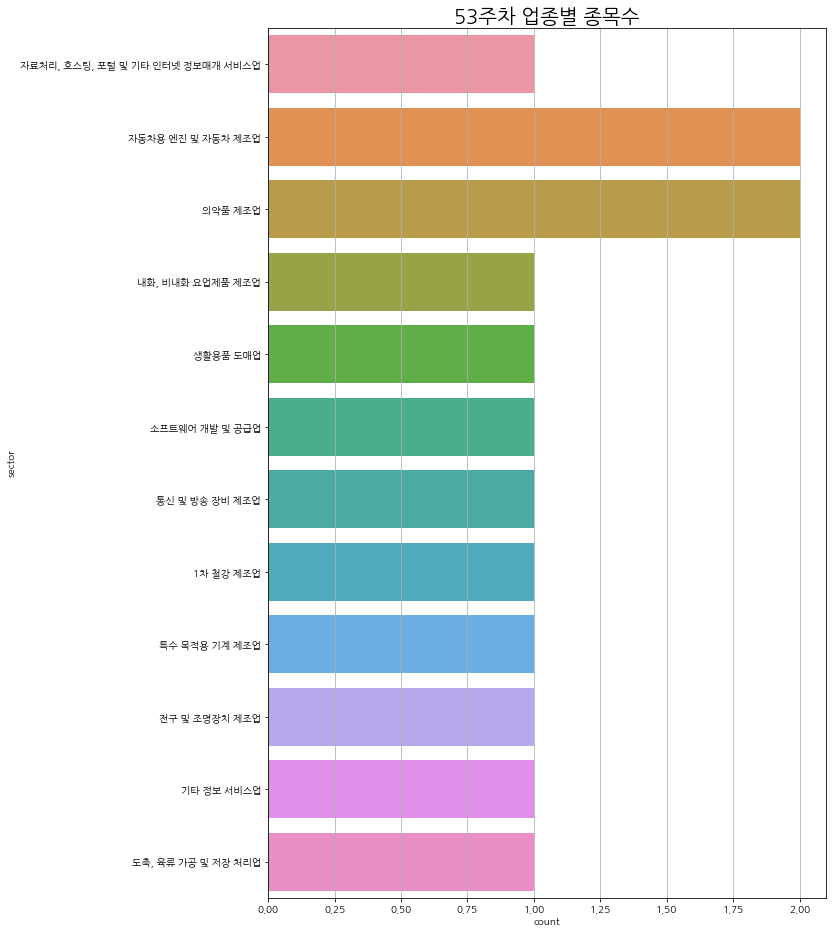

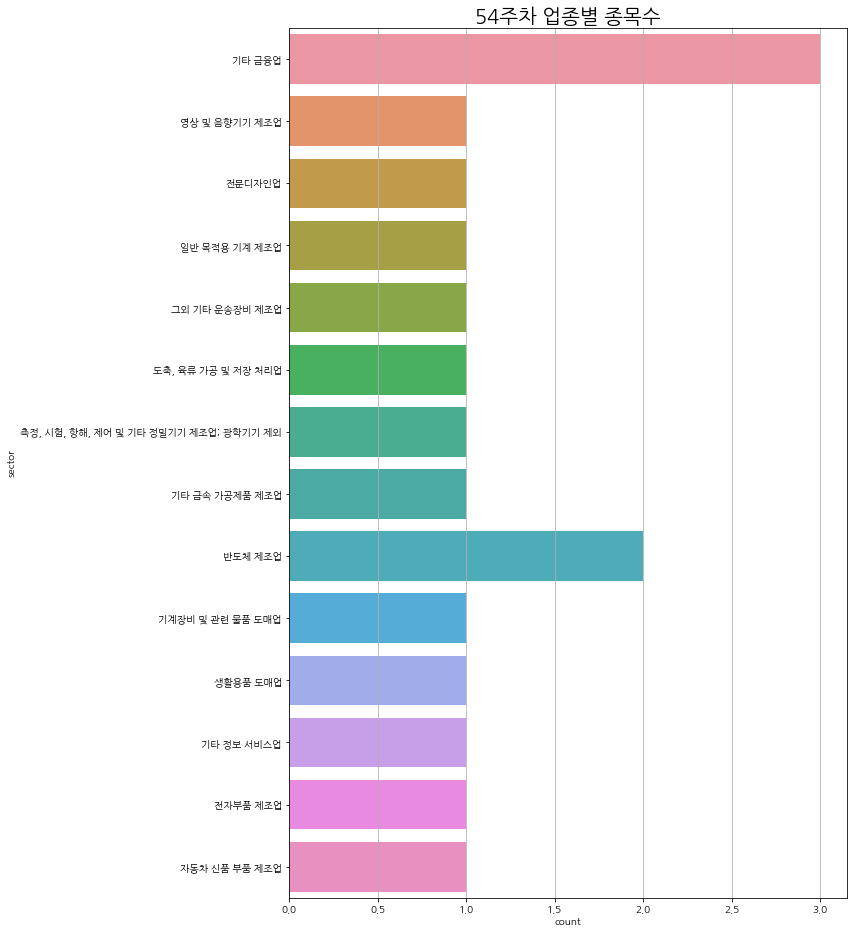

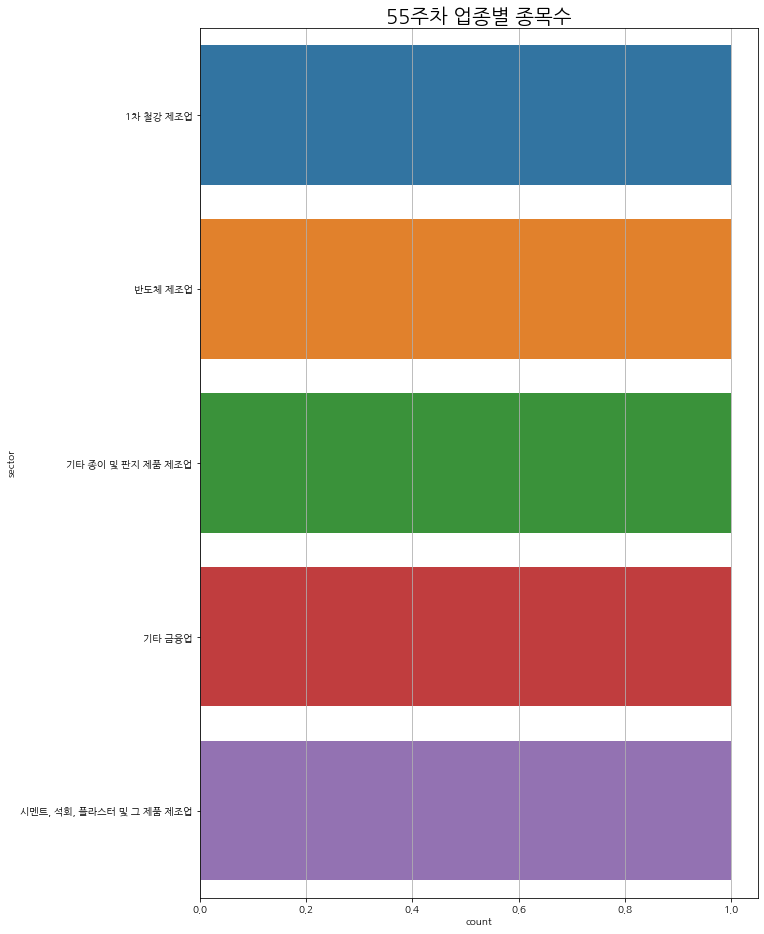

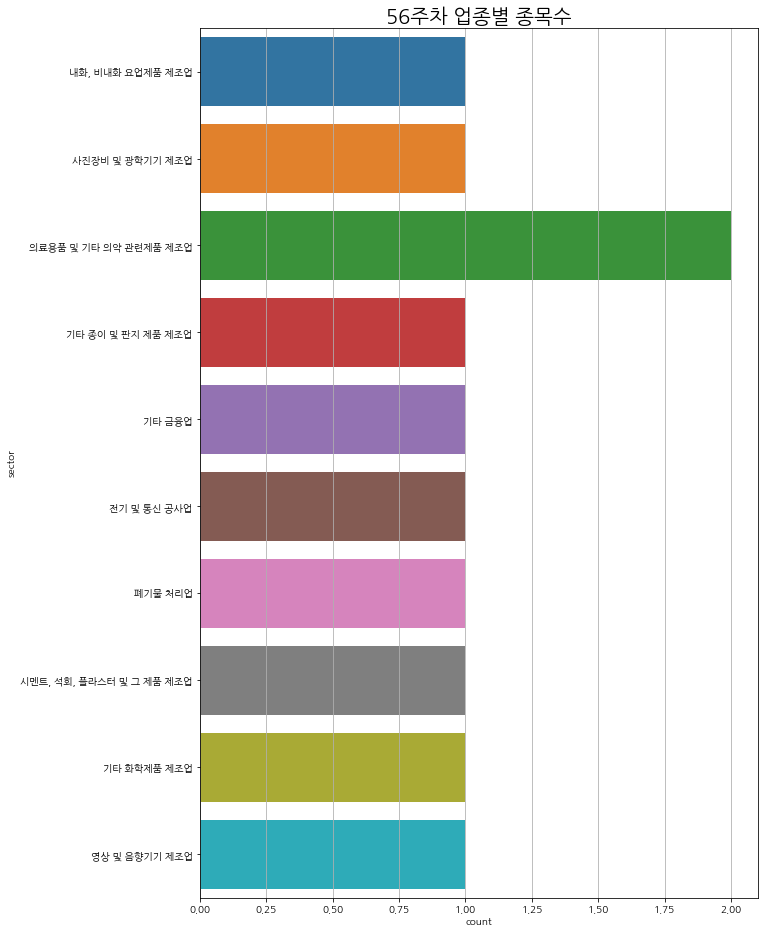

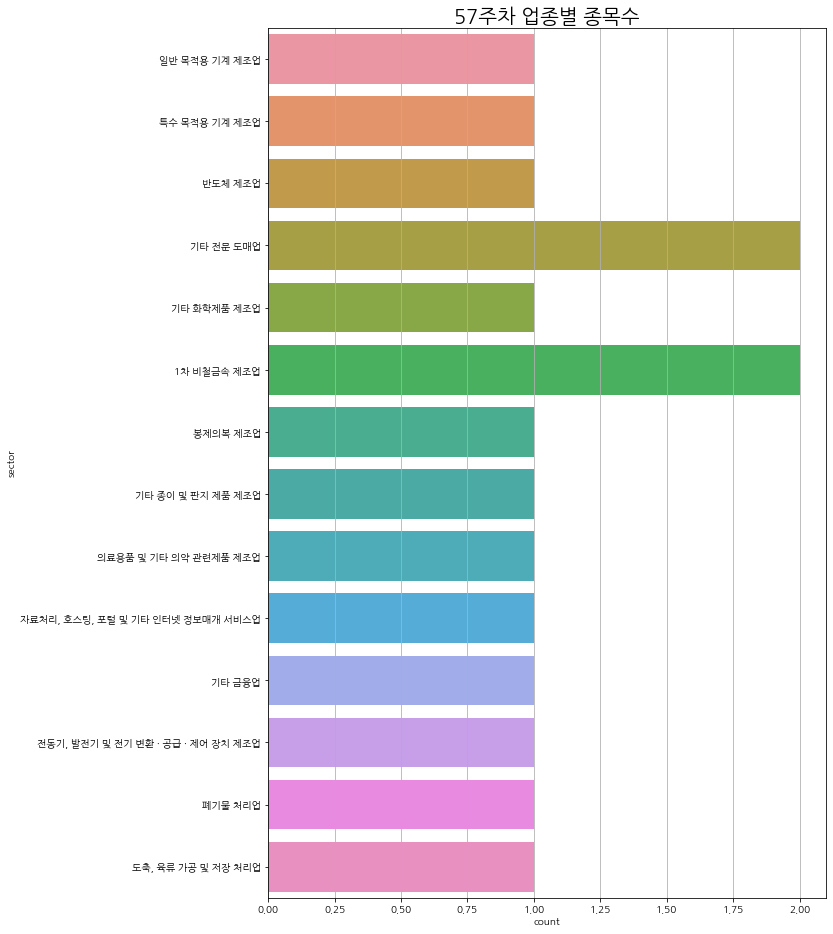

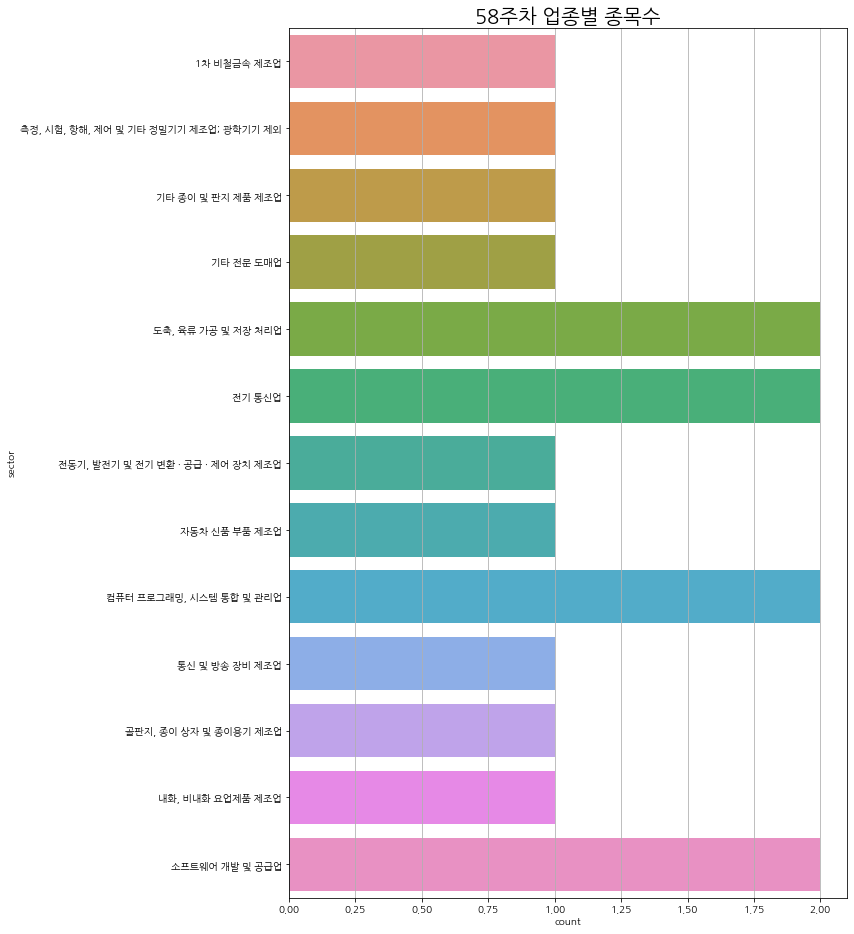

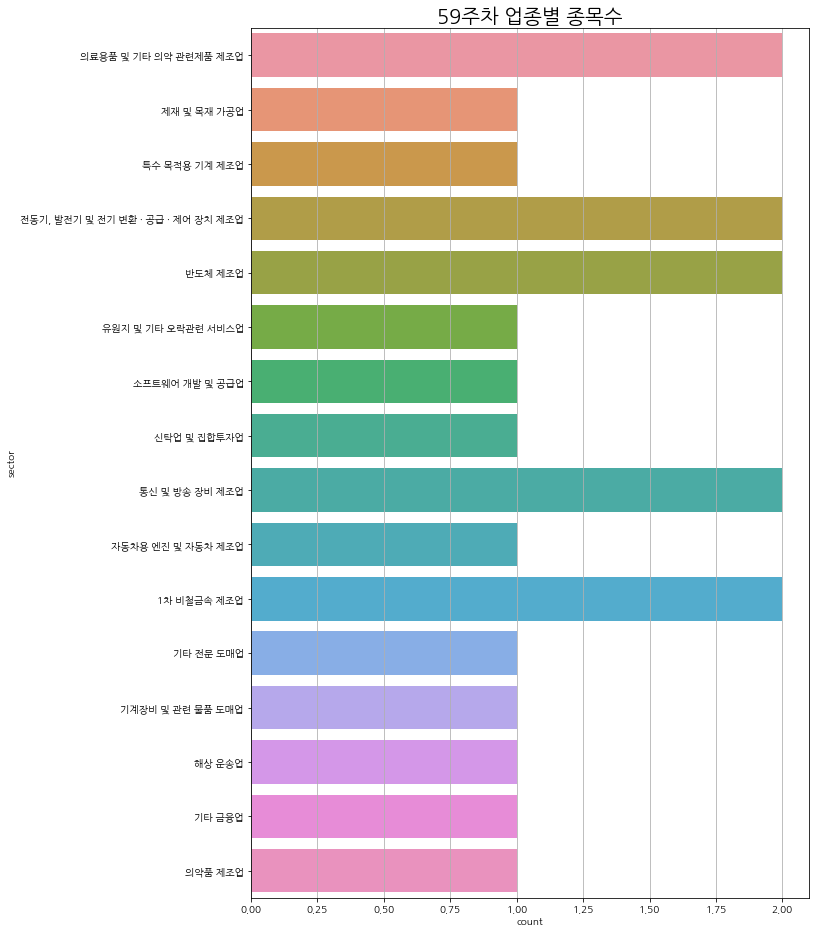

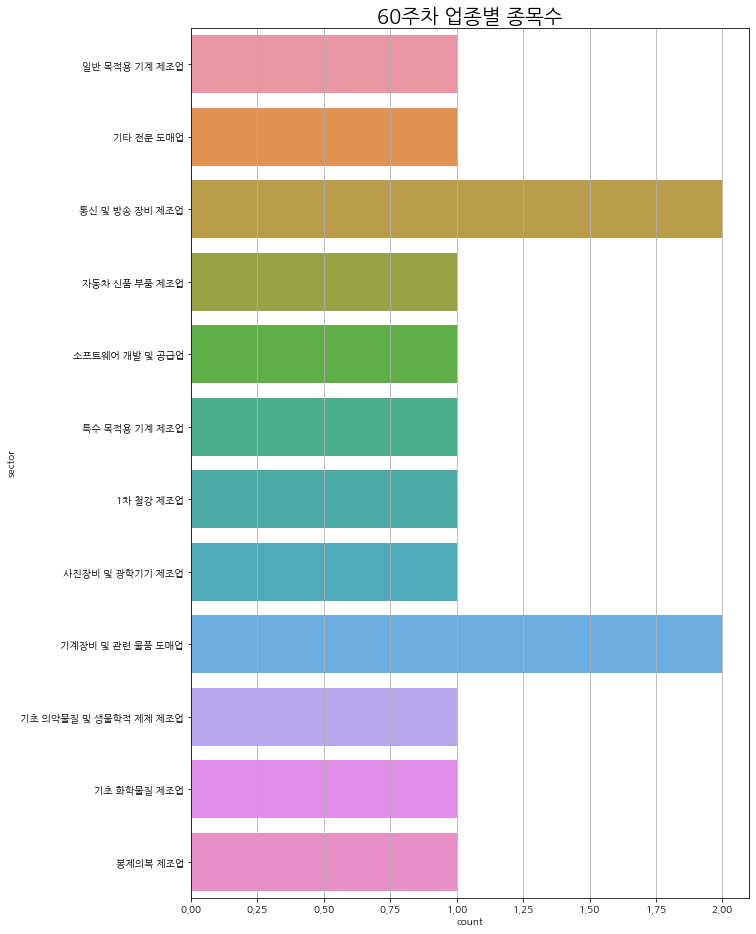

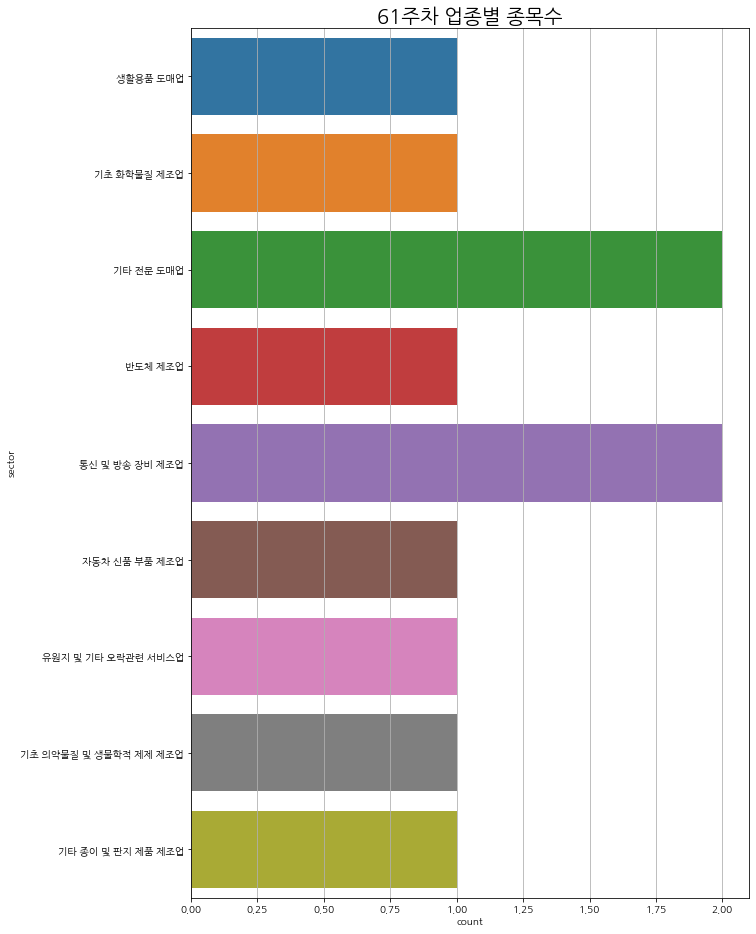

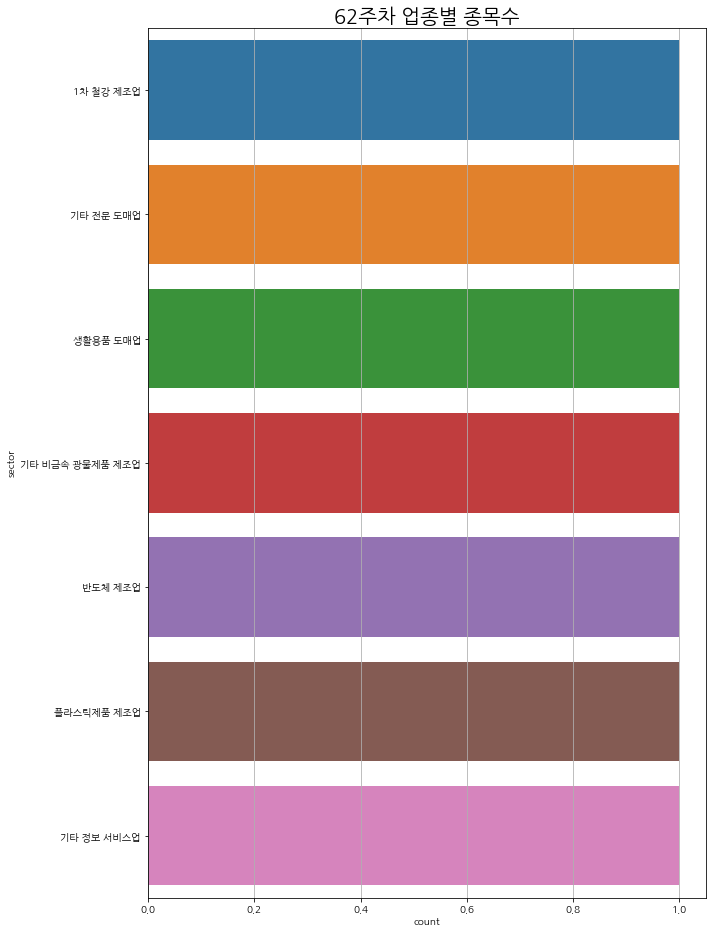

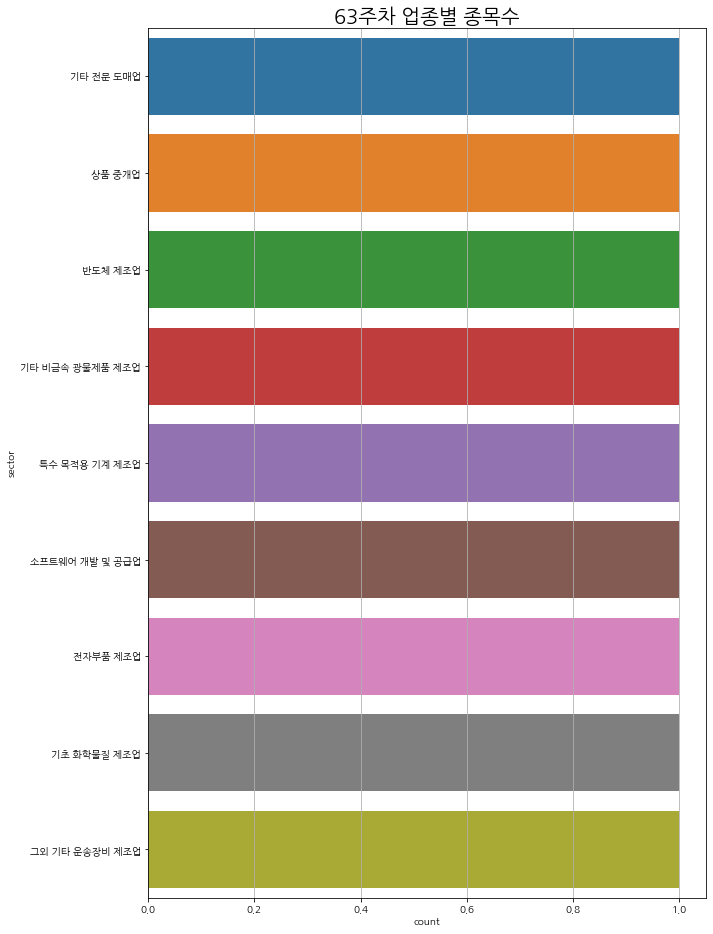

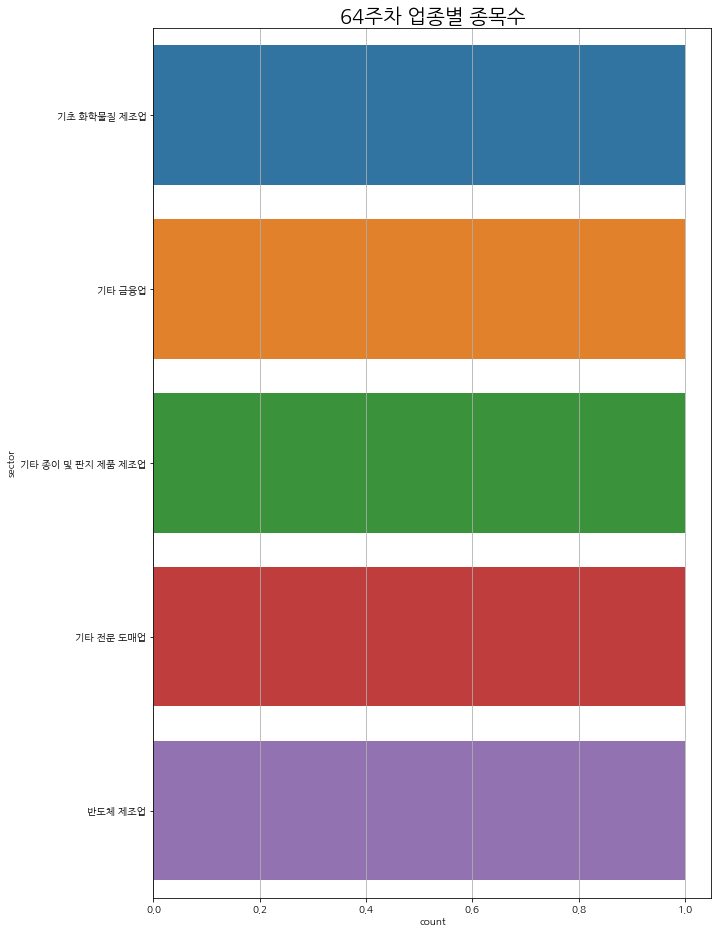

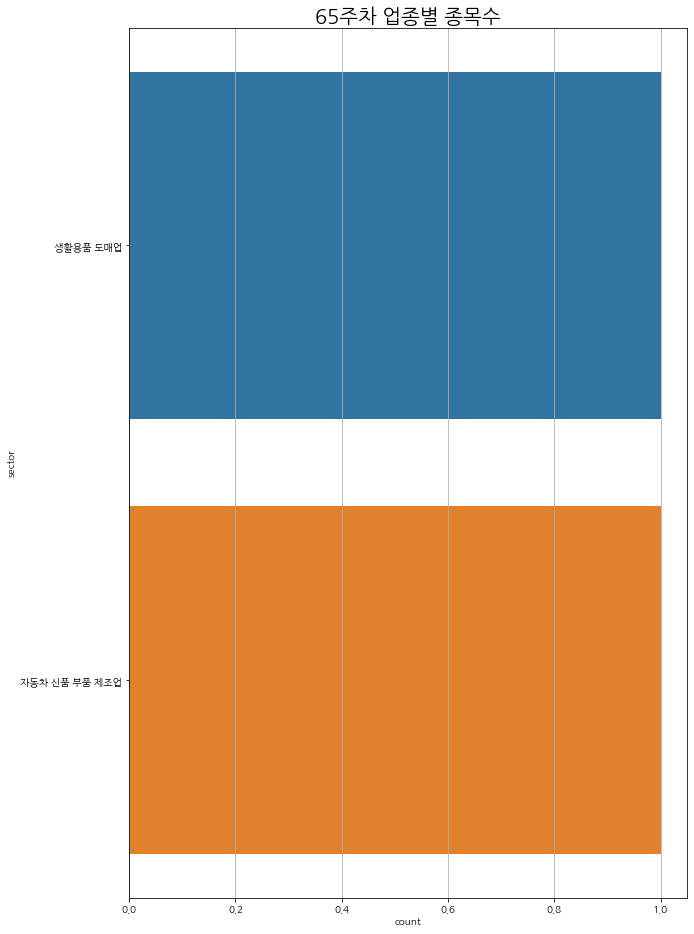

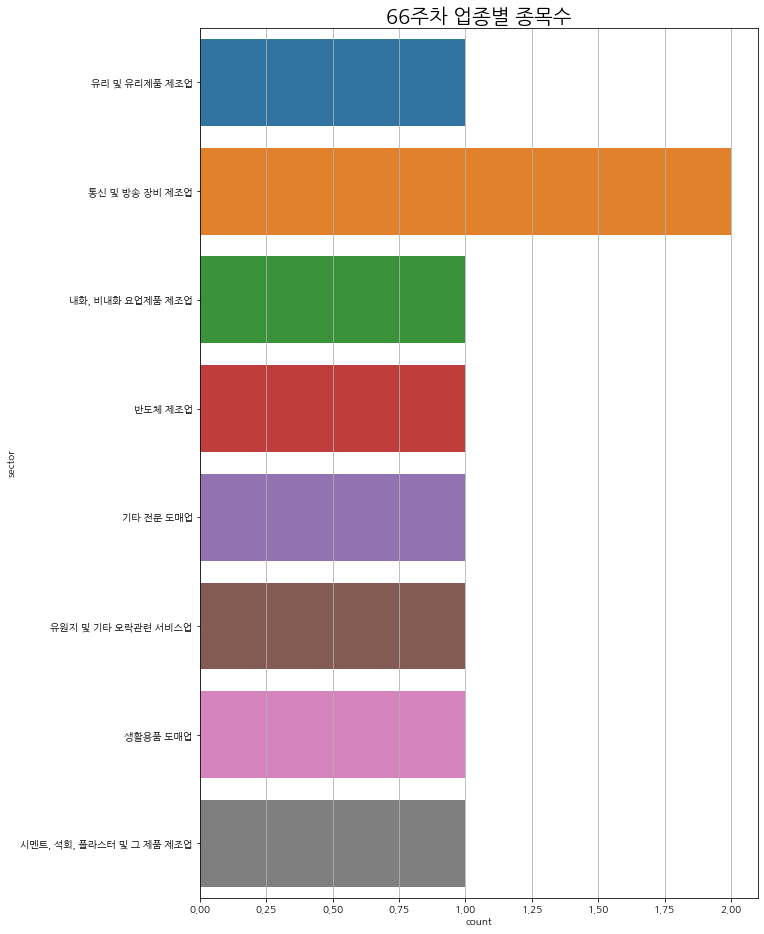

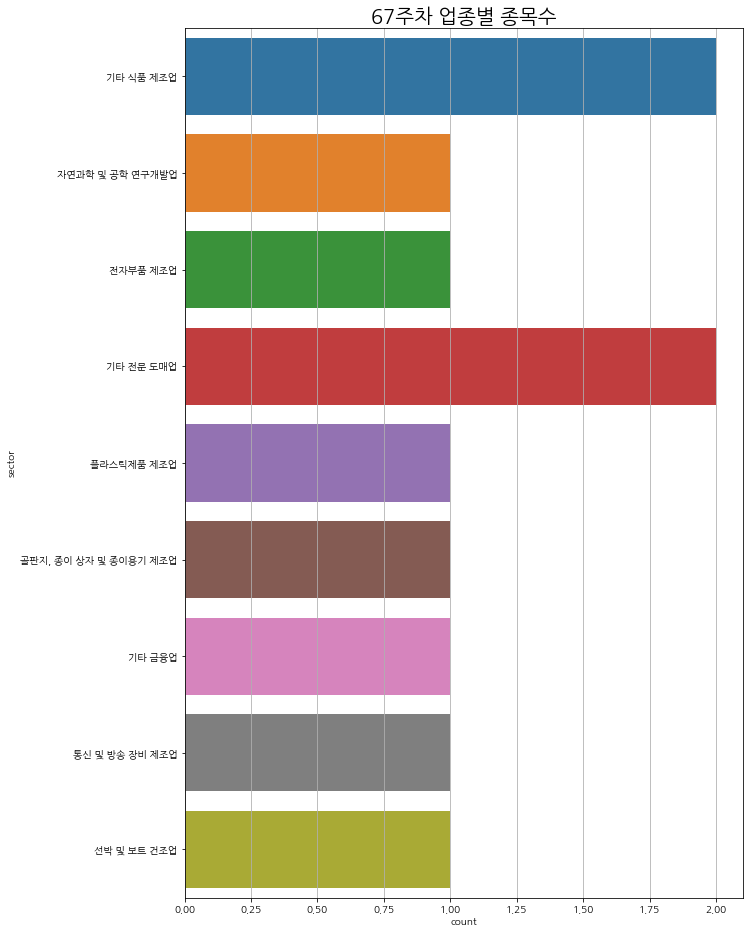

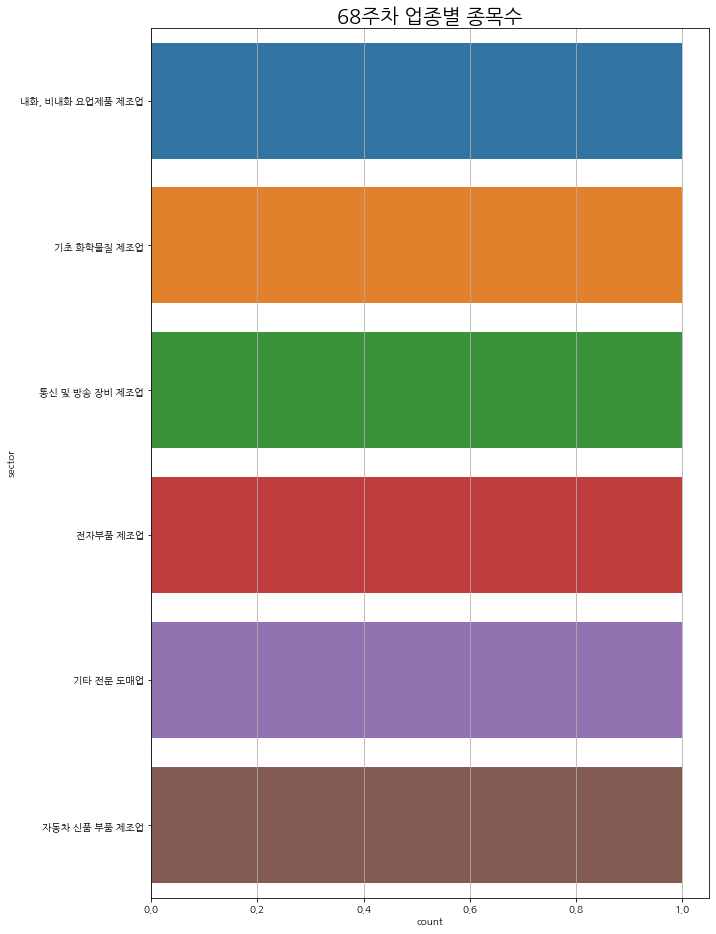

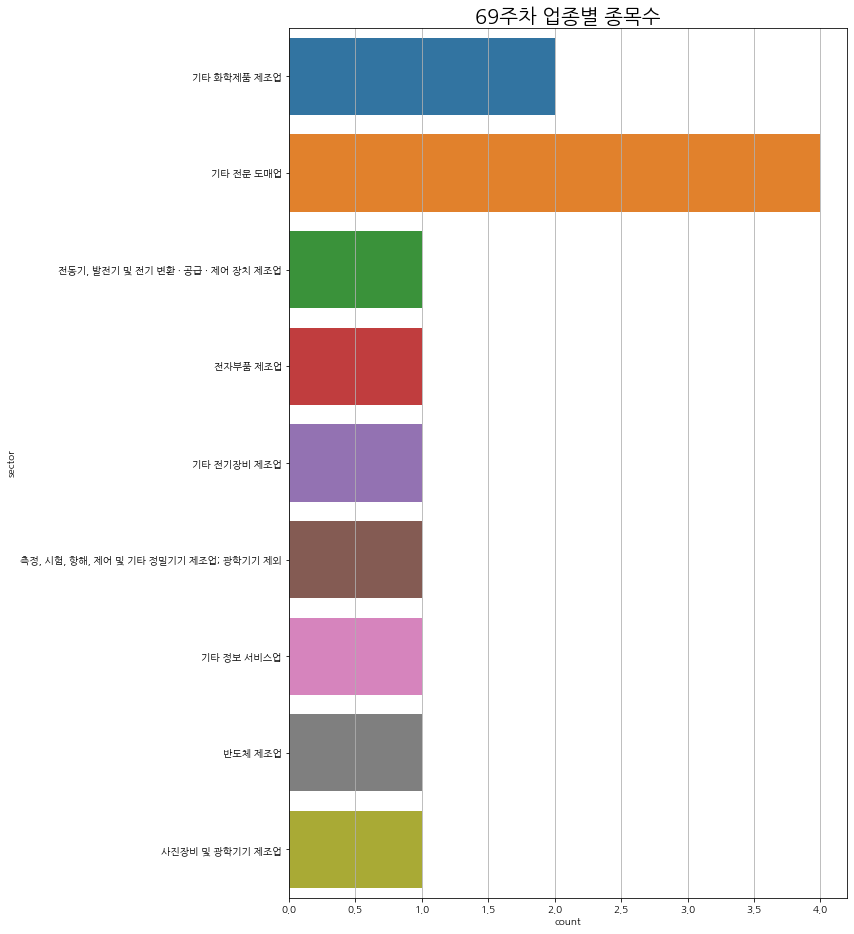

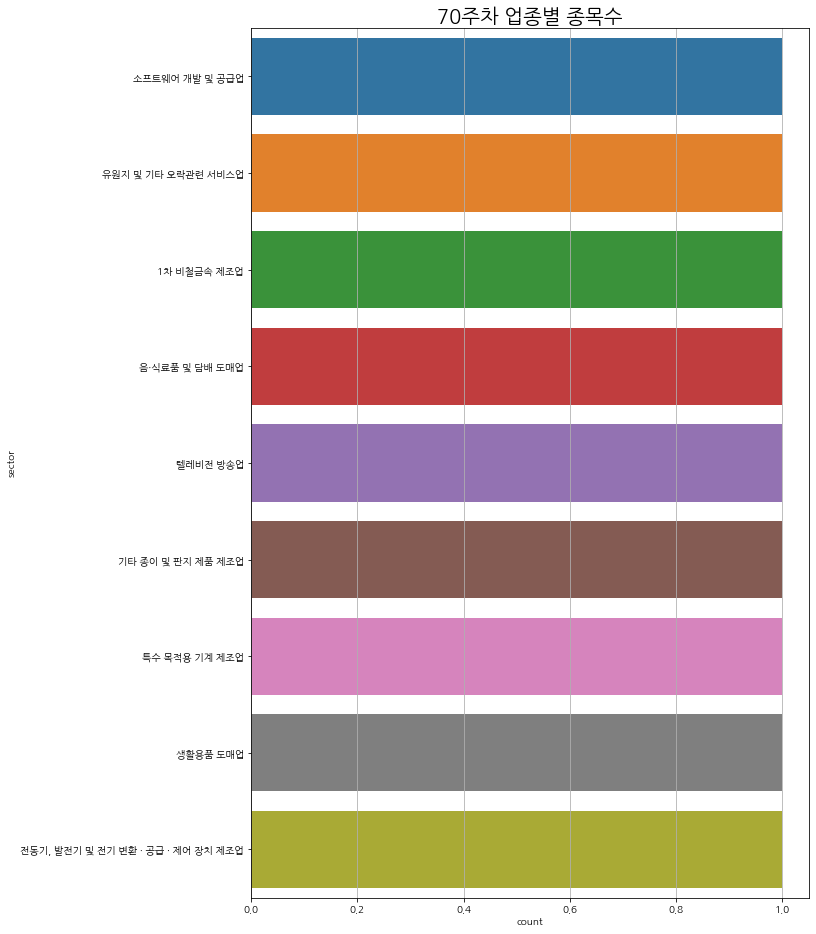

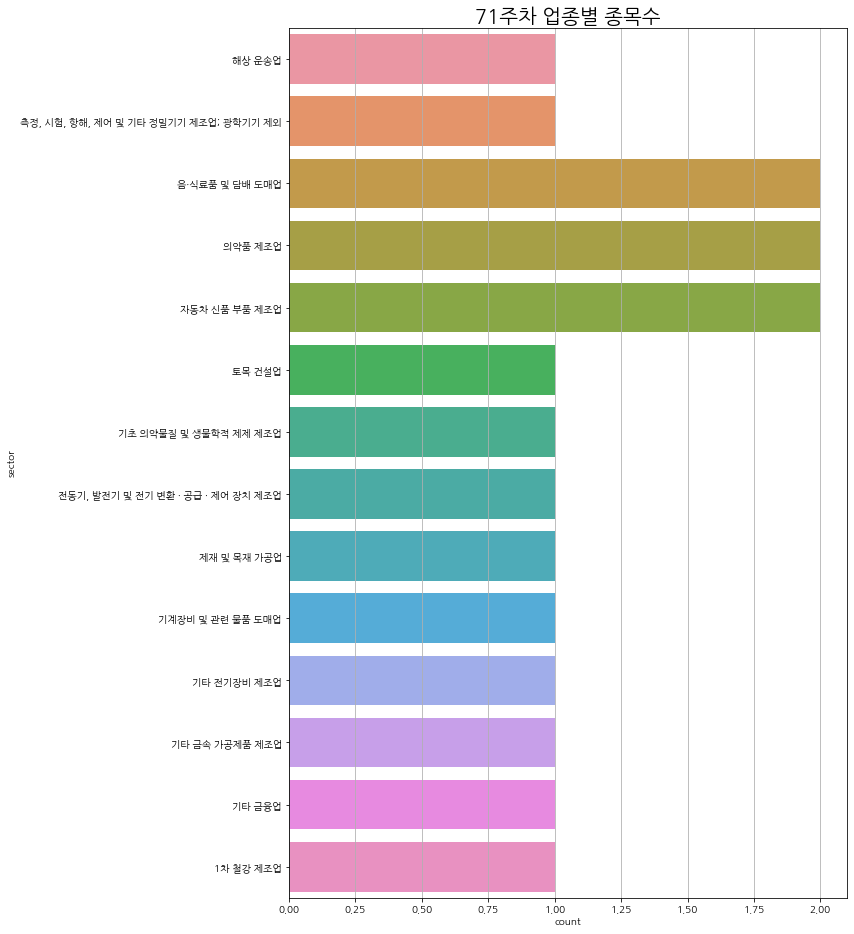

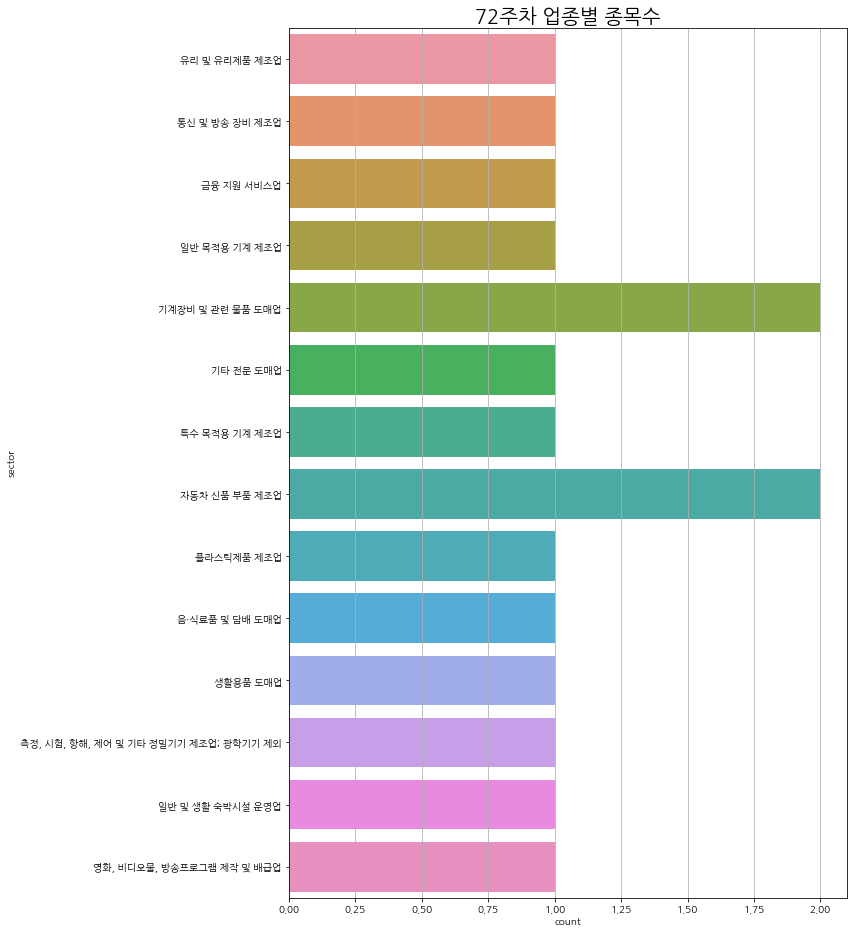

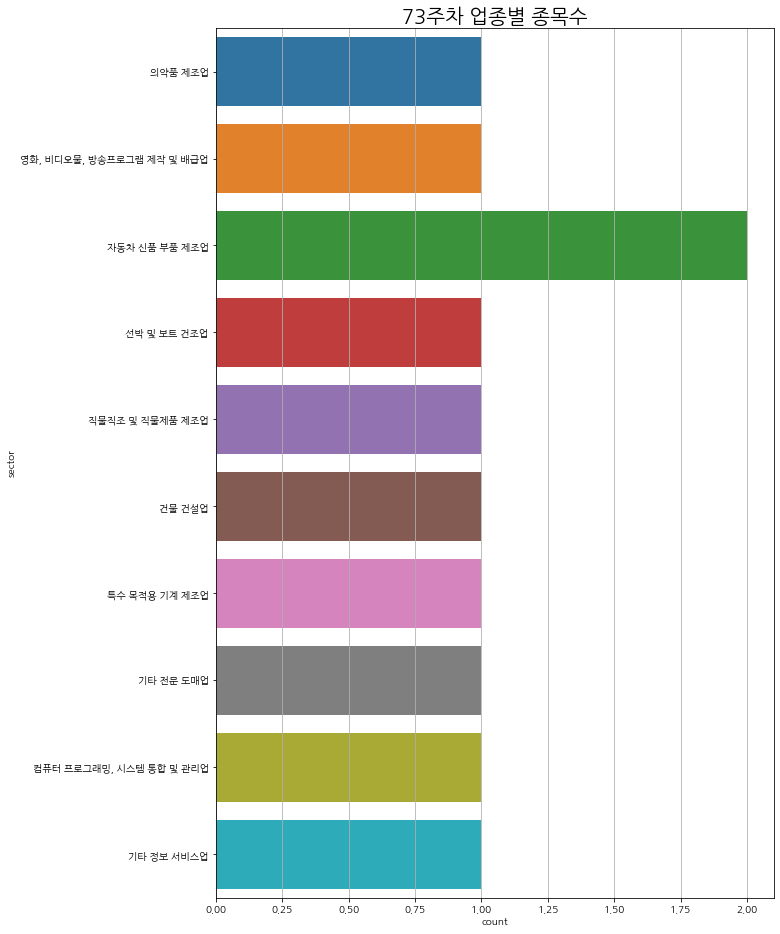

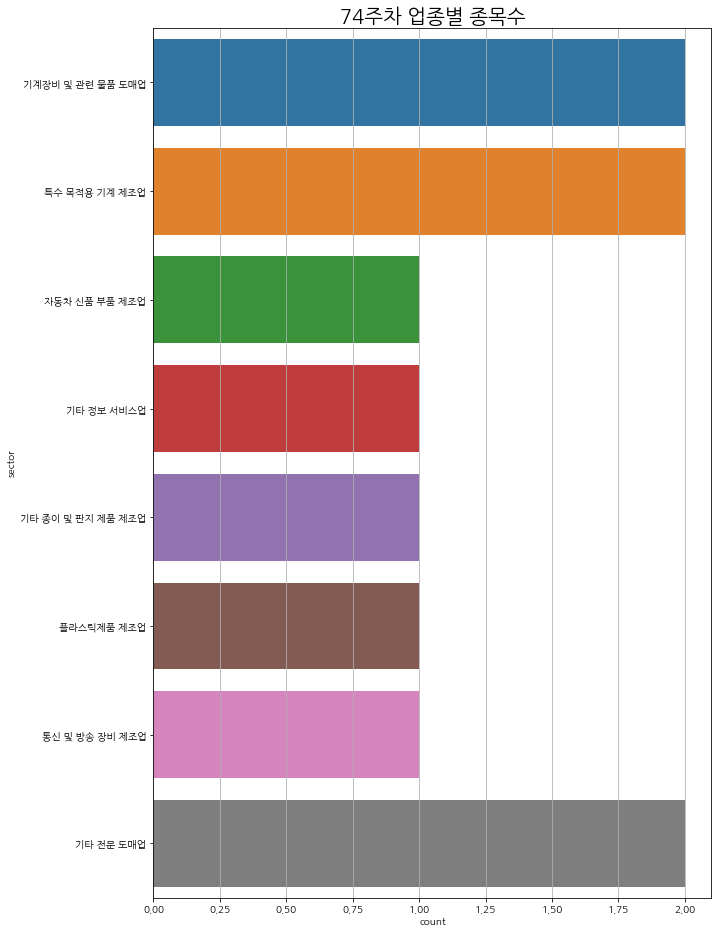

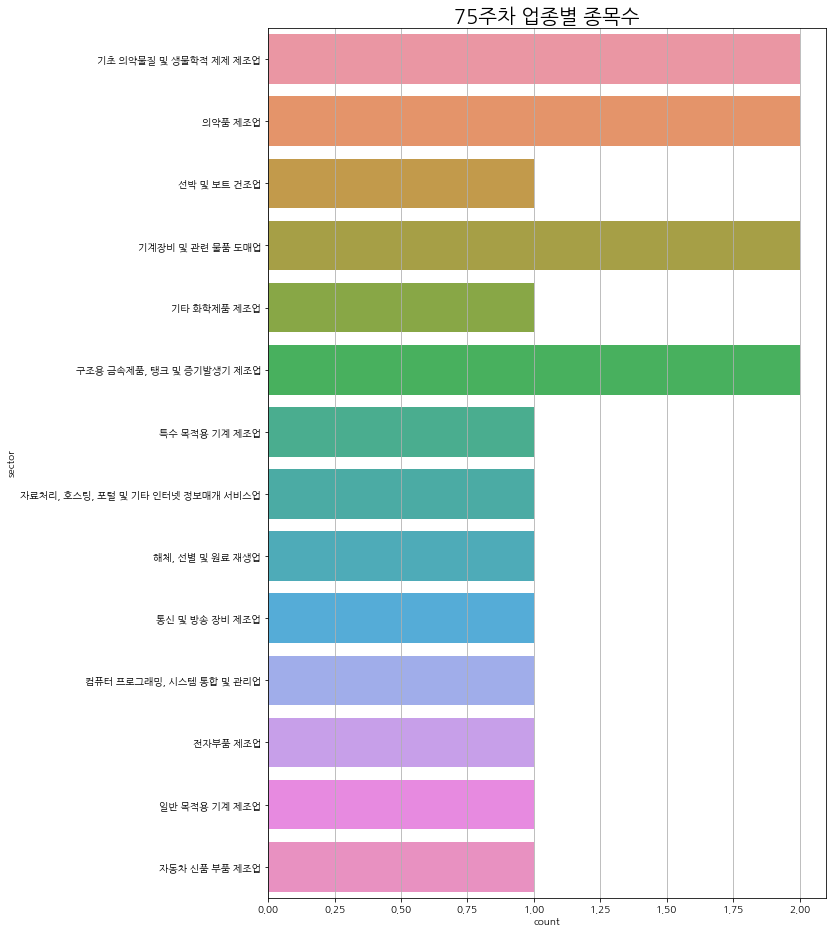

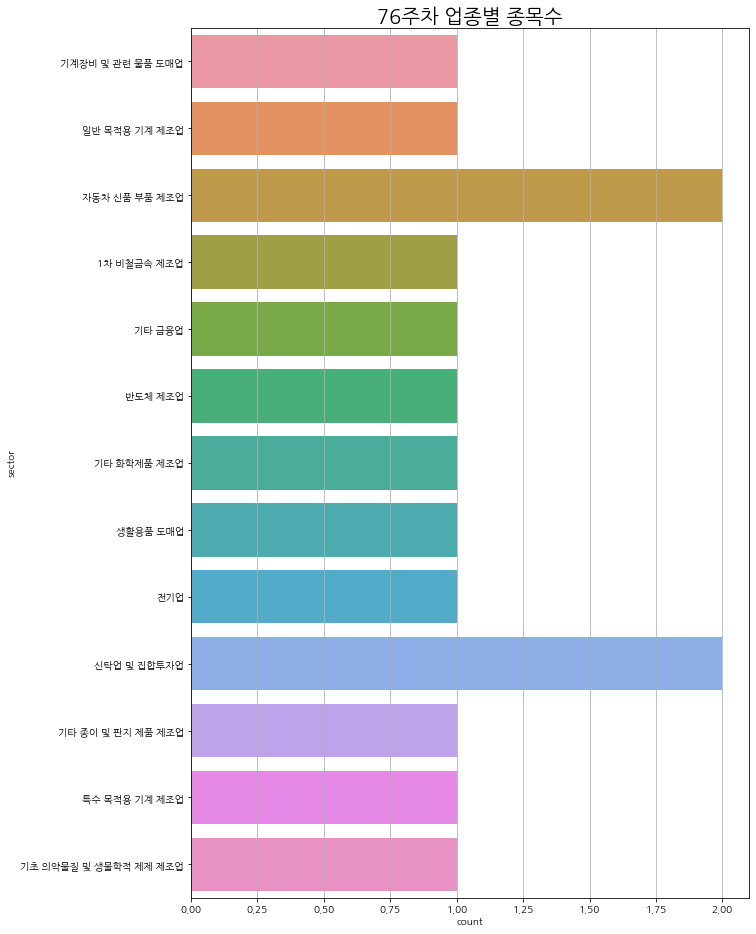

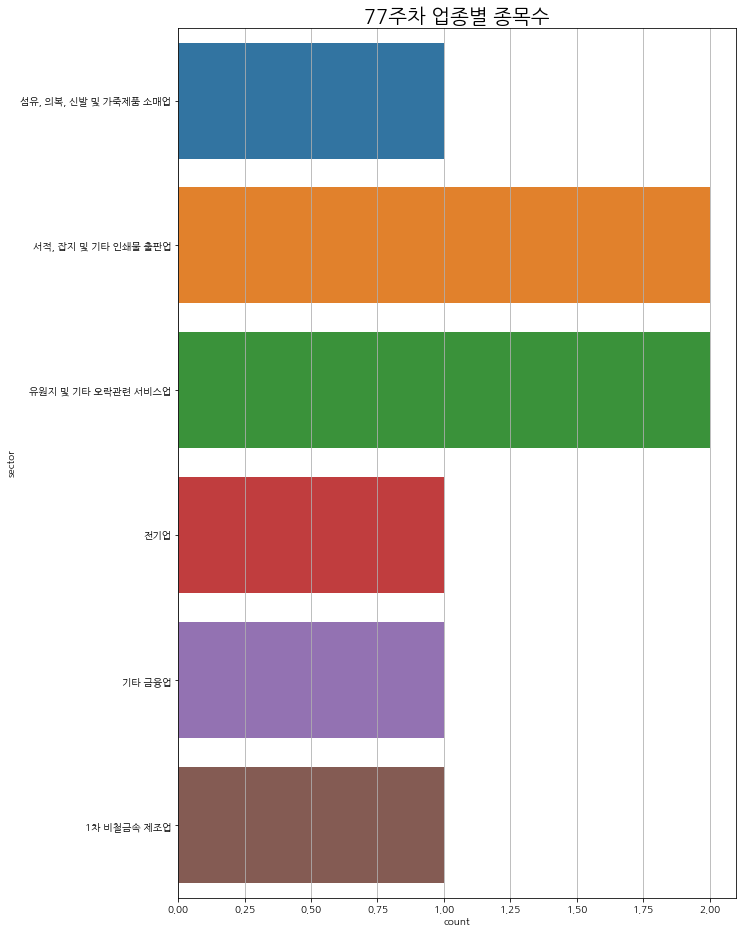

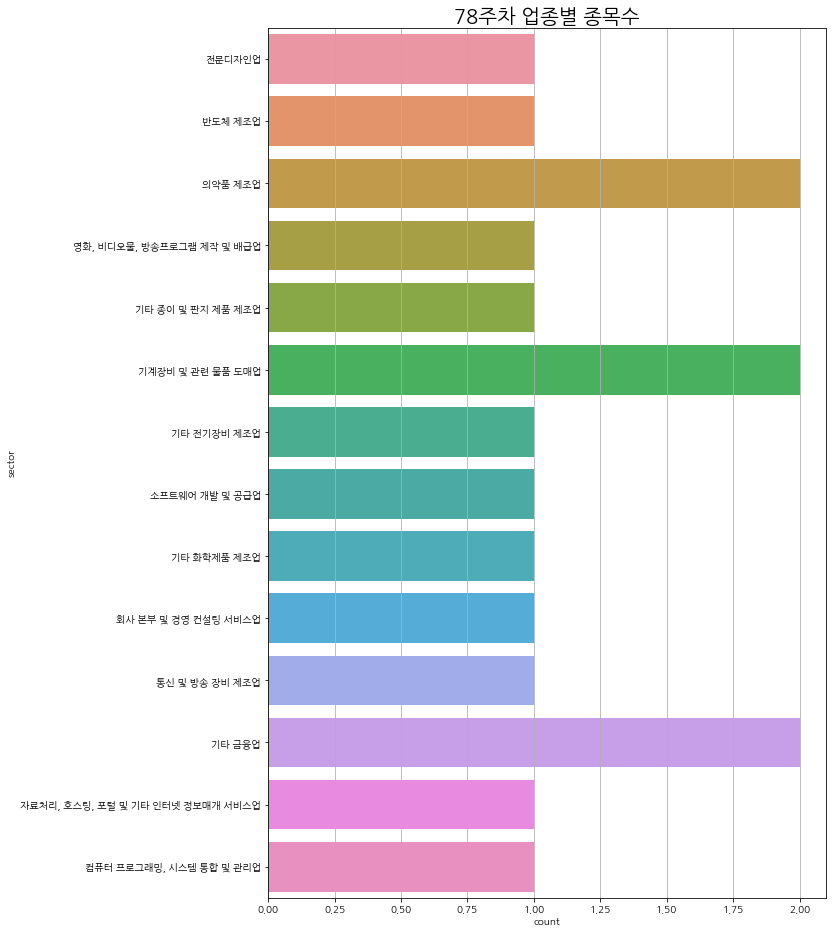

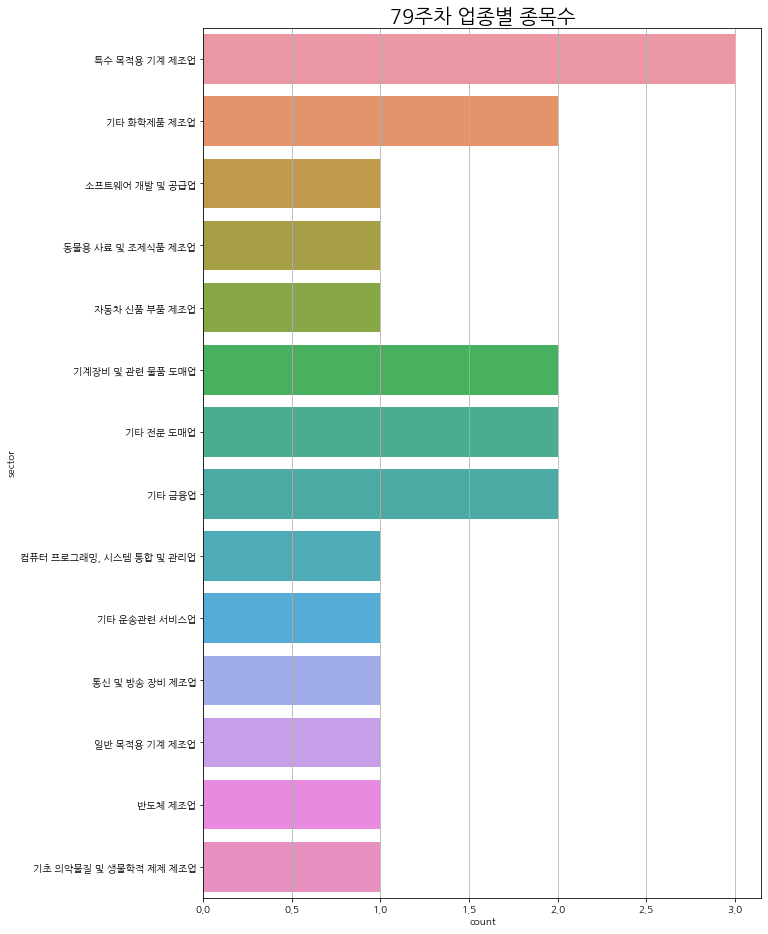

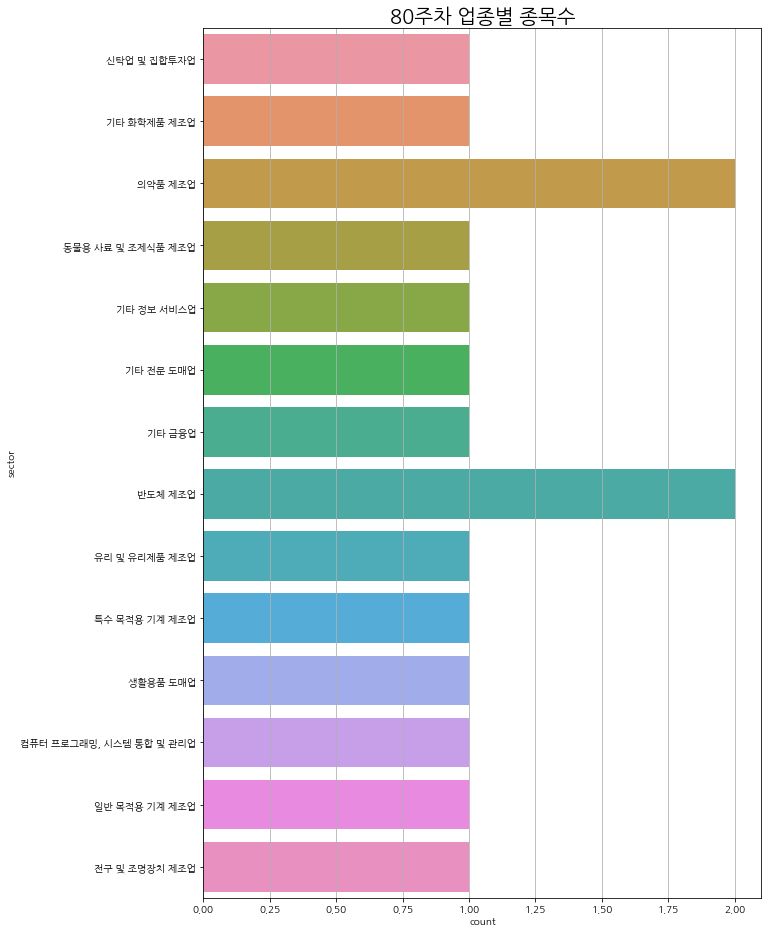

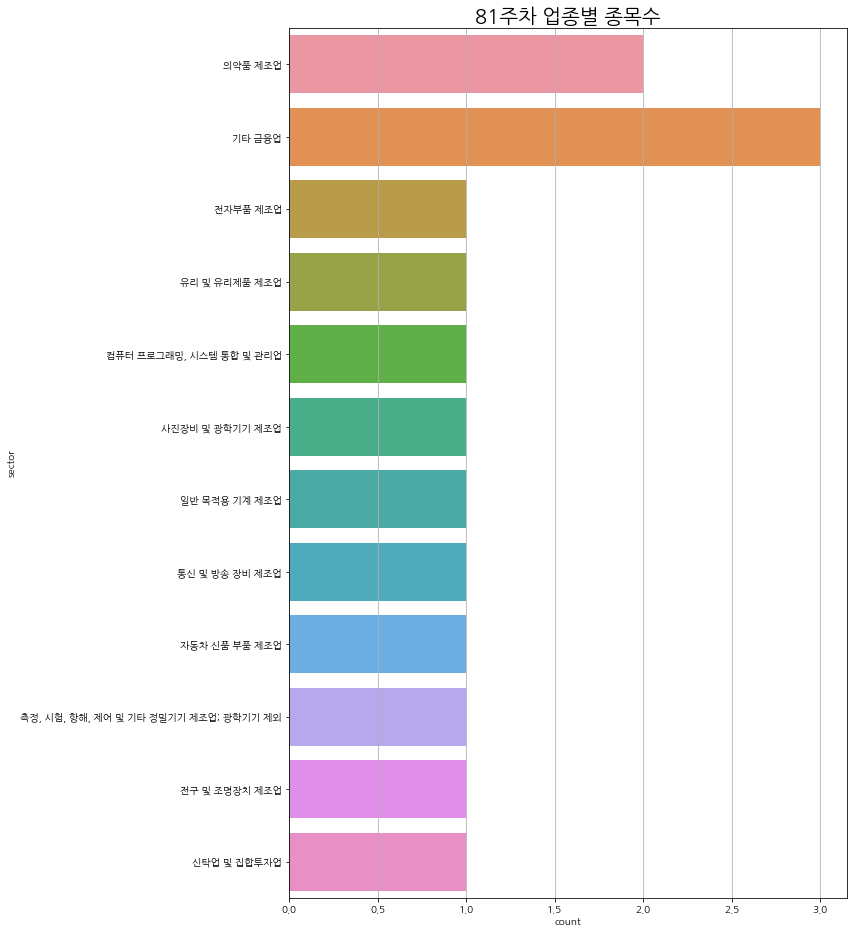

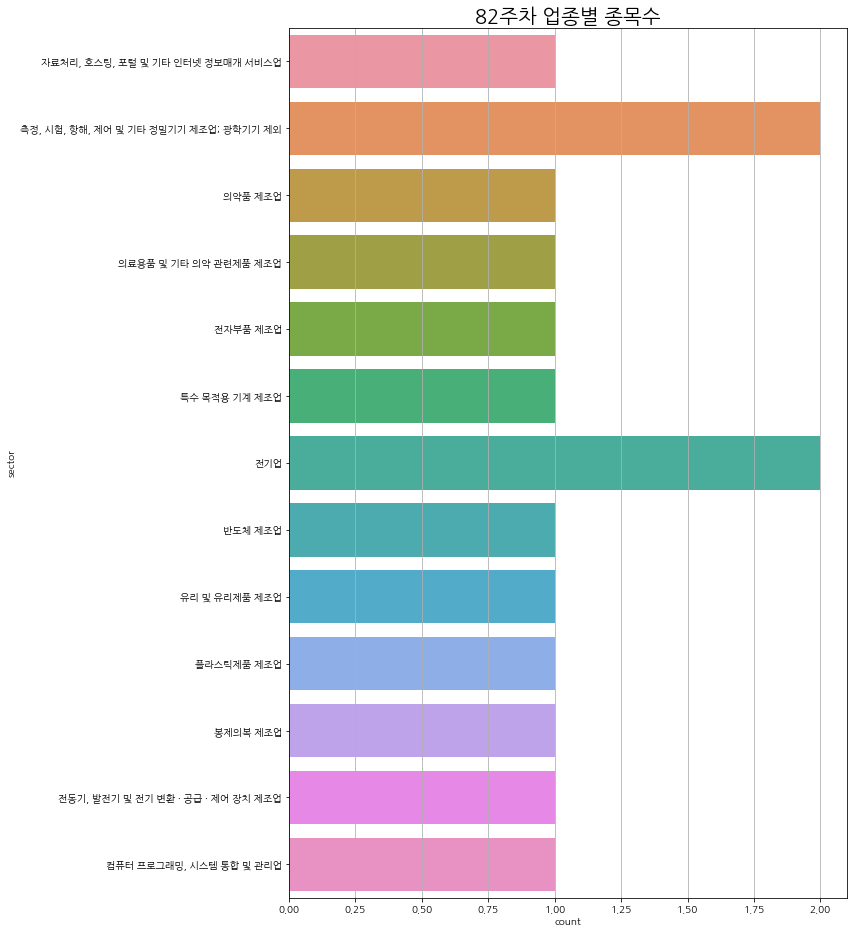

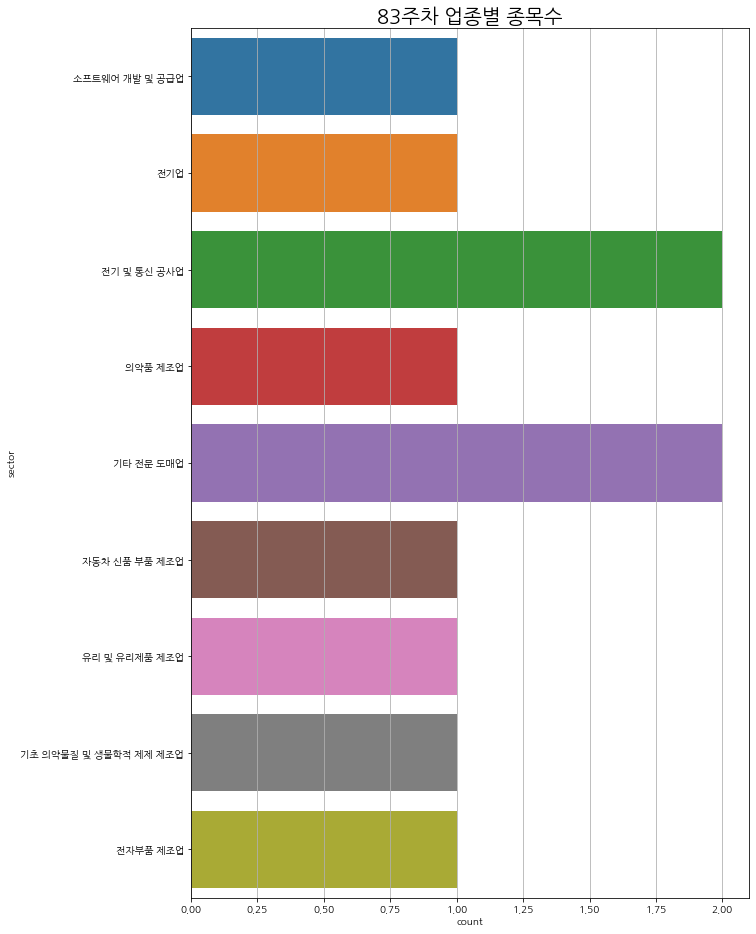

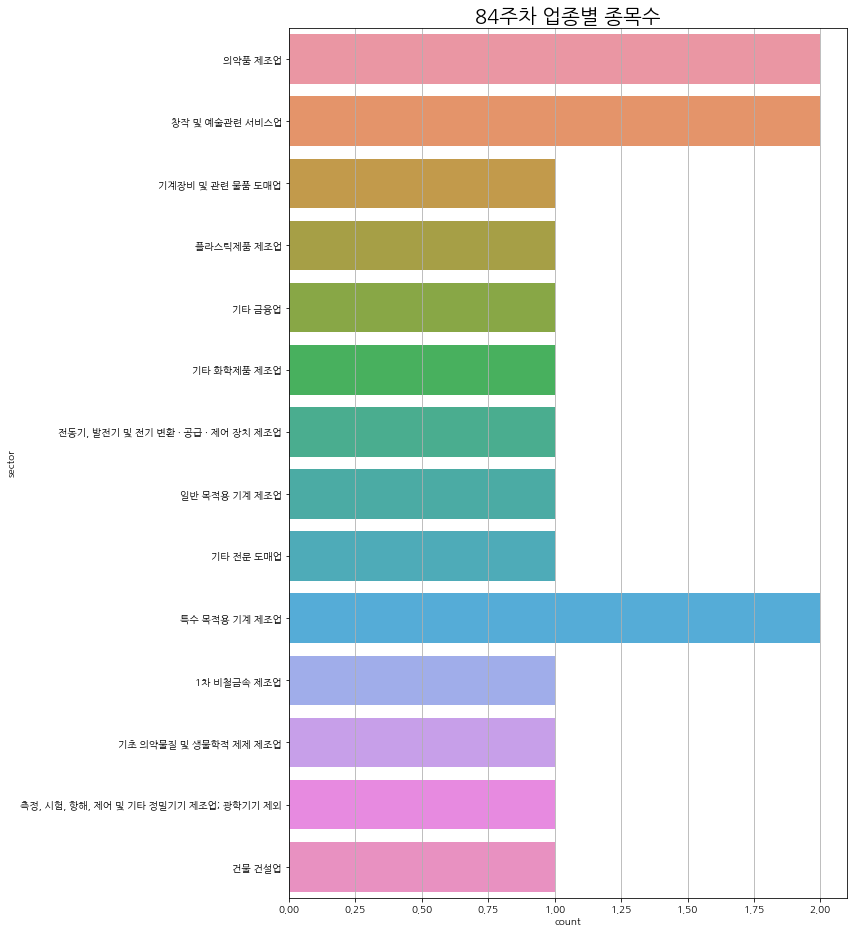

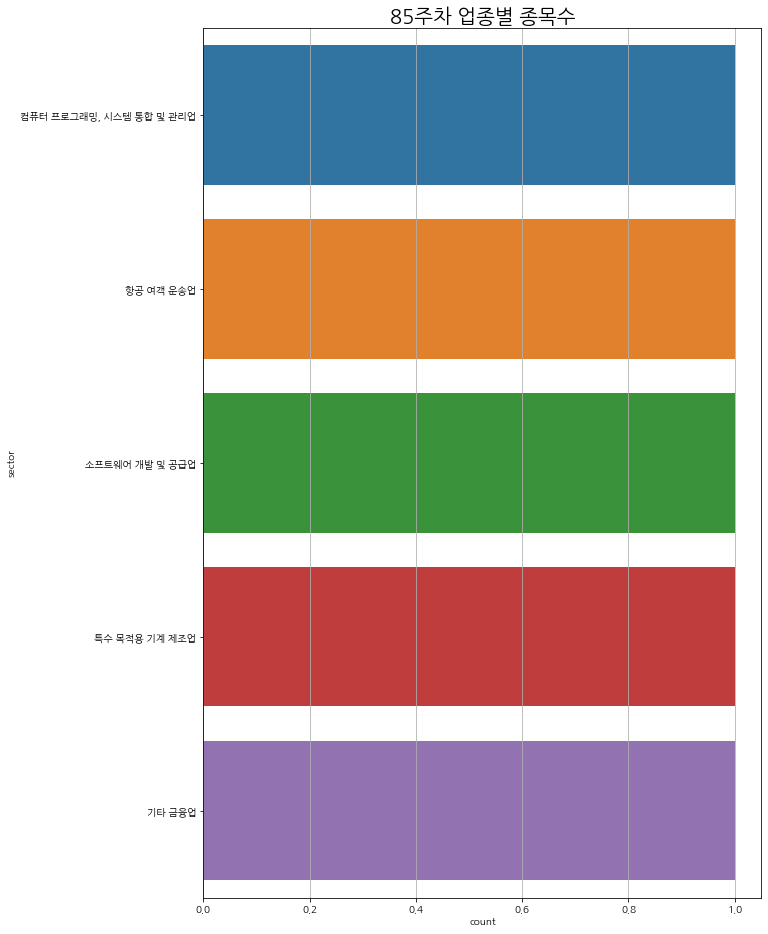

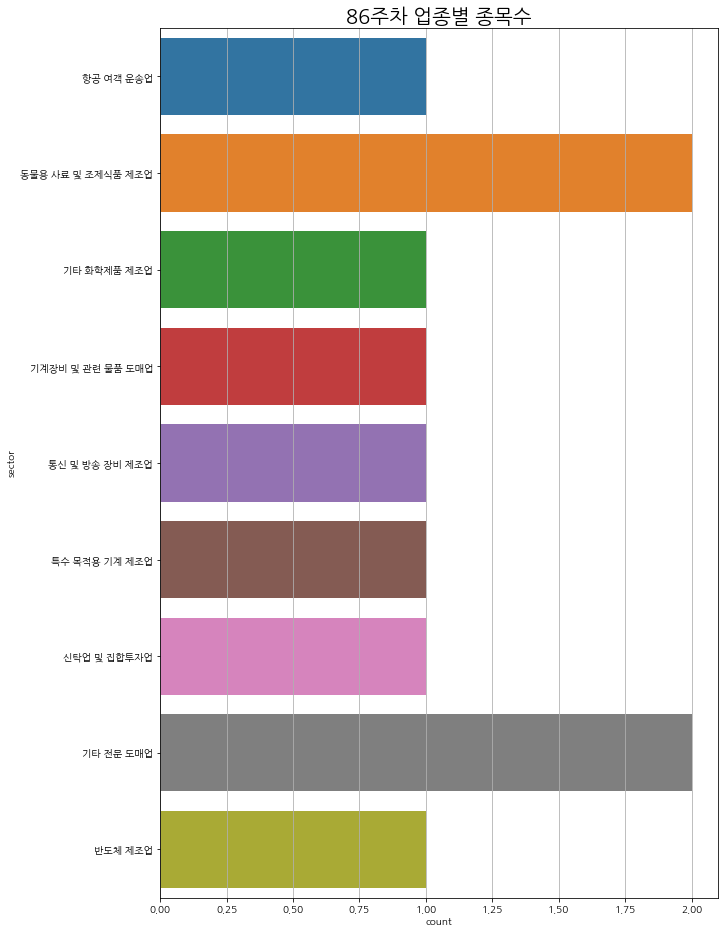

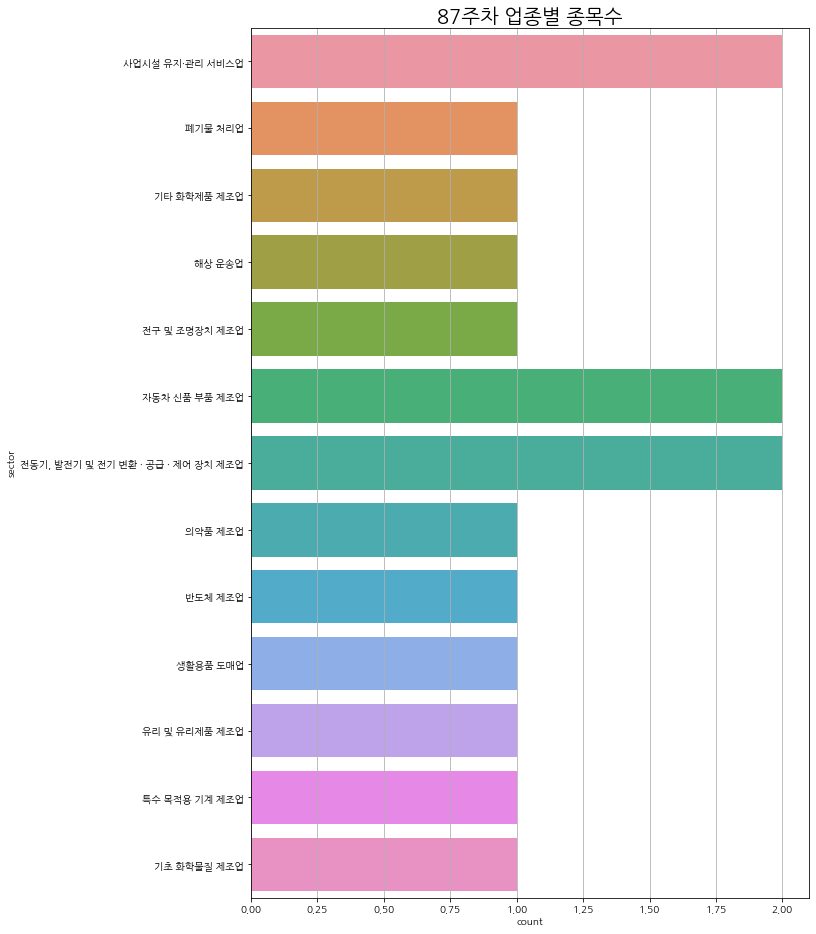

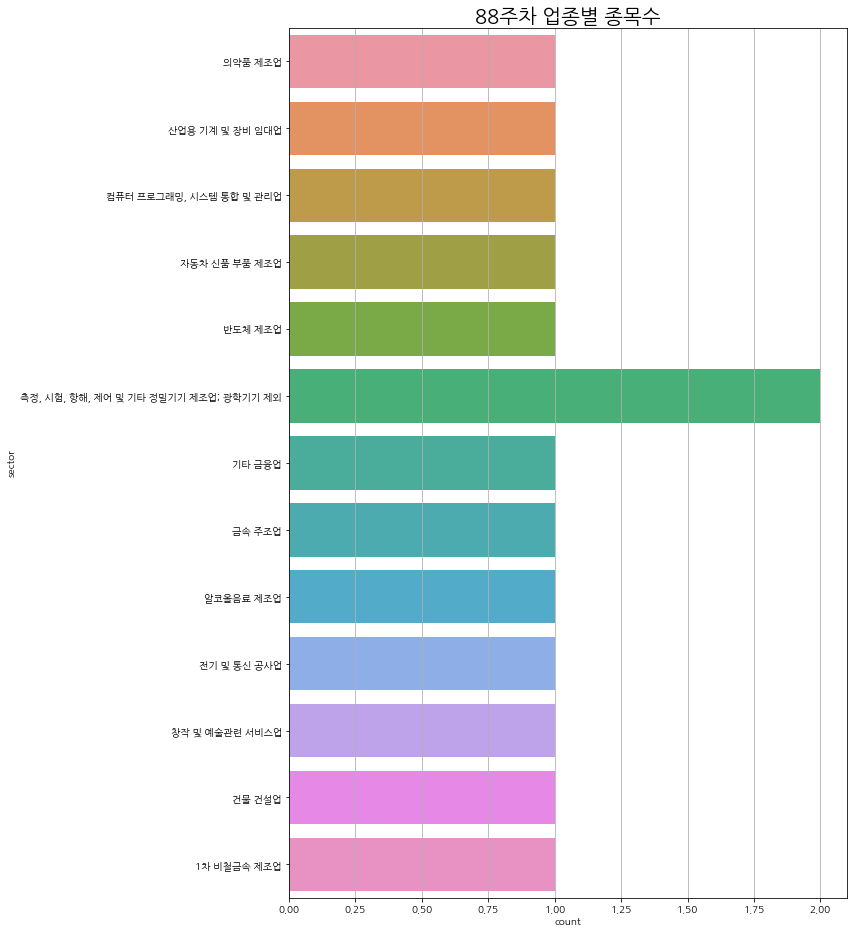

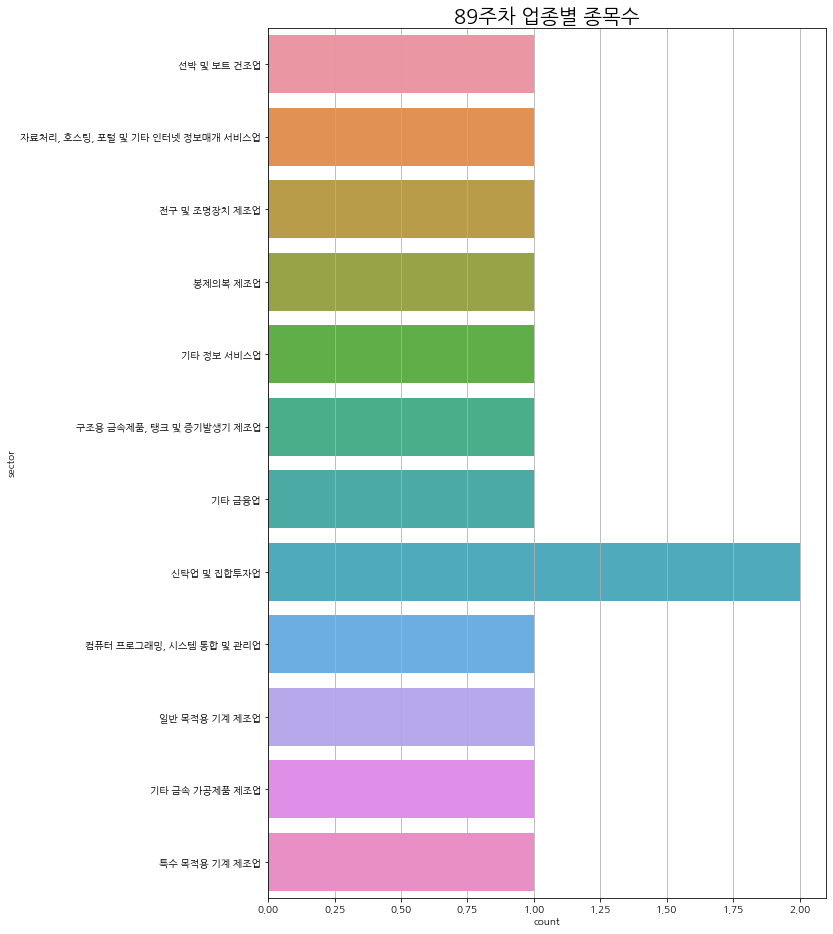

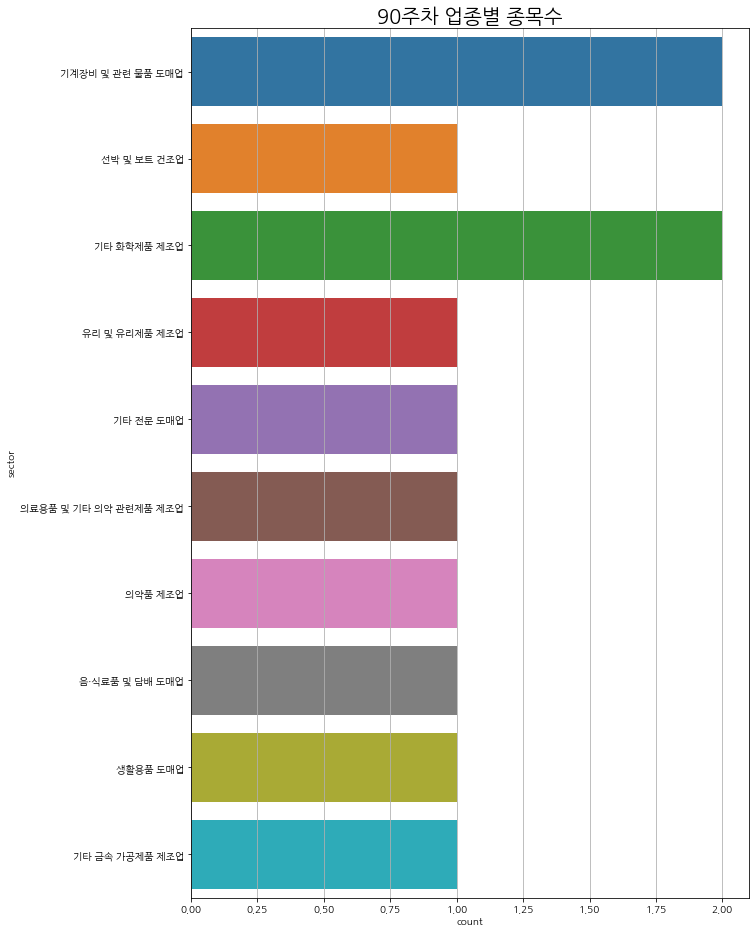

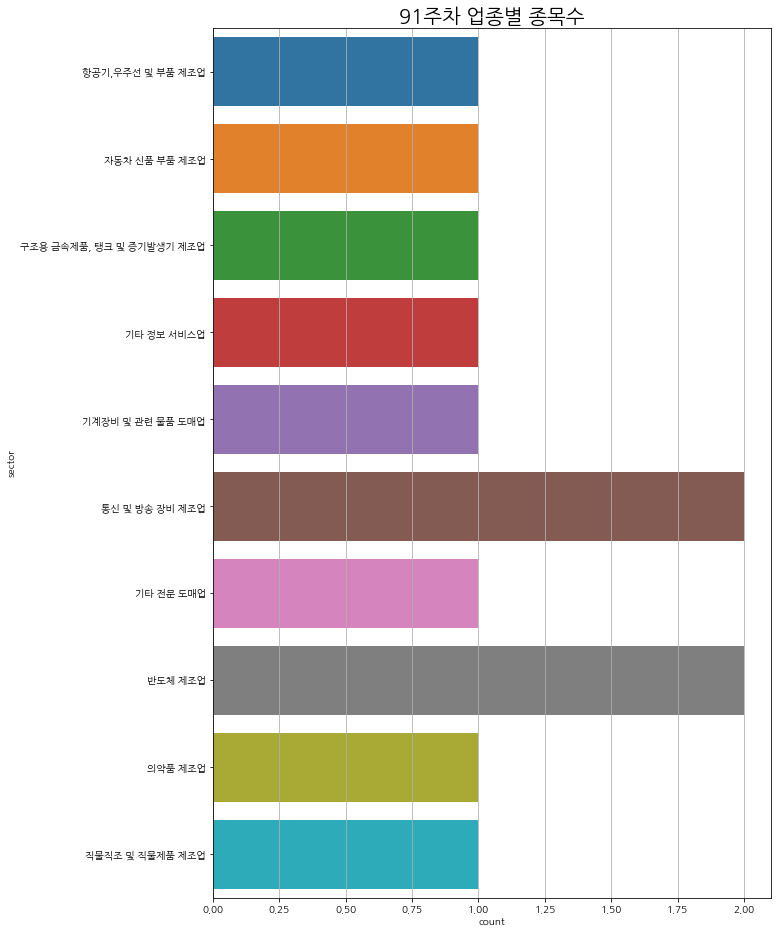

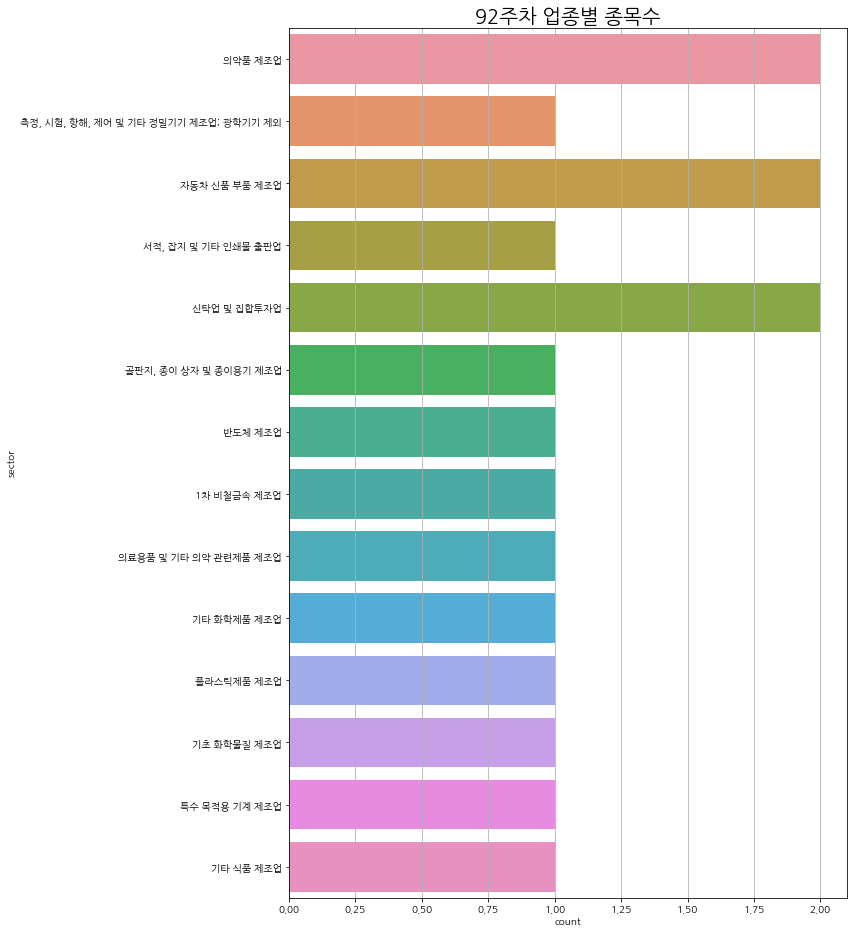

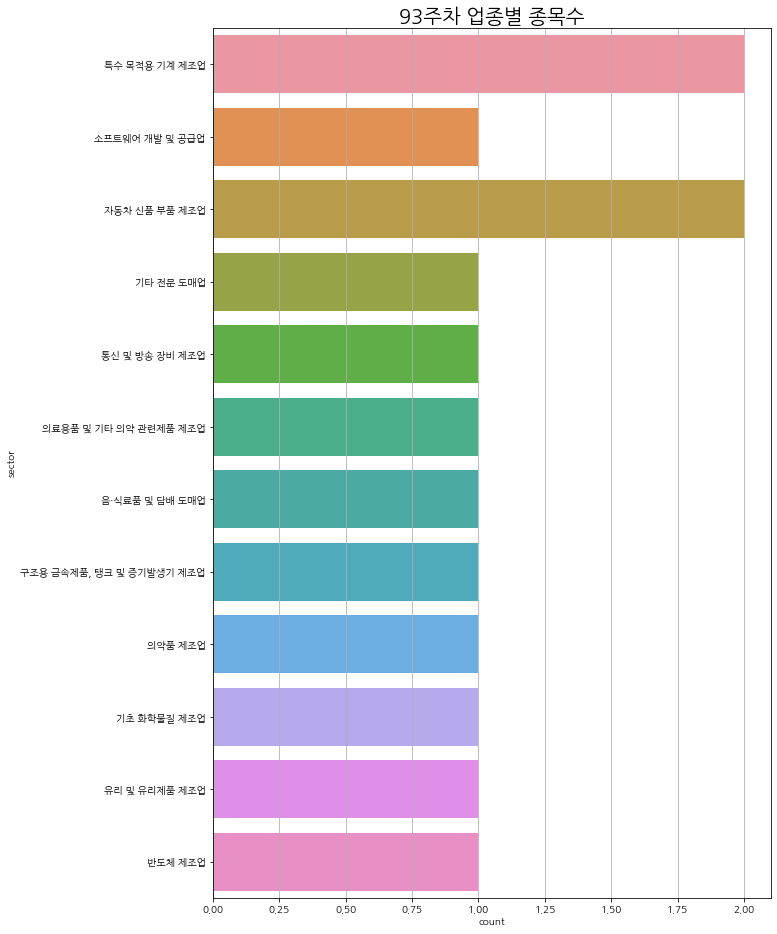

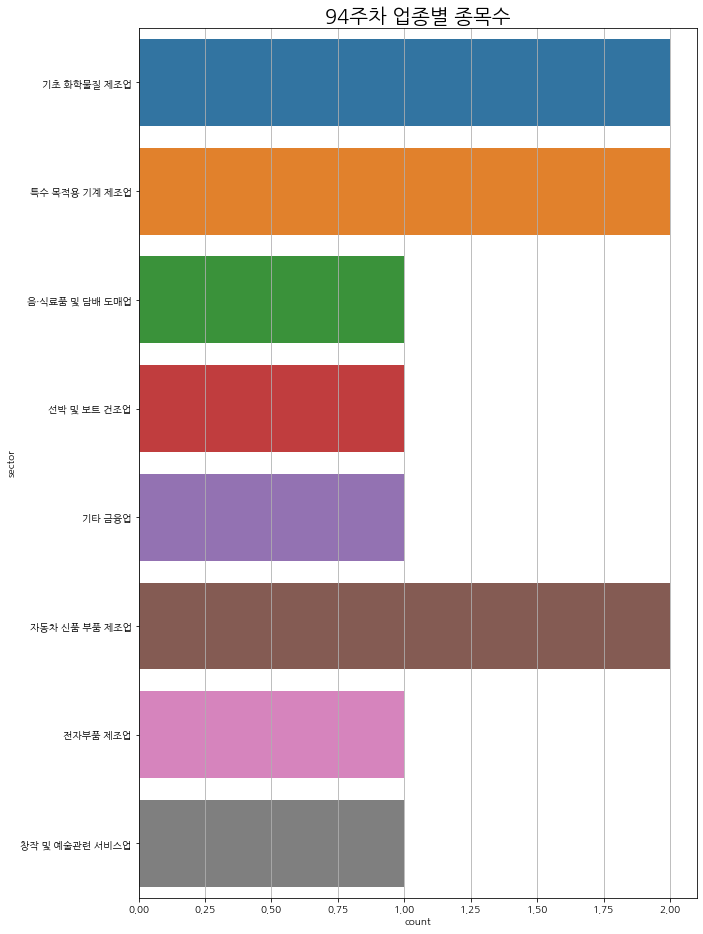

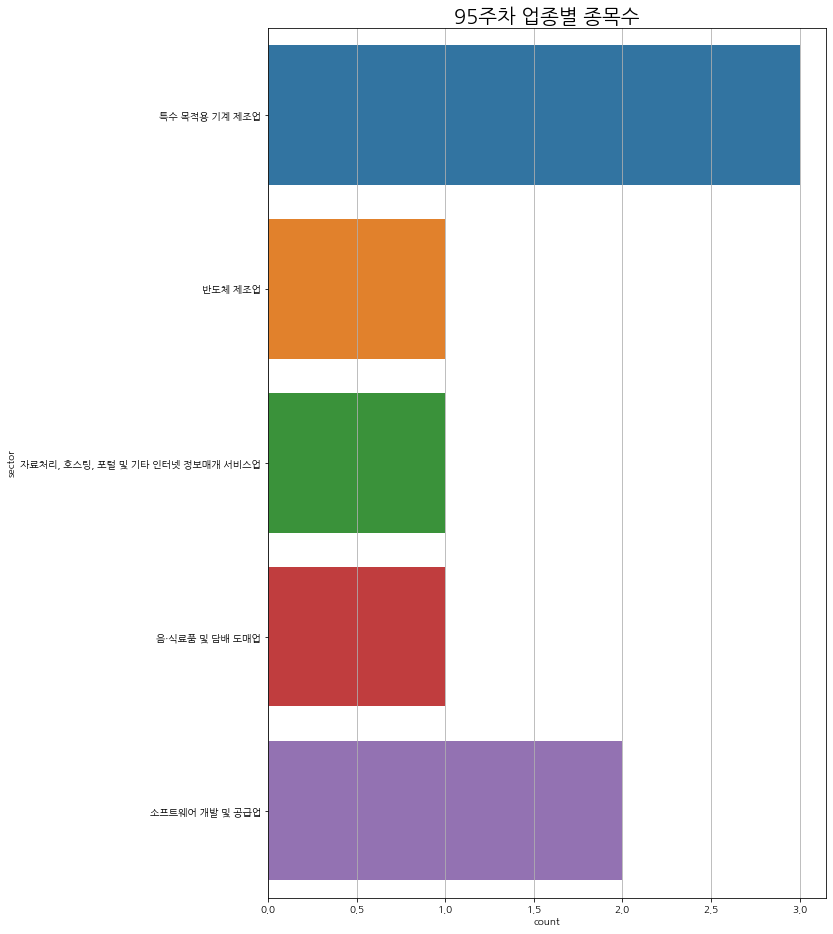

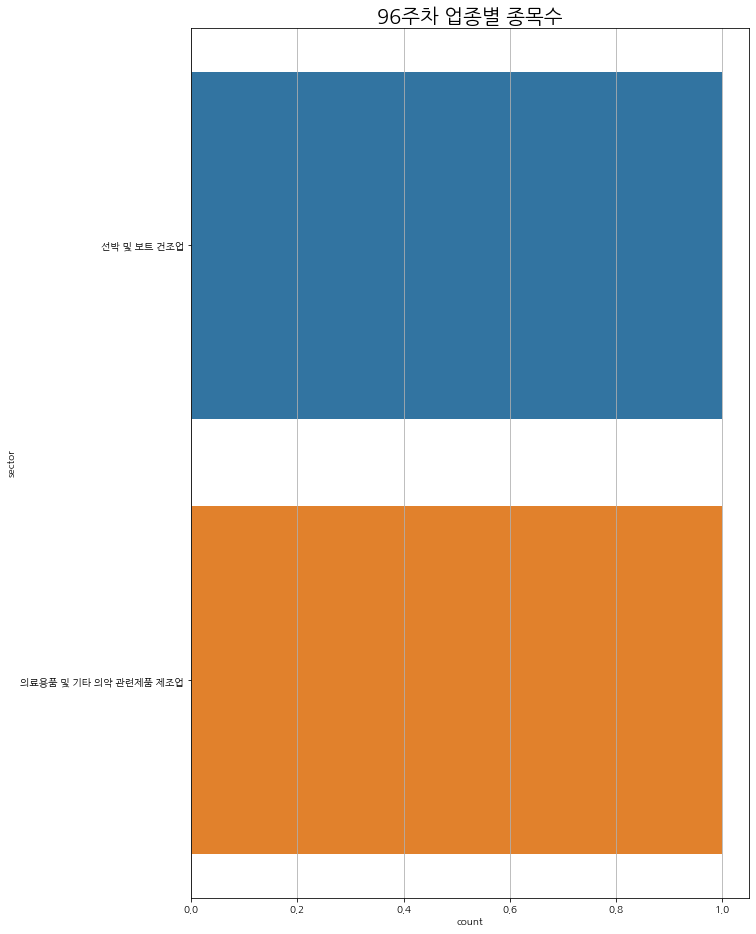

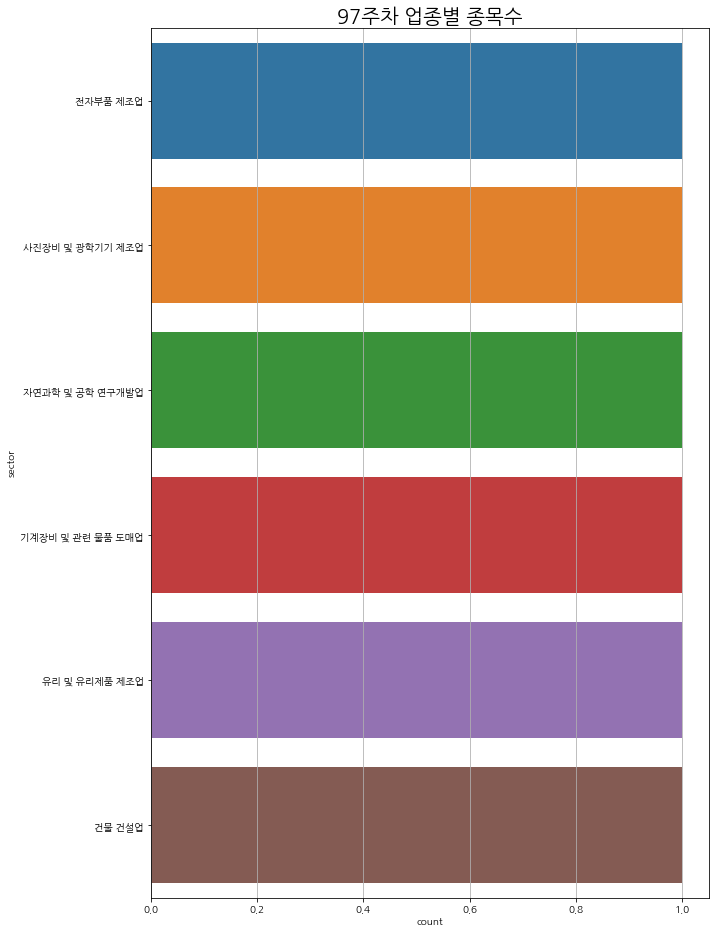

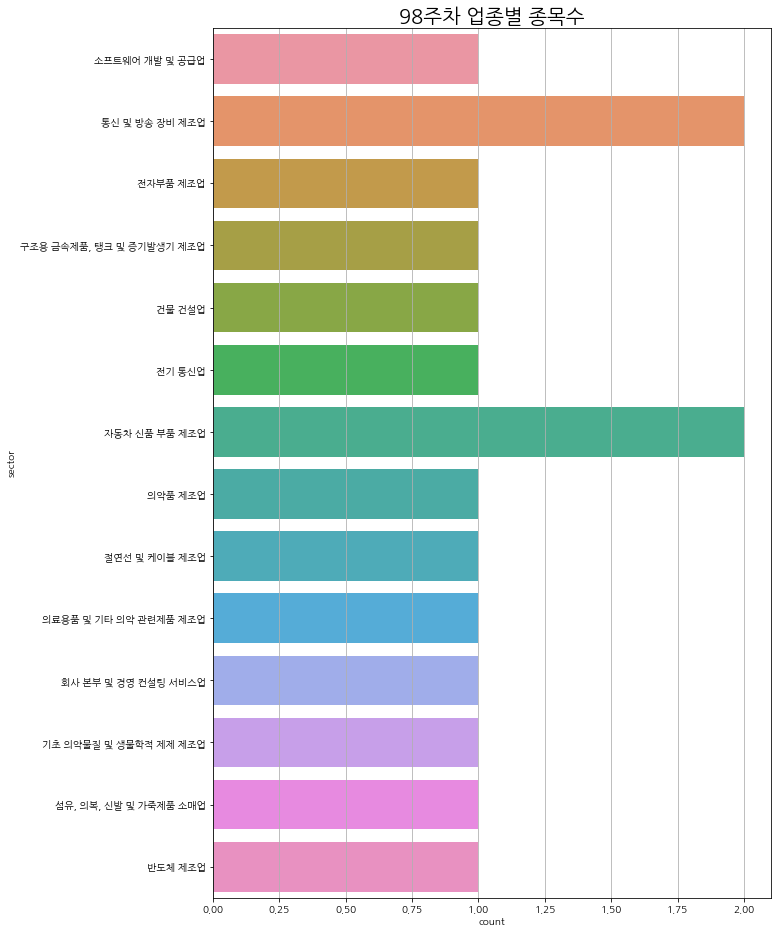

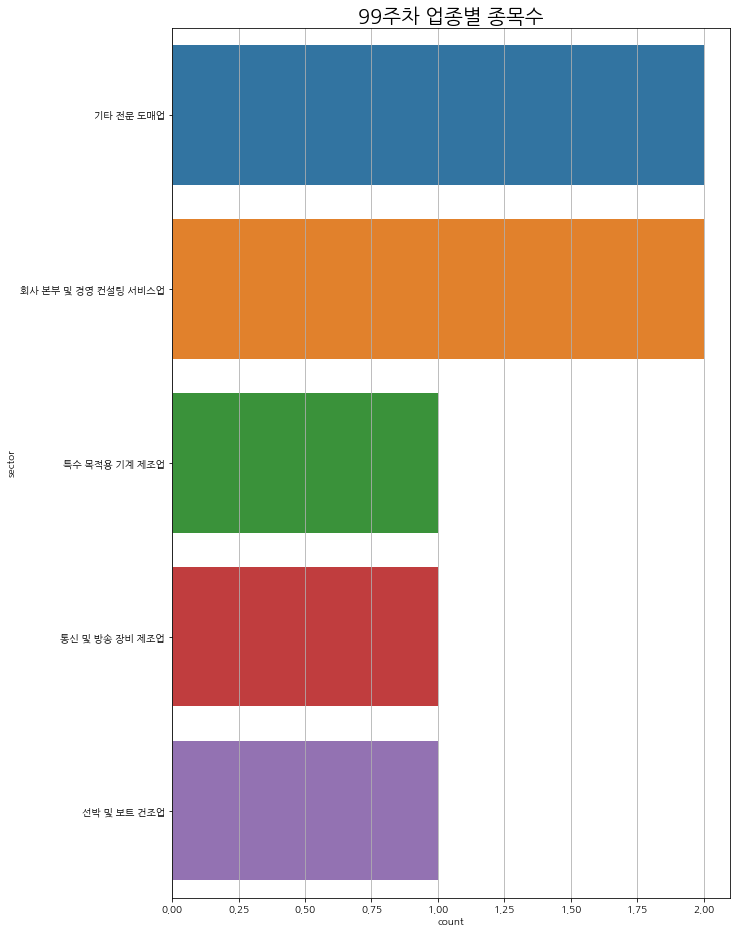

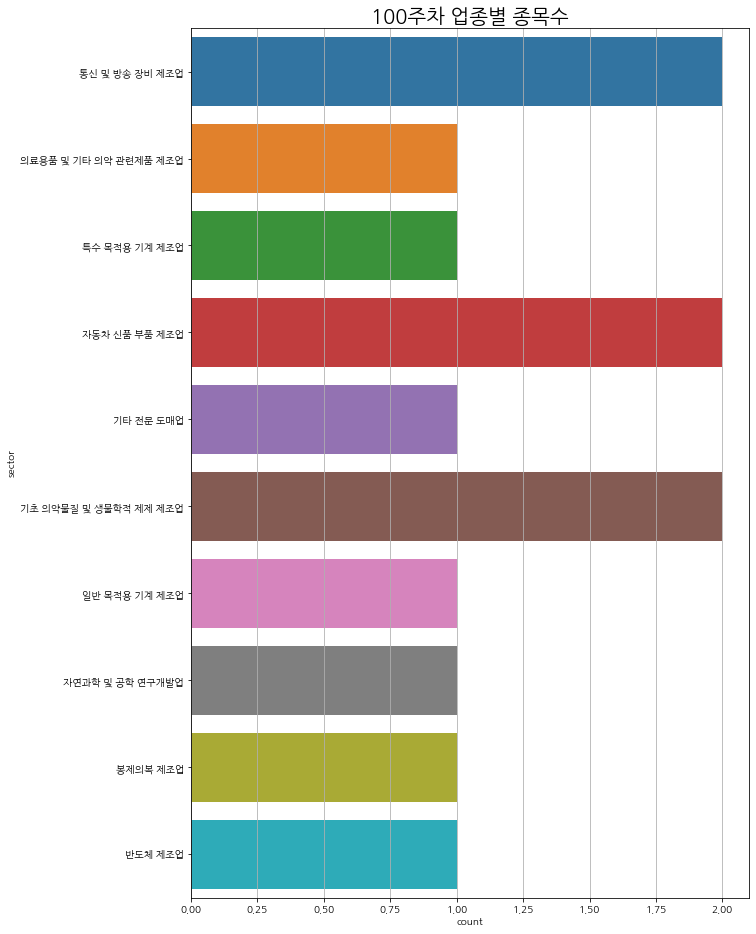

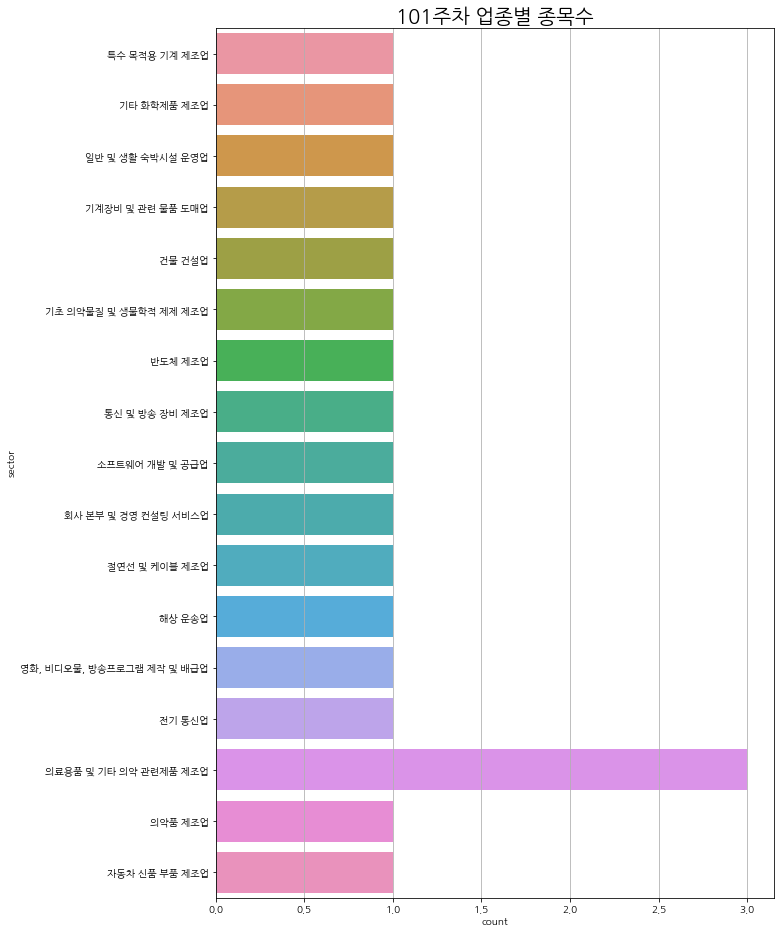

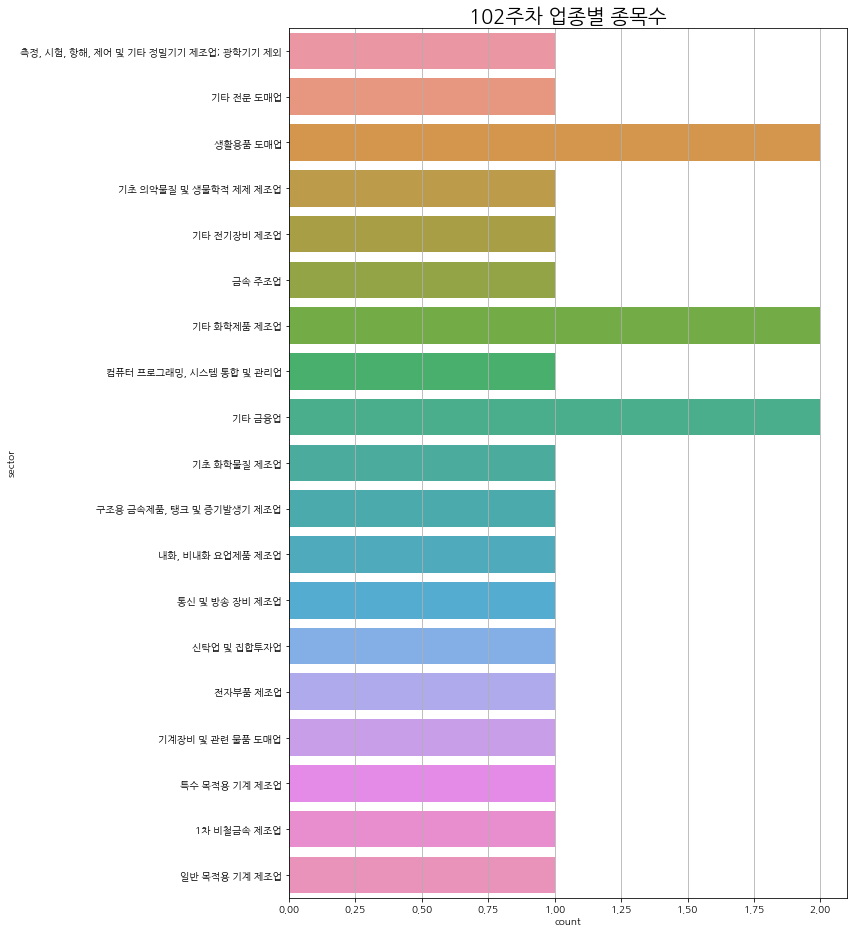

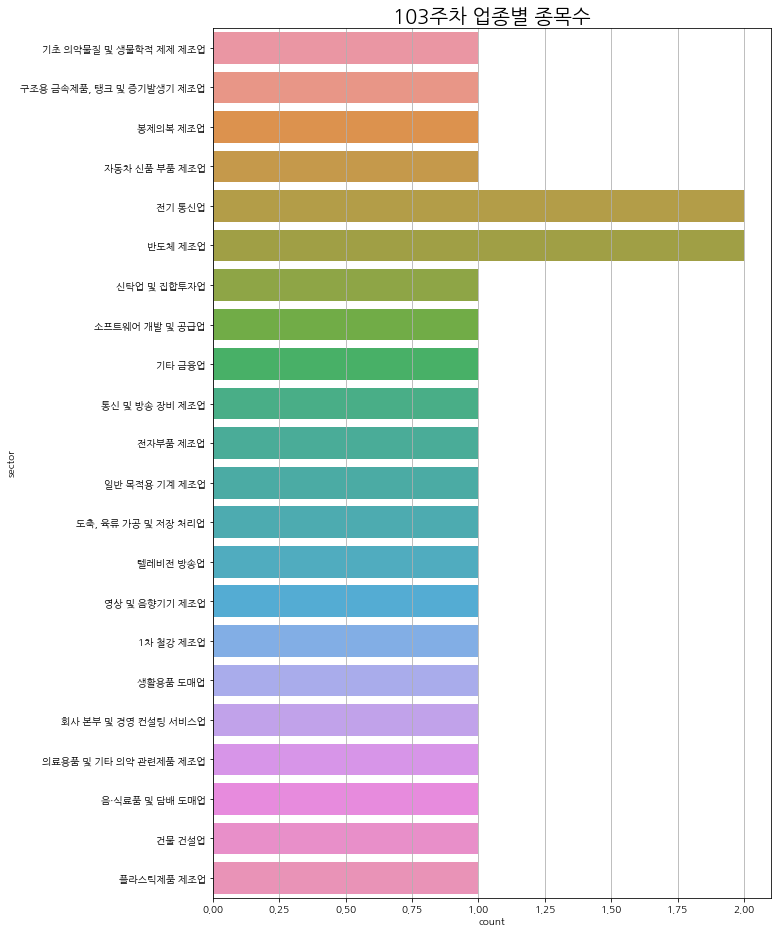

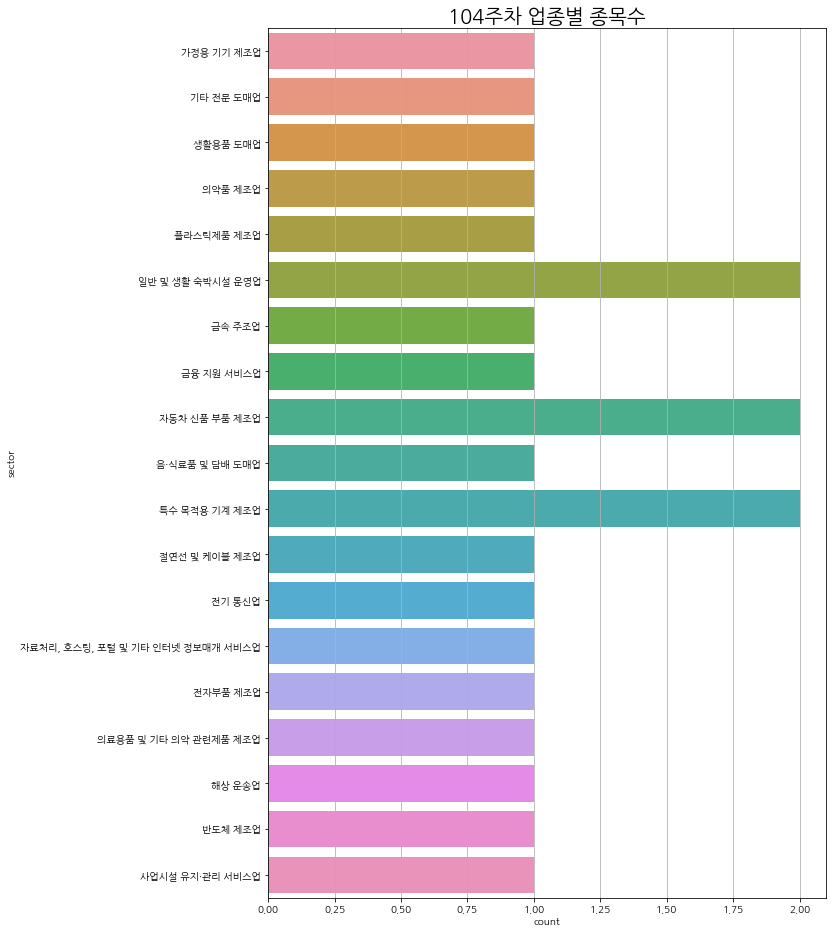

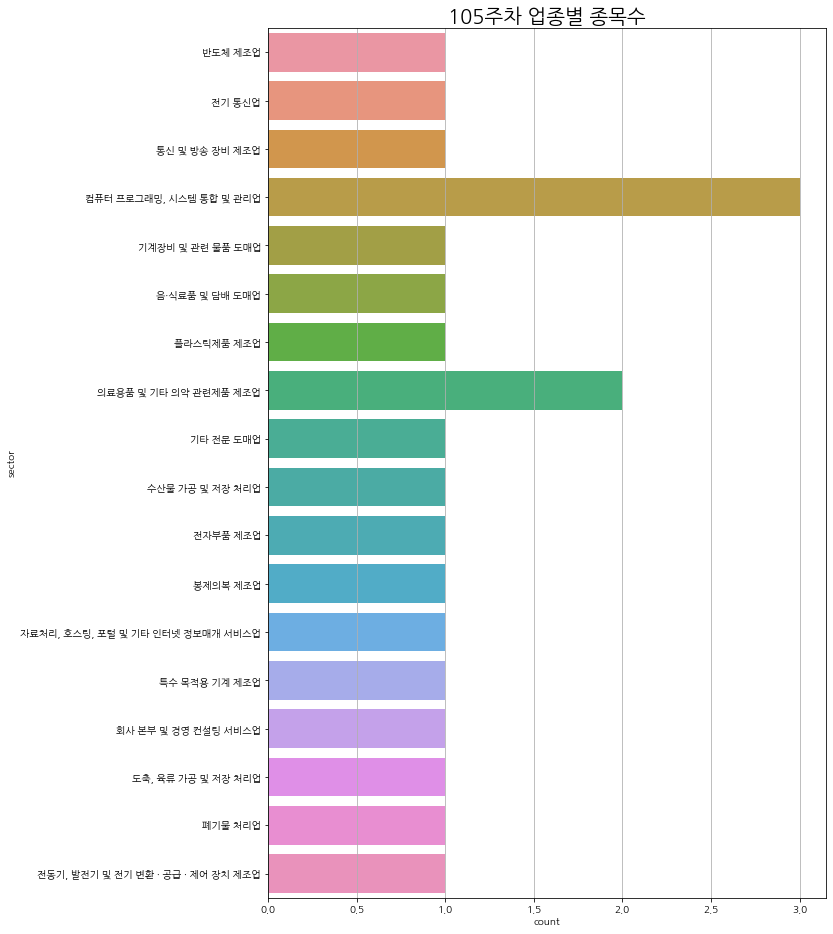

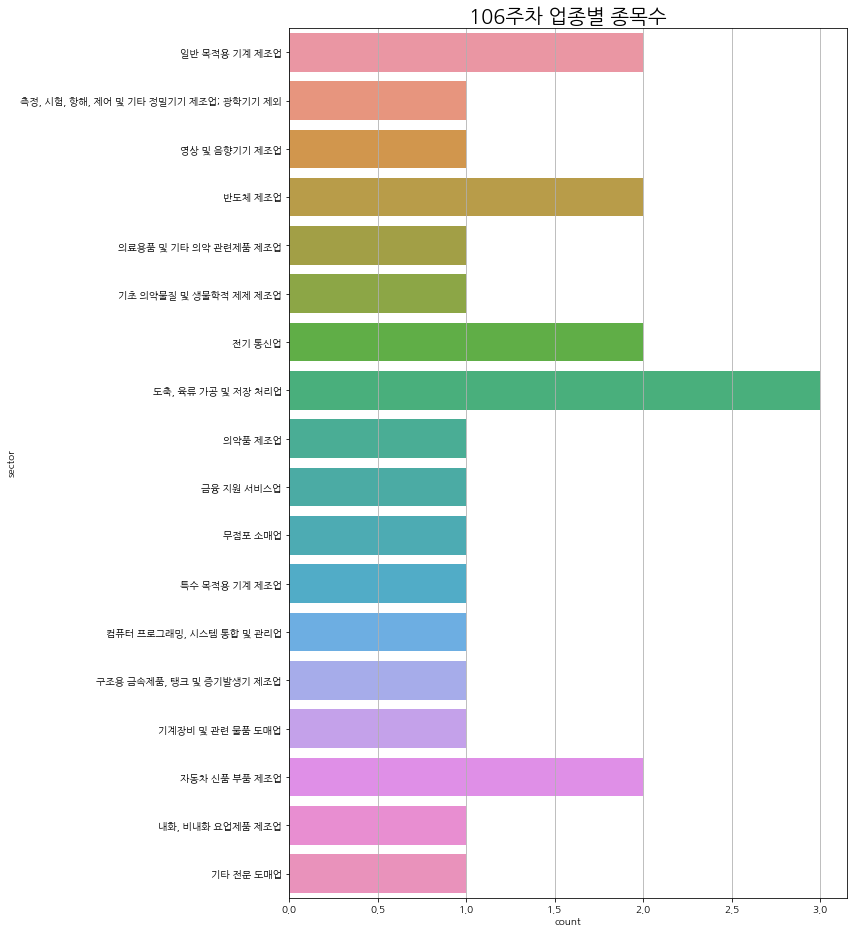

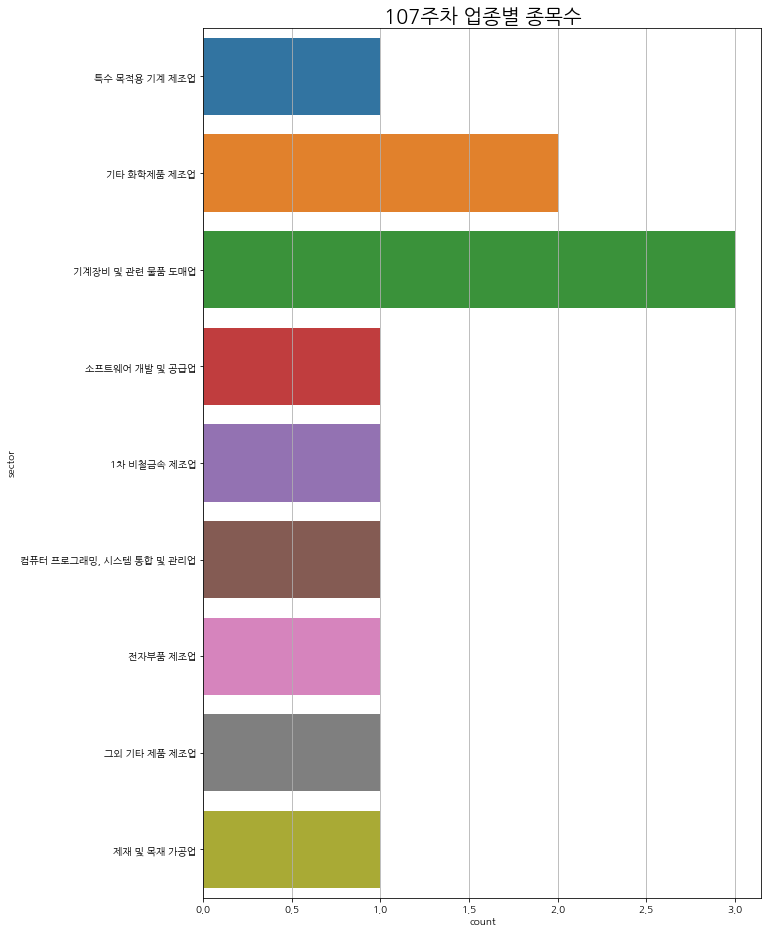

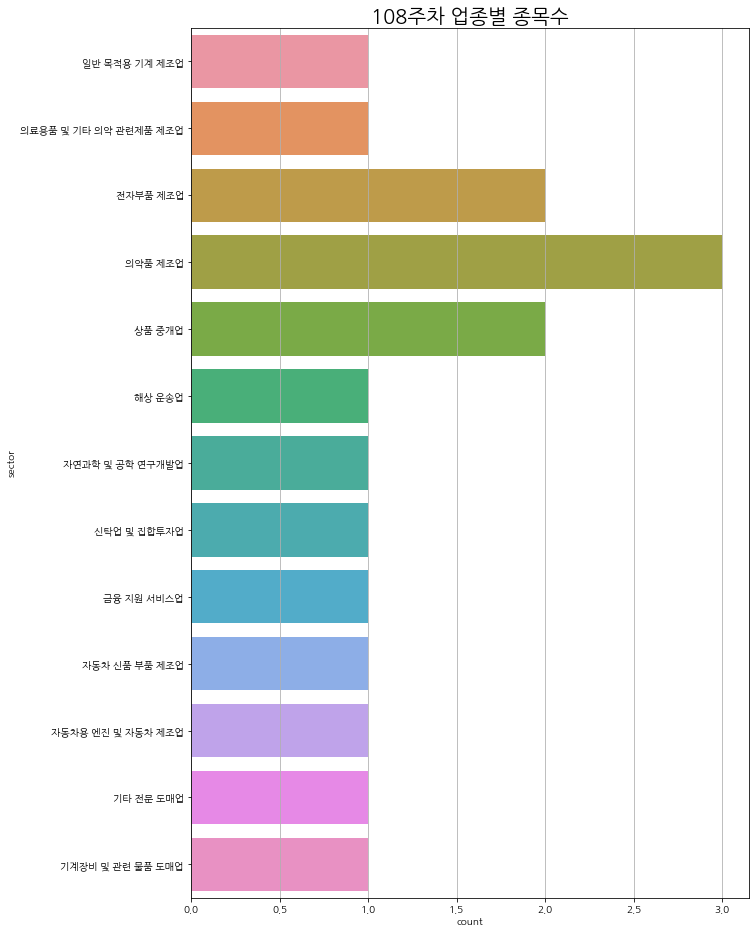

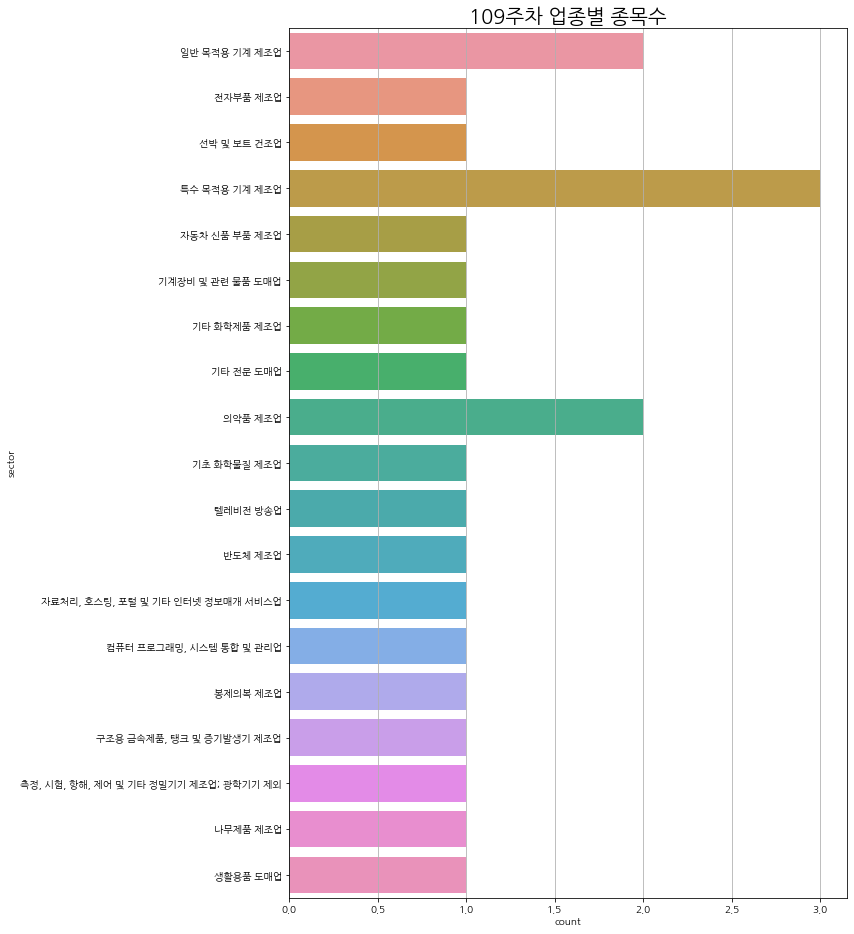

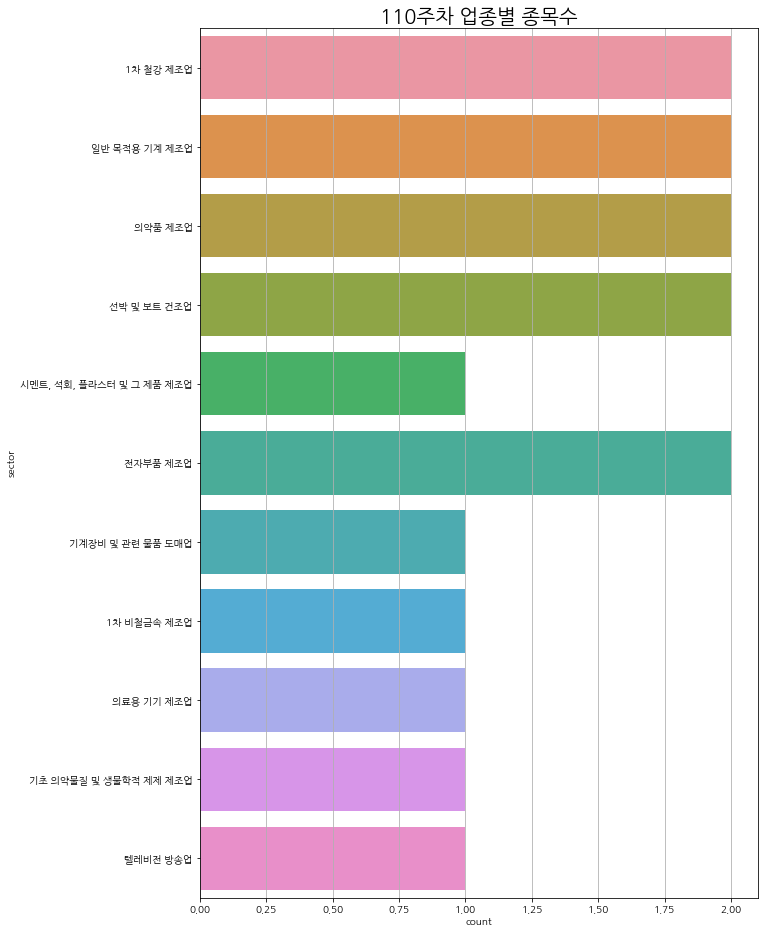

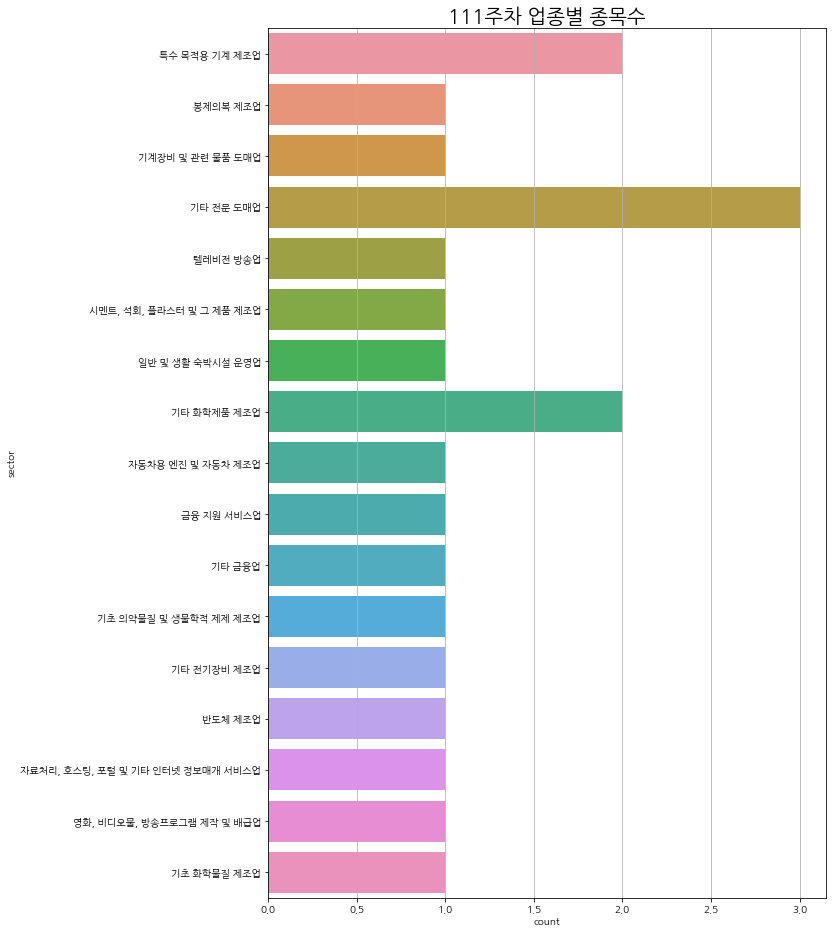

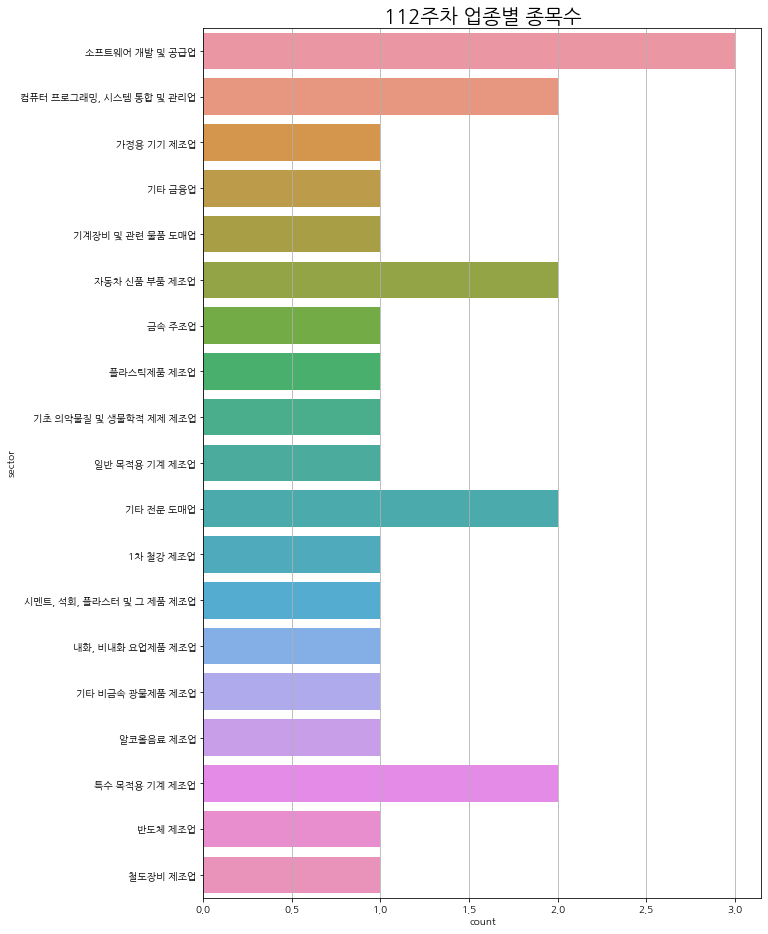

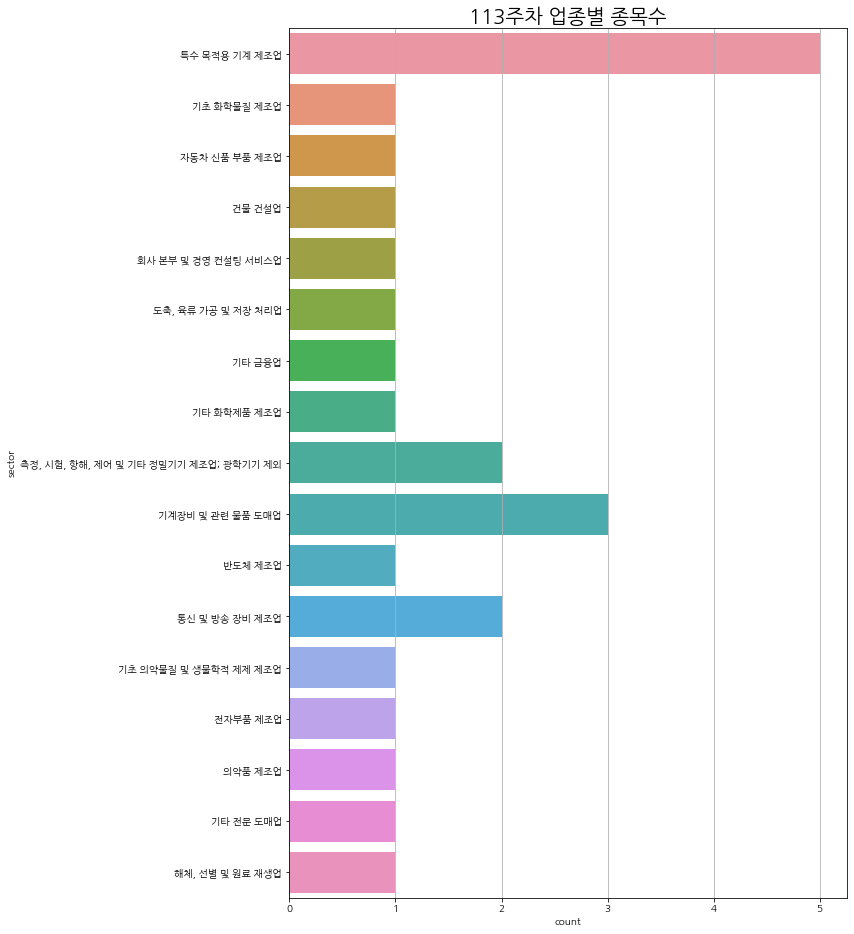

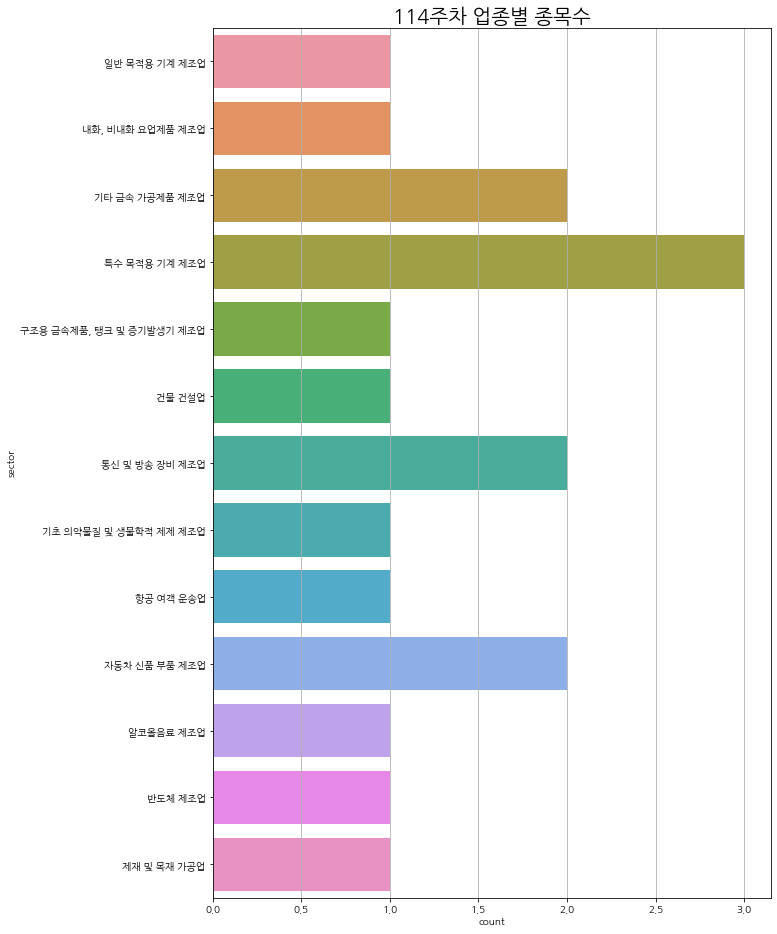

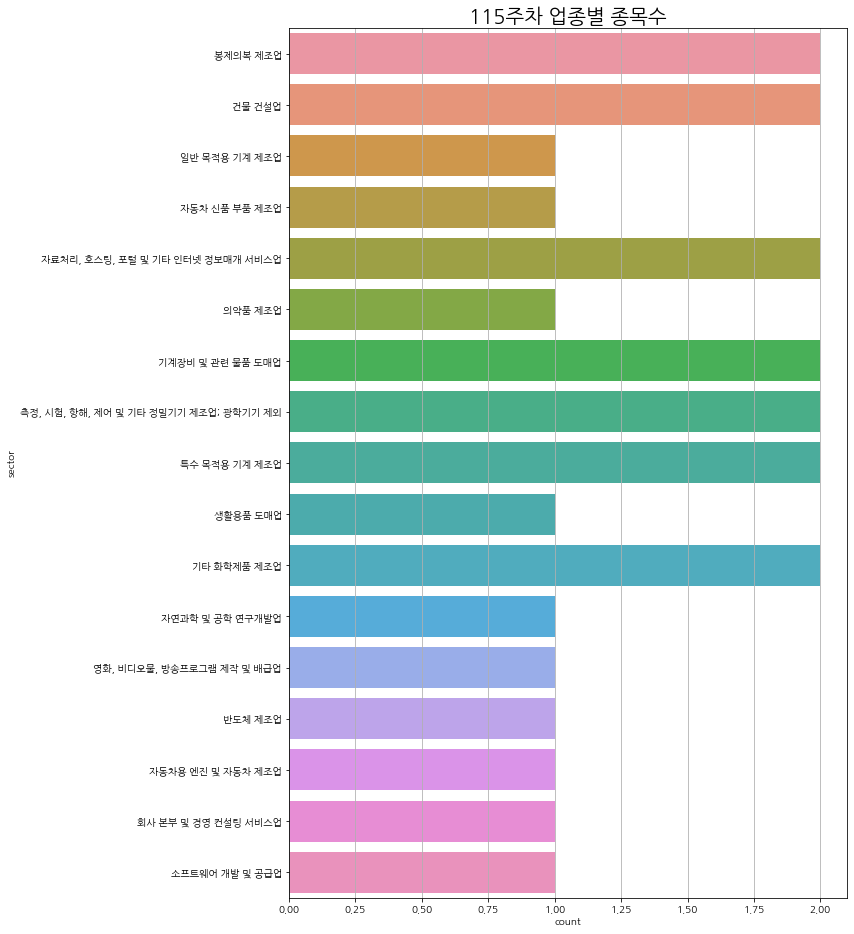

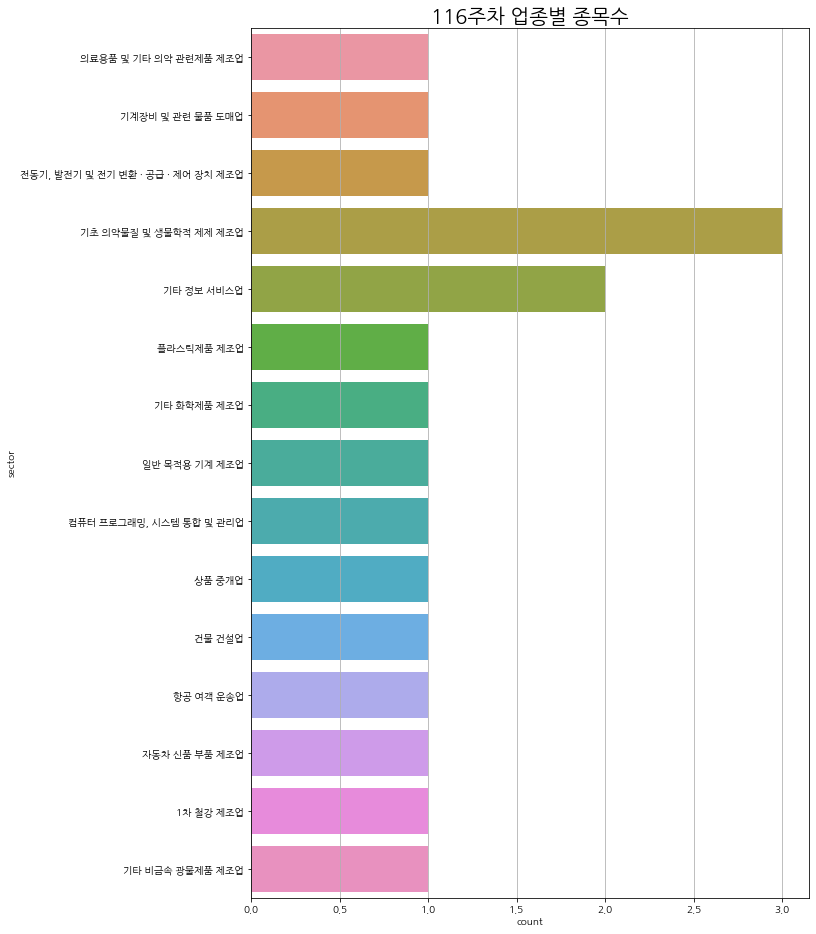

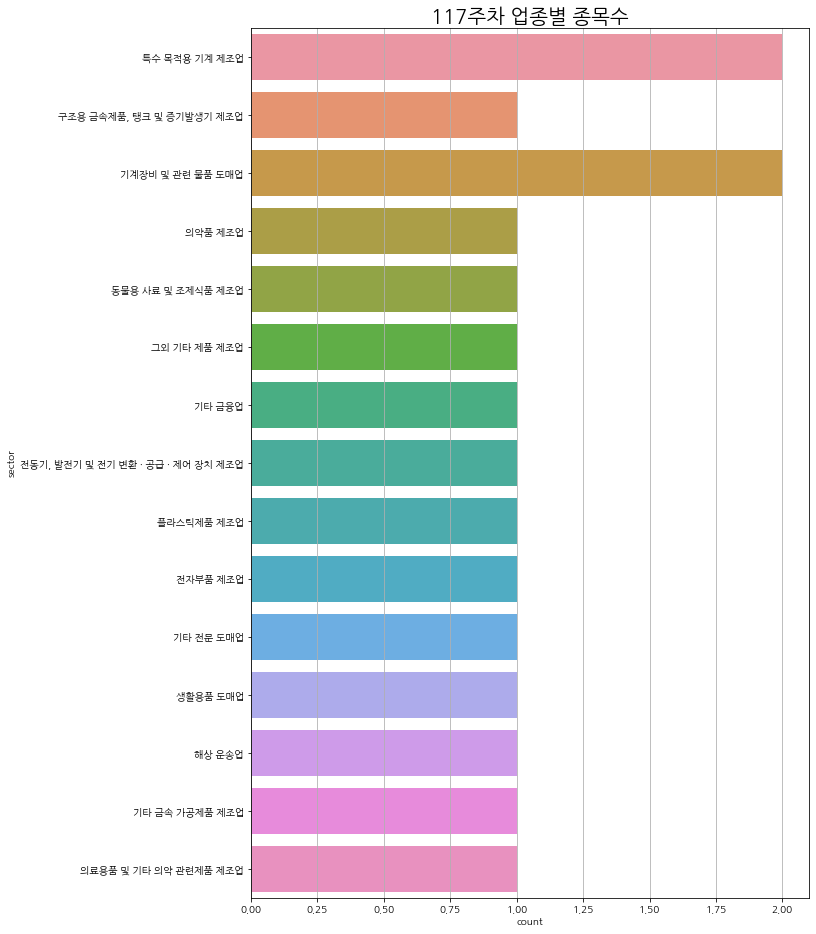

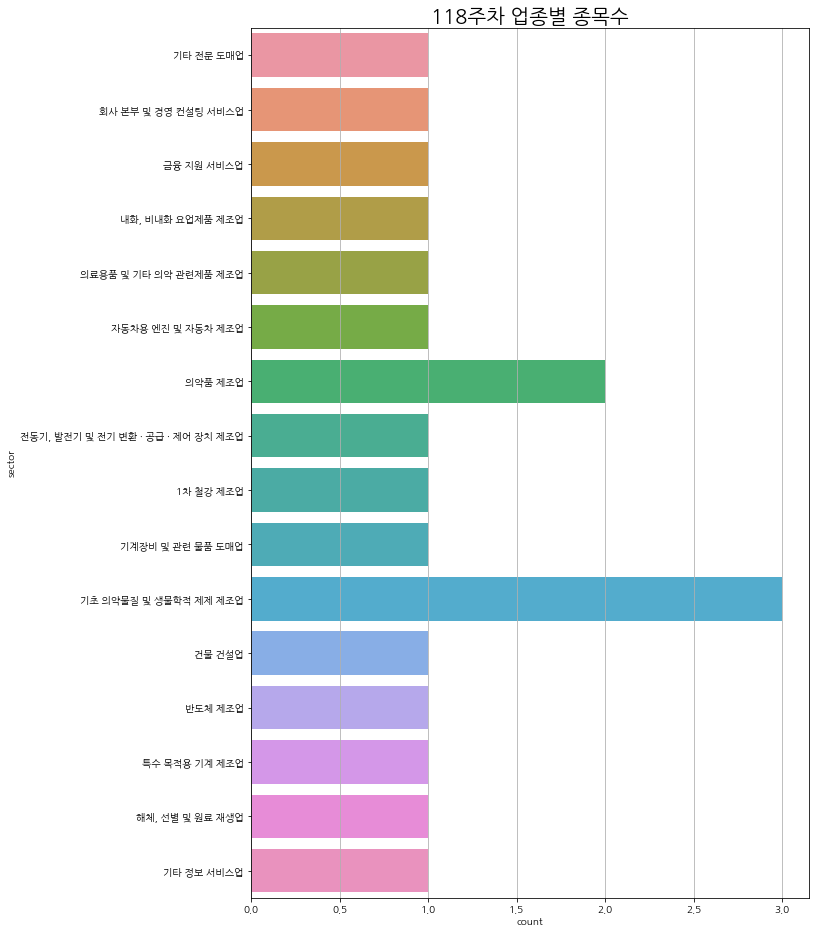

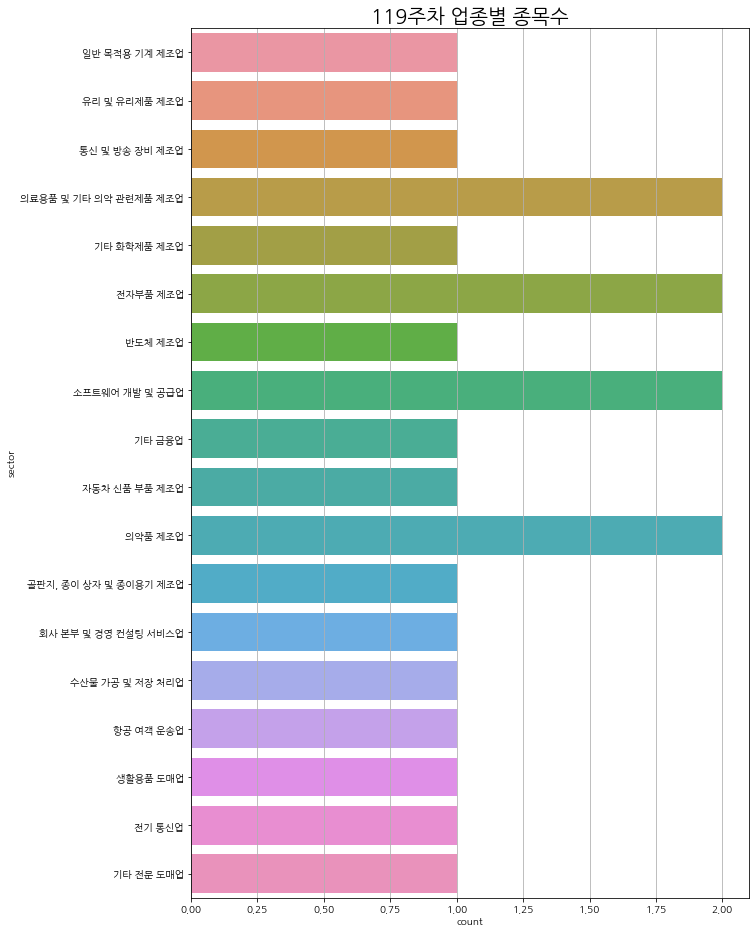

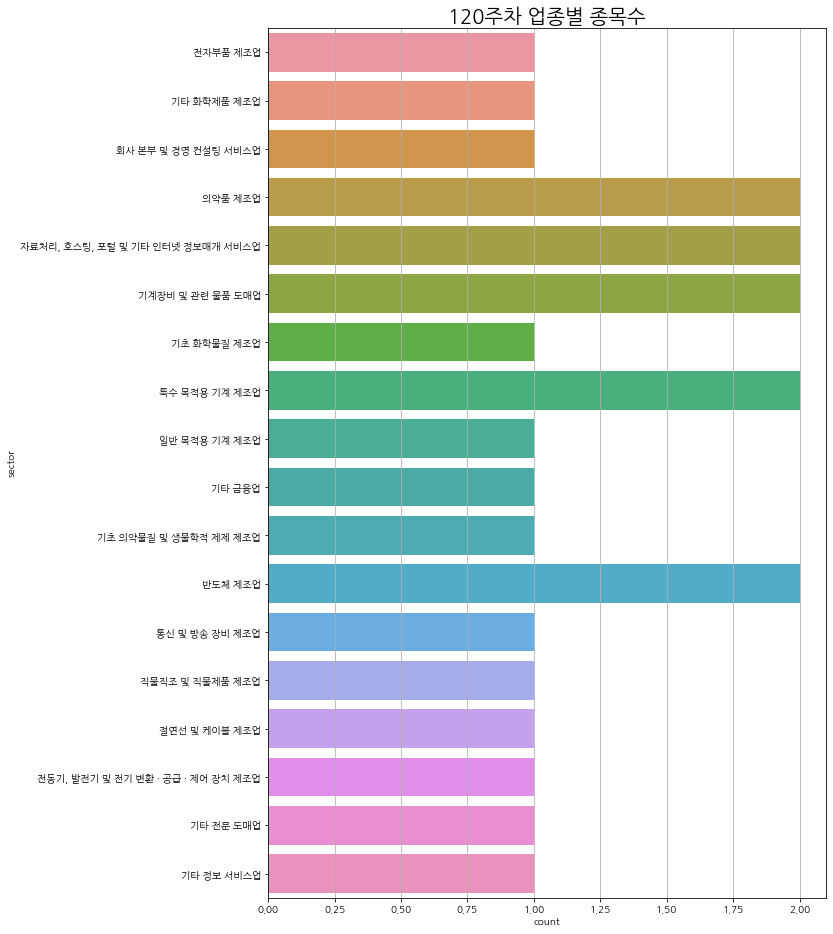

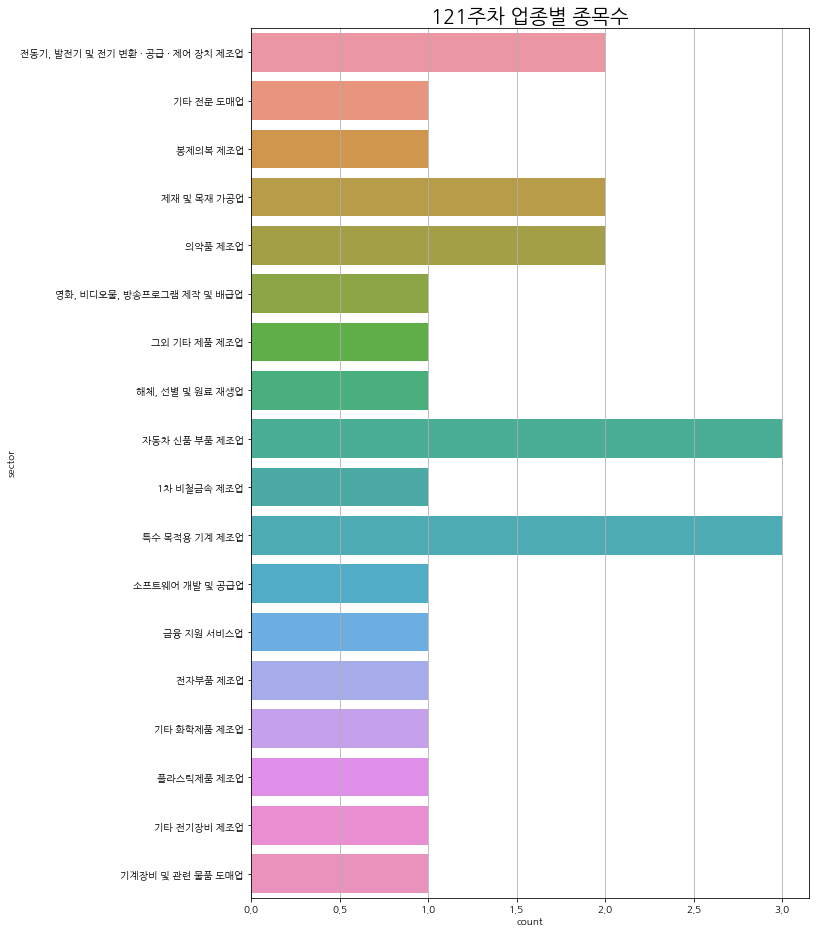

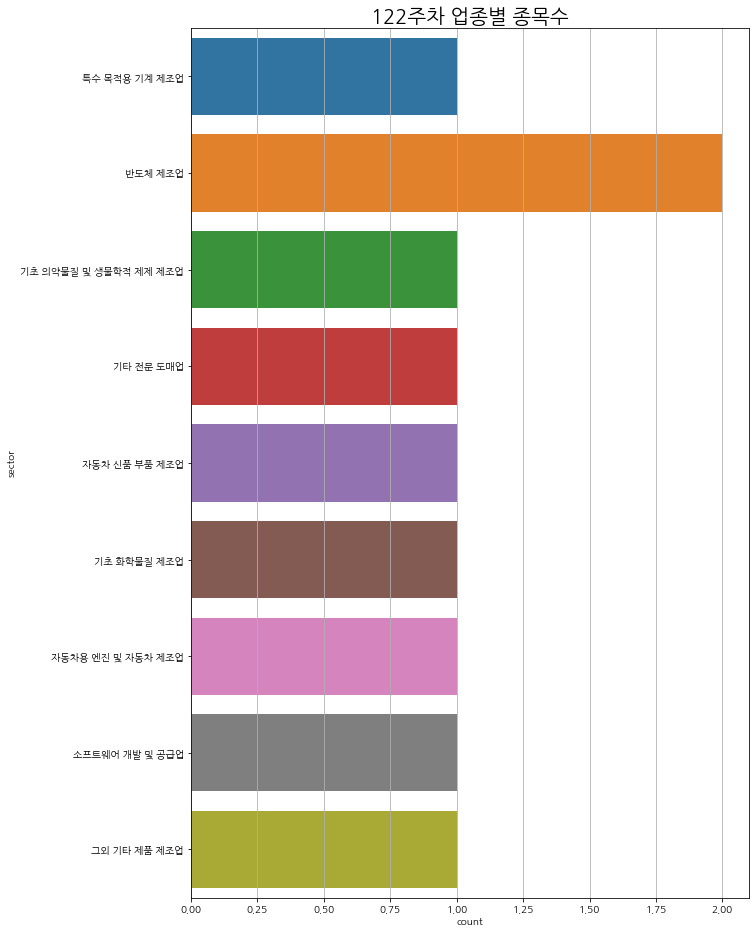

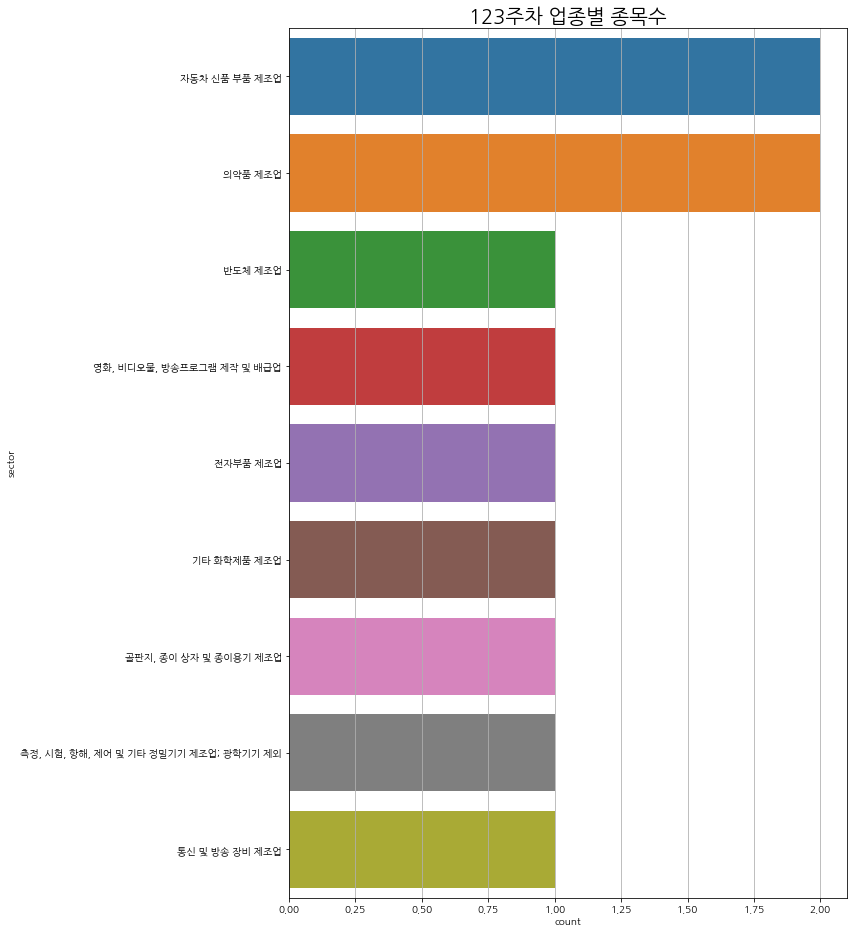

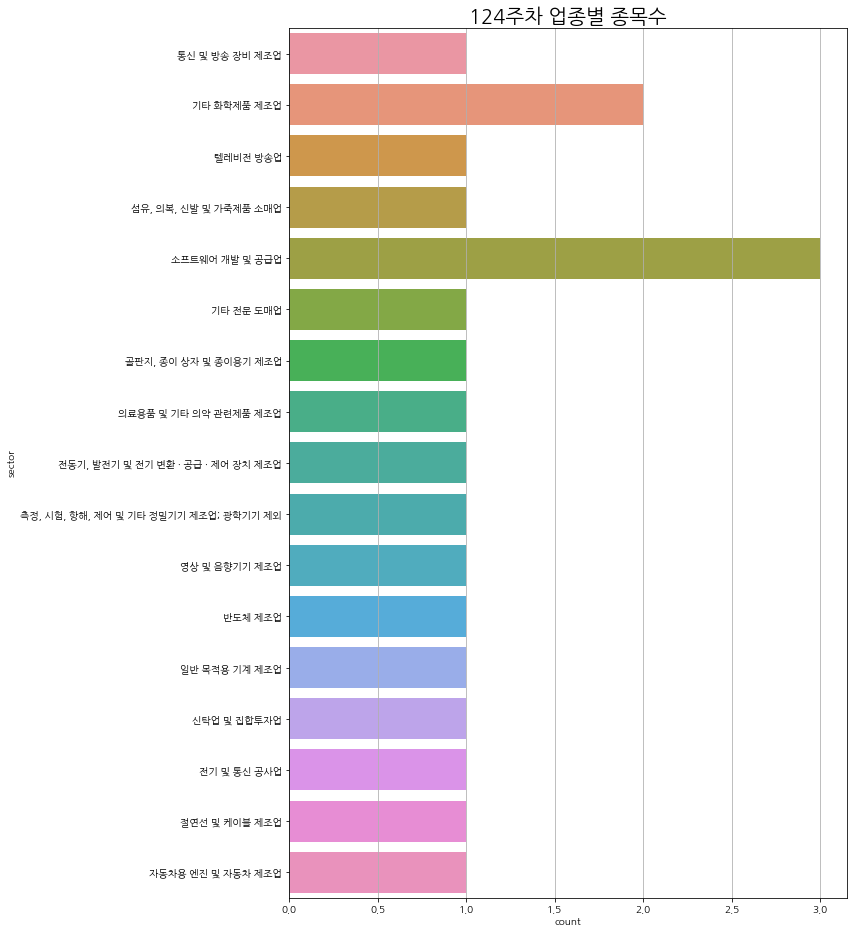

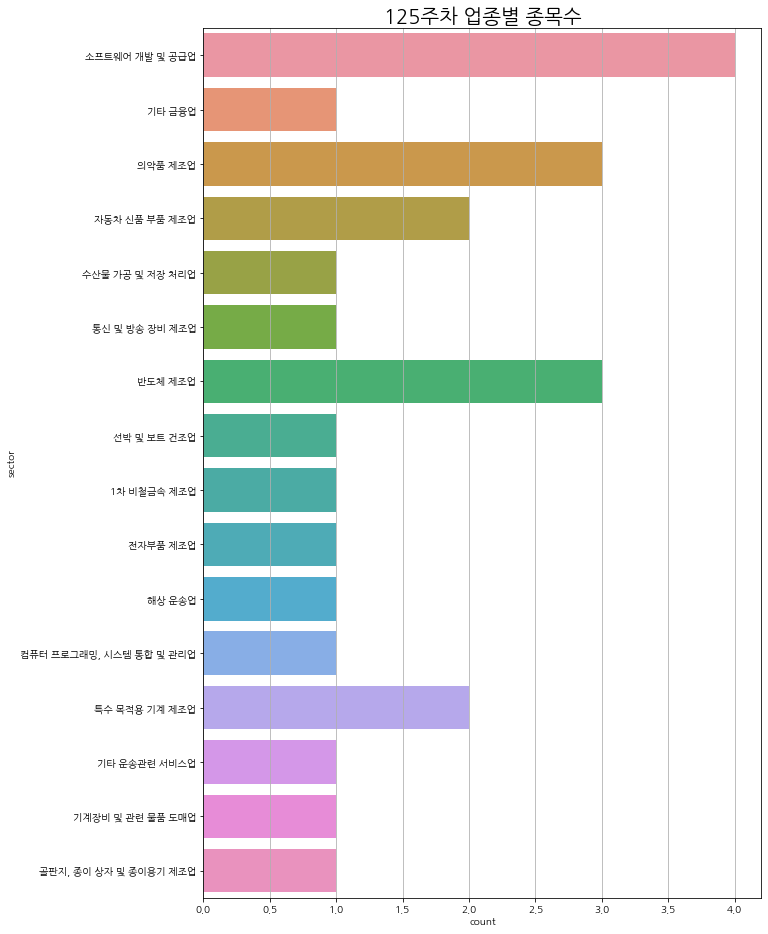

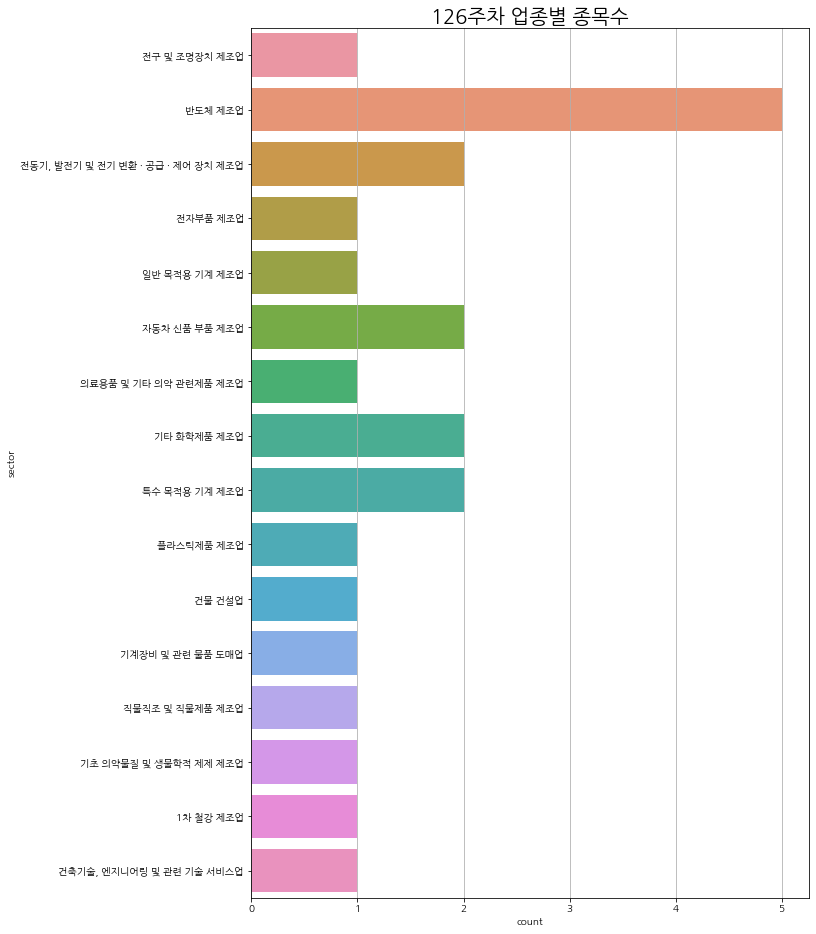

In [338]:
for week_num in range(1, 127) :
    week_sector_df =  test_df[test_df["week"] == week_num]
    sns.countplot(y="sector", data=week_sector_df)
    plt.rcParams["figure.figsize"] = (10,16)
    plt.rc('font', family='NanumGothic')
    plt.title('{}주차 업종별 종목수'.format(week_num), fontsize=20)
    plt.show()

In [339]:
test_df[test_df["week"] == 19]

Date stock_name  today_big_win  today_small_win  today_lose  \
0 2018-09-10    오리엔트바이오            0.0              0.0         0.0   
0 2018-09-10     바이오스마트            0.0              1.0         0.0   
0 2018-09-10    KPX생명과학            0.0              1.0         0.0   
0 2018-09-11    SCI평가정보            0.0              1.0         0.0   
0 2018-09-11        파미셀            0.0              1.0         0.0   
0 2018-09-11        쏠리드            0.0              1.0         0.0   
0 2018-09-11       바이넥스            0.0              1.0         0.0   
0 2018-09-11       아남전자            0.0              1.0         0.0   
0 2018-09-12       영진약품            0.0              0.0         0.0   
0 2018-09-12    에이프로젠제약            0.0              1.0         0.0   
0 2018-09-12    포스코 ICT            0.0              1.0         0.0   
0 2018-09-12      헬릭스미스            0.0              1.0         0.0   
0 2018-09-14     코스모신소재            0.0              0.0         0.0   
0 2018-09-14       영진약품            0.0              1.0         0.0   
0 2018-09-14      피에스엠씨            0.0              1.0         0.0   

   tomorrow_big_win  tomorrow_small_win  tomorrow_lose  day2_big_win  \
0               0.0                 1.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 1.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   
0               0.0                 0.0            0.0           0.0   

   day2_small_win  day2_lose  real_profit Nasdaq                    sector  \
0             0.0        0.0     0.023509    T01                   의약품 제조업   
0             0.0        0.0     0.032028    T01                  전자부품 제조업   
0             0.0        0.0     0.032567    T01     기초 의약물질 및 생물학적 제제 제조업   
0             0.0        0.0     0.016768    U03                기타 정보 서비스업   
0             0.0        0.0     0.028409    U03     기초 의약물질 및 생물학적 제제 제조업   
0             0.0        0.0     0.015021    U03            통신 및 방송 장비 제조업   
0             0.0        0.0     0.051282    U03                   의약품 제조업   
0             0.0        0.0     0.033287    U03             영상 및 음향기기 제조업   
0             0.0        1.0     0.007519    U04                   의약품 제조업   
0             0.0        0.0     0.018212    U04                   의약품 제조업   
0             0.0        0.0     0.020804    U04  건축기술, 엔지니어링 및 관련 기술 서비스업   
0             0.0        0.0     0.032769    U04           자연과학 및 공학 연구개발업   
0             0.0        0.0     0.017333    U04               기타 화학제품 제조업   
0             0.0        0.0     0.011321    U04                   의약품 제조업   
0             0.0        0.0     0.072072    U04                  전자부품 제조업   

   week  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19  
0    19

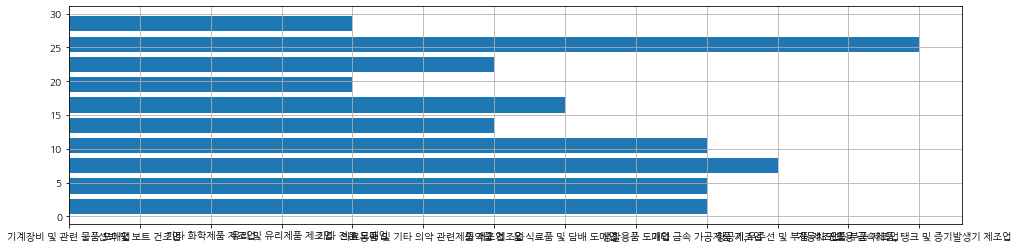

In [306]:
plt.hist(corona_df["sector"], rwidth = 0.75, orientation = "horizontal")
#plt.rcParams["figure.figsize"] = (16,4)
#plt.rc('font', family='NanumGothic')
#plt.xticks(rotation =90)
plt.show()

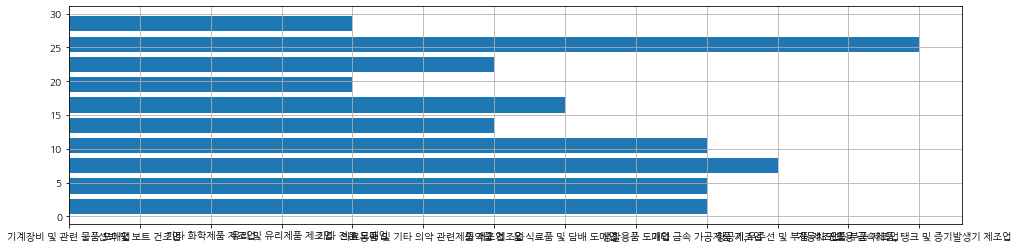

In [307]:
plt.hist(corona_df["sector"], rwidth = 0.75, orientation = "horizontal")
plt.show()

In [308]:
import seaborn as sns

In [325]:
corona_df

Date stock_name  today_big_win  today_small_win  today_lose  \
0  2020-02-03        SDN            0.0              1.0         0.0   
0  2020-02-03       신일전자            0.0              1.0         0.0   
0  2020-02-03        케이프            0.0              1.0         0.0   
0  2020-02-03     코스모신소재            0.0              1.0         0.0   
0  2020-02-03      국영지앤엠            0.0              1.0         0.0   
..        ...        ...            ...              ...         ...   
0  2020-03-11       알서포트            1.0              0.0         0.0   
0  2020-03-11         다날            0.0              1.0         0.0   
0  2020-03-12      씨아이에스            0.0              0.0         0.0   
0  2020-03-18        케이프            1.0              0.0         0.0   
0  2020-03-25     엑세스바이오            1.0              0.0         0.0   

    tomorrow_big_win  tomorrow_small_win  tomorrow_lose  day2_big_win  \
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
..               ...                 ...            ...           ...   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            1.0           0.0   
0                0.0                 0.0            0.0           0.0   
0                0.0                 0.0            0.0           0.0   

    day2_small_win  day2_lose  real_profit Nasdaq                 sector  week  
0              0.0        0.0     0.069307    D04       기계장비 및 관련 물품 도매업    90  
0              0.0        0.0     0.068681    D04       기계장비 및 관련 물품 도매업    90  
0              0.0        0.0     0.041667    D04            선박 및 보트 건조업    90  
0              0.0        0.0     0.043269    D04            기타 화학제품 제조업    90  
0              0.0        0.0     0.074890    D04          유리 및 유리제품 제조업    90  
..             ...        ...          ...    ...                    ...   ...  
0              0.0        0.0     0.100000    U04         소프트웨어 개발 및 공급업    95  
0              0.0        0.0     0.020958    U04         소프트웨어 개발 및 공급업    95  
0              0.0        0.0    -0.057221    D04          특수 목적용 기계 제조업    95  
0              0.0        0.0     0.100000    U04            선박 및 보트 건조업    96  
0              0.0        0.0     0.100000    U04  의료용품 및 기타 의약 관련제품 제조업    96  

[76 rows x 15 columns]

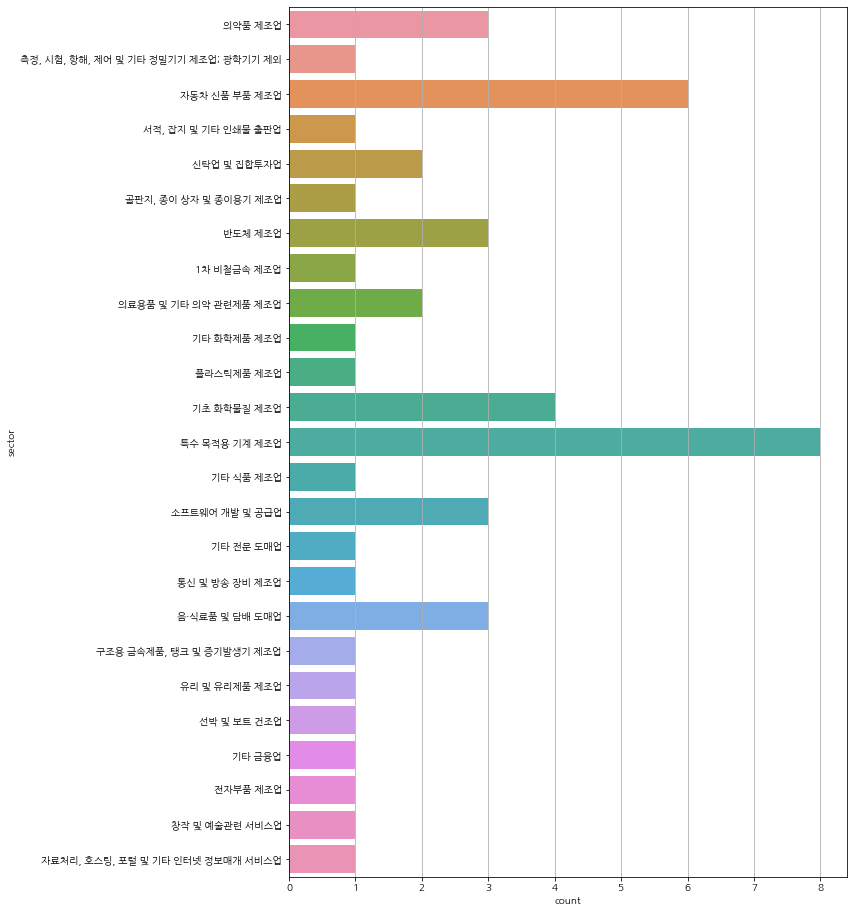

In [335]:
sns.countplot(y="sector", data=corona_df)
plt.rcParams["figure.figsize"] = (10,16)
plt.rc('font', family='NanumGothic')
plt.show()